In [1]:
import pandas as pd
import collections
import math
import os

import cv2
import matplotlib.pyplot as plt
import cv2
import sys
import numpy as np
import math
import time
from PIL import Image 

from pandas import read_csv  
import configparser

config = configparser.ConfigParser()
config.read('configLivingroom1p.txt')

source_folder = config.get('Configuration', 'source_folder')
time_step = int(config.get('Configuration', 'time_step'))
data_folder = config.get('Configuration', 'data_folder')
ini_date = config.get('Configuration', 'ini_date')
end_date = config.get('Configuration', 'end_date')

window_size = int(config.get('Configuration', 'window_size'))

scenes=config.get('Configuration', 'scenes')
scenes = [(item.strip()) for item in scenes.split(',')]

print(scenes)

users=config.get('Configuration', 'users')
users = [(item.strip()) for item in users.split(',')]

anchors=config.get('Configuration', 'anchors')
anchors = [(item.strip()) for item in anchors.split(',')]

room=config.get('Configuration', 'room')

w = int(config.get(room, 'w'))
h = int(config.get(room, 'h'))

user_color={}
for user in users:
    user_color[user]=config.get('Colors', user)
print(user_color)


['Scene1', 'Scene2', 'Scene3', 'Scene4', 'Scene5', 'Scene6']
{'ed9c': 'red'}


In [2]:
import numpy as np
from pandas import read_csv    
import pandas as pd
import time

from datetime import datetime

off_zone=60*60*2

def day_time(ti):
    return int((int)((ti+off_zone)/(60*60*24)))


def time2str(tt):
    return datetime.fromtimestamp(tt).strftime("%Y-%m-%d %H:%M:%S")


t0 = (int)(datetime.strptime(ini_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (ini_date,"Init date is", t0, "day:",day_time(t0), time2str(t0))

tN = (int)(datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (end_date,"End date is", tN, "day:",day_time(tN), time2str(tN))


def day_time0(ti):
    return day_time(ti)-day_time(t0)+1

def relT(ti):
    return (int)((ti-t0)/time_step)

days=list(range(day_time(t0),day_time(tN)+1))
print(days)

i0=0
ts=list(range(t0,tN,1))
print(i0,ts)
print(len(ts))

2024-03-16 13:45:57 Init date is 1710593157 day: 19798 2024-03-16 13:45:57
2024-03-16 14:37:16 End date is 1710596236 day: 19798 2024-03-16 14:37:16
[19798]
0 [1710593157, 1710593158, 1710593159, 1710593160, 1710593161, 1710593162, 1710593163, 1710593164, 1710593165, 1710593166, 1710593167, 1710593168, 1710593169, 1710593170, 1710593171, 1710593172, 1710593173, 1710593174, 1710593175, 1710593176, 1710593177, 1710593178, 1710593179, 1710593180, 1710593181, 1710593182, 1710593183, 1710593184, 1710593185, 1710593186, 1710593187, 1710593188, 1710593189, 1710593190, 1710593191, 1710593192, 1710593193, 1710593194, 1710593195, 1710593196, 1710593197, 1710593198, 1710593199, 1710593200, 1710593201, 1710593202, 1710593203, 1710593204, 1710593205, 1710593206, 1710593207, 1710593208, 1710593209, 1710593210, 1710593211, 1710593212, 1710593213, 1710593214, 1710593215, 1710593216, 1710593217, 1710593218, 1710593219, 1710593220, 1710593221, 1710593222, 1710593223, 1710593224, 1710593225, 1710593226, 

In [3]:
scene_user = {}
lista_timestamps=[]
for d in days:
    for user in users:
        scene_user[user] = {}
        for s in scenes:
            print(d,source_folder+"/"+s+"/location_gt_"+user+"/"+str(d)+".location.tsv")
            try:
                series=read_csv(source_folder+"/"+s+"/location_gt_"+user+"/"+str(d)+".location.tsv", sep="\t",parse_dates=True, header=None, names=["time","date","time2","x","y"])
                print(d,series.size,(series["time"].iloc[0],series["time"].iloc[-1]))
                scene_user[user][s] = (series["time"].iloc[0],series["time"].iloc[-1])
                #print("test")
                print(scene_user[user][s])
                #if user=='ed9c':
                lista_timestamps.extend(list(range(scene_user[user][s][0],scene_user[user][s][1],1)))
                #print(lista_timestamps)
                #print("test2")
            except Exception as e:
                print("Not data",e)
                continue
def getScene(t0):
    for user, user_scene in scene_user.items():
        for scene, times in user_scene.items():
            #print(t0,times[0],times[1])
            if(t0>times[0]-window_size/2 and t0<times[1]+window_size/2):
                return scene
    return None

19798 ./data/livingroom/1-person-labelled/Scene1/location_gt_ed9c/19798.location.tsv
19798 1020 (1710593157, 1710593451)
(1710593157, 1710593451)
19798 ./data/livingroom/1-person-labelled/Scene2/location_gt_ed9c/19798.location.tsv
19798 1215 (1710593672, 1710593967)
(1710593672, 1710593967)
19798 ./data/livingroom/1-person-labelled/Scene3/location_gt_ed9c/19798.location.tsv
19798 1340 (1710594542, 1710594853)
(1710594542, 1710594853)
19798 ./data/livingroom/1-person-labelled/Scene4/location_gt_ed9c/19798.location.tsv
19798 1395 (1710594999, 1710595299)
(1710594999, 1710595299)
19798 ./data/livingroom/1-person-labelled/Scene5/location_gt_ed9c/19798.location.tsv
19798 1345 (1710595474, 1710595770)
(1710595474, 1710595770)
19798 ./data/livingroom/1-person-labelled/Scene6/location_gt_ed9c/19798.location.tsv
19798 1400 (1710595940, 1710596236)
(1710595940, 1710596236)


In [4]:
def getFPImg(tt):
    img_path = os.path.join(data_folder+"B", "DAY_" + str(day), "FP." + str(tt) + ".png")
    #print(img_path)
    img = np.array(Image.open(img_path))/255.0
    #print(img)
    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)
    
    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad
    
    #print(top_pad,bottom_pad,left_pad,right_pad)
    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
    
    #print(img_padded)
    # Guardar la imagen sobrescrita
    #Image.fromarray((img_padded * 255).astype(np.uint8)).save(img_path)
    
    return img_padded

def getFPImg0(tt):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "FP." + str(tt) + ".png")
    #print(img_path)
    img = np.array(Image.open(img_path))/255.0
    #print(img)
    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)
    
    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad
    
    #print(top_pad,bottom_pad,left_pad,right_pad)
    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
    
    #print(img_padded)
    # Guardar la imagen sobrescrita
    Image.fromarray((img_padded * 255).astype(np.uint8)).save(img_path)
    
    return img_padded

def getGTImg(tt, user):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "GT." + user + "." + str(tt) + ".png")
    img = np.array(Image.open(img_path)) / 255.0

    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)

    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad

    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')

    # Procesamiento adicional: propagación de valores
    h_padded, w_padded = img_padded.shape
    img_propagated = img_padded.copy()  # Crear una copia para no modificar la original durante el proceso

    for x in range(h_padded):
        for y in range(w_padded):
            if img_padded[x, y] > 0:
                max_val = img_padded[x, y] / 2.0  # Calcular la mitad del valor actual
                neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1),(x - 1, y-1), (x + 1, y+1), (x+1, y - 1), (x-1, y + 1)]
                #neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
                for nx, ny in neighbors:
                    if 0 <= nx < h_padded and 0 <= ny < w_padded:
                        img_propagated[nx, ny] = max(img_propagated[nx, ny], max_val)

    # Guardar la imagen sobrescrita
    #Image.fromarray((img_propagated * 255).astype(np.uint8)).save(img_path)

    return img_propagated

#test=getFPImg(1710618646)

#test=getFPImg(1710618646)

In [5]:
ts=lista_timestamps
#ts=list(set(ts))

ts=list(dict.fromkeys(ts))
ts.sort()
#ts=list(set(ts))
ts=ts[:-5]
print(enumerate(ts))
print(ts)
print(len(ts))
XY0={}
rssi0={}
Y0={}

T0_user={}
T0=[]
T1=[]
for day in days:
    anchors_data={}
    for user in users:
        XY0[user]=[]
        rssi0[user]=[]
        Y0[user]=[]
        T0_user[user]=[]


        anchors_data[user]={}
        for anchor in anchors:
            print(data_folder+"/"+room+"/DAY_"+str(day)+"/"+user+"."+anchor+".tsv")
            print(user,anchor)
            series=read_csv(data_folder+"/"+room+"/DAY_"+str(day)+"/"+user+"."+anchor+".tsv", sep="\t",parse_dates=True, header=None, names=["time","d"])
            series=series.values
            anchors_data[user][anchor]=series
            

    for it,tt in enumerate(ts):
        print(it,tt)
        imgX=getFPImg(tt)
        print("imgX",imgX.shape)

        for user in users:
            
            imgY=getGTImg(tt,user)
            #if imgY is None:
            #    continue
            print("user",user,"imgY",imgY.shape)

            dist=[]
            for ixa,anchor in enumerate(anchors):
                #if(len(ts))
                d=anchors_data[user][anchor][it][1]
                #print(len(anchors_data[user][anchor]))
                if(d>0):
                    d=d/10.0
                if(d>1):
                    d=1
                print("\t anchor:",anchor, anchors_data[user][anchor][it], "tt:",tt)
                dist.append(d)

            dist=np.array(dist)
            print("dist:",dist)

            rssi0[user].append(dist.reshape(len(anchors),1))
            XY0[user].append(imgX[:, :, np.newaxis])
            Y0[user].append(imgY[:, :, np.newaxis])
            T0_user[user].append(it)
            T0.append(it)
            T1.append(tt)
print(T0)        
print(T1)        
print(len(T1))
T0=list(dict.fromkeys(T0))
T1=list(dict.fromkeys(T1))
print(T0)        
print(T1)
#print(T0_user)

[1710593157, 1710593158, 1710593159, 1710593160, 1710593161, 1710593162, 1710593163, 1710593164, 1710593165, 1710593166, 1710593167, 1710593168, 1710593169, 1710593170, 1710593171, 1710593172, 1710593173, 1710593174, 1710593175, 1710593176, 1710593177, 1710593178, 1710593179, 1710593180, 1710593181, 1710593182, 1710593183, 1710593184, 1710593185, 1710593186, 1710593187, 1710593188, 1710593189, 1710593190, 1710593191, 1710593192, 1710593193, 1710593194, 1710593195, 1710593196, 1710593197, 1710593198, 1710593199, 1710593200, 1710593201, 1710593202, 1710593203, 1710593204, 1710593205, 1710593206, 1710593207, 1710593208, 1710593209, 1710593210, 1710593211, 1710593212, 1710593213, 1710593214, 1710593215, 1710593216, 1710593217, 1710593218, 1710593219, 1710593220, 1710593221, 1710593222, 1710593223, 1710593224, 1710593225, 1710593226, 1710593227, 1710593228, 1710593229, 1710593230, 1710593231, 1710593232, 1710593233, 1710593234, 1710593235, 1710593236, 1710593237, 1710593238, 1710593239, 171

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.7105932e+09 4.2560000e+00] tt: 1710593200
	 anchor: eb38 [1.7105932e+09 5.5780000e+00] tt: 1710593200
dist: [0.4256 0.5578]
44 1710593201
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.7105932e+09 4.2560000e+00] tt: 1710593201
	 anchor: eb38 [1.7105932e+09 5.5780000e+00] tt: 1710593201
dist: [0.4256 0.5578]
45 1710593202
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.7105932e+09 -1.0000000e+00] tt: 1710593202
	 anchor: eb38 [ 1.7105932e+09 -1.0000000e+00] tt: 1710593202
dist: [-1. -1.]
46 1710593203
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.7105932e+09 -1.0000000e+00] tt: 1710593203
	 anchor: eb38 [ 1.7105932e+09 -1.0000000e+00] tt: 1710593203
dist: [-1. -1.]
47 1710593204
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.7105932e+09 -1.0000000e+00] tt: 1710593204
	 anchor: eb38 [ 1.7105932e+09 -1.0000000e+00] tt: 1710593204
dist: [-1. -1.]
48 1710593205
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.7105

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.7105933e+09 5.2780000e+00] tt: 1710593300
	 anchor: eb38 [1.7105933e+09 2.7440000e+00] tt: 1710593300
dist: [0.5278 0.2744]
144 1710593301
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.7105933e+09 5.4790000e+00] tt: 1710593301
	 anchor: eb38 [1.7105933e+09 2.7440000e+00] tt: 1710593301
dist: [0.5479 0.2744]
145 1710593302
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.7105933e+09 5.3620000e+00] tt: 1710593302
	 anchor: eb38 [1.7105933e+09 2.9970000e+00] tt: 1710593302
dist: [0.5362 0.2997]
146 1710593303
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.7105933e+09 5.3530000e+00] tt: 1710593303
	 anchor: eb38 [1.7105933e+09 3.2260000e+00] tt: 1710593303
dist: [0.5353 0.3226]
147 1710593304
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.7105933e+09 5.3530000e+00] tt: 1710593304
	 anchor: eb38 [1.7105933e+09 3.2260000e+00] tt: 1710593304
dist: [0.5353 0.3226]
148 1710593305
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059335e+09 6.40200000e+00] tt: 1710593349
	 anchor: eb38 [1.71059335e+09 2.66500000e+00] tt: 1710593349
dist: [0.6402 0.2665]
193 1710593350
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059335e+09 6.20600000e+00] tt: 1710593350
	 anchor: eb38 [1.71059335e+09 2.66500000e+00] tt: 1710593350
dist: [0.6206 0.2665]
194 1710593351
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059335e+09 6.20600000e+00] tt: 1710593351
	 anchor: eb38 [1.71059335e+09 2.70200000e+00] tt: 1710593351
dist: [0.6206 0.2702]
195 1710593352
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059335e+09 6.26200000e+00] tt: 1710593352
	 anchor: eb38 [1.71059335e+09 2.70200000e+00] tt: 1710593352
dist: [0.6262 0.2702]
196 1710593353
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059335e+09 6.23400000e+00] tt: 1710593353
	 anchor: eb38 [1.71059335e+09 2.73900000e+00] tt: 1710593353
dist: [0.6234 0.2739]
197 1710593354
imgX (8, 8)
user ed9c img

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059342e+09 6.33700000e+00] tt: 1710593416
	 anchor: eb38 [1.71059342e+09 2.79500000e+00] tt: 1710593416
dist: [0.6337 0.2795]
260 1710593417
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059342e+09 -1.00000000e+00] tt: 1710593417
	 anchor: eb38 [ 1.71059342e+09 -1.00000000e+00] tt: 1710593417
dist: [-1. -1.]
261 1710593418
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059342e+09 -1.00000000e+00] tt: 1710593418
	 anchor: eb38 [ 1.71059342e+09 -1.00000000e+00] tt: 1710593418
dist: [-1. -1.]
262 1710593419
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059342e+09 -1.00000000e+00] tt: 1710593419
	 anchor: eb38 [ 1.71059342e+09 -1.00000000e+00] tt: 1710593419
dist: [-1. -1.]
263 1710593420
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059342e+09 7.50400000e+00] tt: 1710593420
	 anchor: eb38 [1.71059342e+09 1.85900000e+00] tt: 1710593420
dist: [0.7504 0.1859]
264 1710593421
imgX (8, 8)
user ed9c imgY (8, 

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059369e+09 -1.00000000e+00] tt: 1710593695
	 anchor: eb38 [ 1.71059369e+09 -1.00000000e+00] tt: 1710593695
dist: [-1. -1.]
318 1710593696
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059369e+09 -1.00000000e+00] tt: 1710593696
	 anchor: eb38 [ 1.71059369e+09 -1.00000000e+00] tt: 1710593696
dist: [-1. -1.]
319 1710593697
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059369e+09 6.36900000e+00] tt: 1710593697
	 anchor: eb38 [1.71059369e+09 3.12300000e+00] tt: 1710593697
dist: [0.6369 0.3123]
320 1710593698
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059369e+09 6.36900000e+00] tt: 1710593698
	 anchor: eb38 [1.71059369e+09 3.12300000e+00] tt: 1710593698
dist: [0.6369 0.3123]
321 1710593699
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059369e+09 -1.00000000e+00] tt: 1710593699
	 anchor: eb38 [ 1.71059369e+09 -1.00000000e+00] tt: 1710593699
dist: [-1. -1.]
322 1710593700
imgX (8, 8)
user ed9c imgY (8, 

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059376e+09 -1.00000000e+00] tt: 1710593770
	 anchor: eb38 [ 1.71059376e+09 -1.00000000e+00] tt: 1710593770
dist: [-1. -1.]
393 1710593771
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059377e+09 -1.00000000e+00] tt: 1710593771
	 anchor: eb38 [ 1.71059377e+09 -1.00000000e+00] tt: 1710593771
dist: [-1. -1.]
394 1710593772
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059377e+09 -1.00000000e+00] tt: 1710593772
	 anchor: eb38 [ 1.71059377e+09 -1.00000000e+00] tt: 1710593772
dist: [-1. -1.]
395 1710593773
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059377e+09 -1.00000000e+00] tt: 1710593773
	 anchor: eb38 [ 1.71059377e+09 -1.00000000e+00] tt: 1710593773
dist: [-1. -1.]
396 1710593774
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059377e+09 -1.00000000e+00] tt: 1710593774
	 anchor: eb38 [ 1.71059377e+09 -1.00000000e+00] tt: 1710593774
dist: [-1. -1.]
397 1710593775
imgX (8, 8)
user ed9c imgY (8, 8)
	

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059384e+09 3.24500000e+00] tt: 1710593849
	 anchor: eb38 [1.71059384e+09 6.13500000e+00] tt: 1710593849
dist: [0.3245 0.6135]
472 1710593850
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059384e+09 3.24500000e+00] tt: 1710593850
	 anchor: eb38 [1.71059384e+09 6.13500000e+00] tt: 1710593850
dist: [0.3245 0.6135]
473 1710593851
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059385e+09 -1.00000000e+00] tt: 1710593851
	 anchor: eb38 [ 1.71059385e+09 -1.00000000e+00] tt: 1710593851
dist: [-1. -1.]
474 1710593852
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059385e+09 -1.00000000e+00] tt: 1710593852
	 anchor: eb38 [ 1.71059385e+09 -1.00000000e+00] tt: 1710593852
dist: [-1. -1.]
475 1710593853
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059385e+09 -1.00000000e+00] tt: 1710593853
	 anchor: eb38 [ 1.71059385e+09 -1.00000000e+00] tt: 1710593853
dist: [-1. -1.]
476 1710593854
imgX (8, 8)
user ed9c imgY (8, 

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.7105939e+09 5.9100000e+00] tt: 1710593910
	 anchor: eb38 [1.7105939e+09 2.4210000e+00] tt: 1710593910
dist: [0.591  0.2421]
533 1710593911
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059391e+09 5.91000000e+00] tt: 1710593911
	 anchor: eb38 [1.71059391e+09 2.42100000e+00] tt: 1710593911
dist: [0.591  0.2421]
534 1710593912
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059391e+09 -1.00000000e+00] tt: 1710593912
	 anchor: eb38 [ 1.71059391e+09 -1.00000000e+00] tt: 1710593912
dist: [-1. -1.]
535 1710593913
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059391e+09 -1.00000000e+00] tt: 1710593913
	 anchor: eb38 [ 1.71059391e+09 -1.00000000e+00] tt: 1710593913
dist: [-1. -1.]
536 1710593914
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059391e+09 -1.00000000e+00] tt: 1710593914
	 anchor: eb38 [ 1.71059391e+09 -1.00000000e+00] tt: 1710593914
dist: [-1. -1.]
537 1710593915
imgX (8, 8)
user ed9c imgY (8, 8)
	

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059396e+09 -1.00000000e+00] tt: 1710593964
	 anchor: eb38 [ 1.71059396e+09 -1.00000000e+00] tt: 1710593964
dist: [-1. -1.]
587 1710593965
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059396e+09 5.91000000e+00] tt: 1710593965
	 anchor: eb38 [ 1.71059396e+09 -1.00000000e+00] tt: 1710593965
dist: [ 0.591 -1.   ]
588 1710593966
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059396e+09 5.91000000e+00] tt: 1710593966
	 anchor: eb38 [ 1.71059396e+09 -1.00000000e+00] tt: 1710593966
dist: [ 0.591 -1.   ]
589 1710594542
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059396e+09 5.56400000e+00] tt: 1710594542
	 anchor: eb38 [1.71059396e+09 2.78100000e+00] tt: 1710594542
dist: [0.5564 0.2781]
590 1710594543
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059396e+09 5.24500000e+00] tt: 1710594543
	 anchor: eb38 [1.71059396e+09 2.78100000e+00] tt: 1710594543
dist: [0.5245 0.2781]
591 1710594544
imgX (8, 8)
user ed9c i

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.7105946e+09 -1.0000000e+00] tt: 1710594613
	 anchor: eb38 [ 1.7105946e+09 -1.0000000e+00] tt: 1710594613
dist: [-1. -1.]
661 1710594614
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.7105946e+09 5.0440000e+00] tt: 1710594614
	 anchor: eb38 [1.7105946e+09 3.6750000e+00] tt: 1710594614
dist: [0.5044 0.3675]
662 1710594615
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.7105946e+09 5.0440000e+00] tt: 1710594615
	 anchor: eb38 [1.7105946e+09 3.6750000e+00] tt: 1710594615
dist: [0.5044 0.3675]
663 1710594616
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059461e+09 -1.00000000e+00] tt: 1710594616
	 anchor: eb38 [ 1.71059461e+09 -1.00000000e+00] tt: 1710594616
dist: [-1. -1.]
664 1710594617
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059461e+09 -1.00000000e+00] tt: 1710594617
	 anchor: eb38 [ 1.71059461e+09 -1.00000000e+00] tt: 1710594617
dist: [-1. -1.]
665 1710594618
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor:

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059469e+09 3.49300000e+00] tt: 1710594699
	 anchor: eb38 [1.71059469e+09 4.51400000e+00] tt: 1710594699
dist: [0.3493 0.4514]
747 1710594700
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059469e+09 3.49300000e+00] tt: 1710594700
	 anchor: eb38 [1.71059469e+09 4.51400000e+00] tt: 1710594700
dist: [0.3493 0.4514]
748 1710594701
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059469e+09 -1.00000000e+00] tt: 1710594701
	 anchor: eb38 [ 1.71059469e+09 -1.00000000e+00] tt: 1710594701
dist: [-1. -1.]
749 1710594702
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059469e+09 -1.00000000e+00] tt: 1710594702
	 anchor: eb38 [ 1.71059469e+09 -1.00000000e+00] tt: 1710594702
dist: [-1. -1.]
750 1710594703
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059469e+09 -1.00000000e+00] tt: 1710594703
	 anchor: eb38 [ 1.71059469e+09 -1.00000000e+00] tt: 1710594703
dist: [-1. -1.]
751 1710594704
imgX (8, 8)
user ed9c imgY (8, 

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059476e+09 5.97100000e+00] tt: 1710594766
	 anchor: eb38 [1.71059476e+09 2.79100000e+00] tt: 1710594766
dist: [0.5971 0.2791]
814 1710594767
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059476e+09 5.86300000e+00] tt: 1710594767
	 anchor: eb38 [1.71059476e+09 2.79100000e+00] tt: 1710594767
dist: [0.5863 0.2791]
815 1710594768
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059476e+09 5.86300000e+00] tt: 1710594768
	 anchor: eb38 [1.71059476e+09 2.74900000e+00] tt: 1710594768
dist: [0.5863 0.2749]
816 1710594769
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059476e+09 6.19200000e+00] tt: 1710594769
	 anchor: eb38 [1.71059476e+09 2.74900000e+00] tt: 1710594769
dist: [0.6192 0.2749]
817 1710594770
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059476e+09 6.34600000e+00] tt: 1710594770
	 anchor: eb38 [1.71059476e+09 2.66500000e+00] tt: 1710594770
dist: [0.6346 0.2665]
818 1710594771
imgX (8, 8)
user ed9c img

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059484e+09 -1.00000000e+00] tt: 1710594848
	 anchor: eb38 [ 1.71059484e+09 -1.00000000e+00] tt: 1710594848
dist: [-1. -1.]
896 1710594849
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059484e+09 -1.00000000e+00] tt: 1710594849
	 anchor: eb38 [ 1.71059484e+09 -1.00000000e+00] tt: 1710594849
dist: [-1. -1.]
897 1710594850
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059484e+09 -1.00000000e+00] tt: 1710594850
	 anchor: eb38 [ 1.71059484e+09 -1.00000000e+00] tt: 1710594850
dist: [-1. -1.]
898 1710594851
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059484e+09 -1.00000000e+00] tt: 1710594851
	 anchor: eb38 [ 1.71059484e+09 -1.00000000e+00] tt: 1710594851
dist: [-1. -1.]
899 1710594852
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059484e+09 -1.00000000e+00] tt: 1710594852
	 anchor: eb38 [ 1.71059484e+09 -1.00000000e+00] tt: 1710594852
dist: [-1. -1.]
900 1710594999
imgX (8, 8)
user ed9c imgY (8, 8)
	

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059505e+09 6.17300000e+00] tt: 1710595061
	 anchor: eb38 [1.71059505e+09 2.15400000e+00] tt: 1710595061
dist: [0.6173 0.2154]
963 1710595062
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059505e+09 6.17300000e+00] tt: 1710595062
	 anchor: eb38 [1.71059505e+09 2.15400000e+00] tt: 1710595062
dist: [0.6173 0.2154]
964 1710595063
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059505e+09 6.29500000e+00] tt: 1710595063
	 anchor: eb38 [1.71059505e+09 2.50500000e+00] tt: 1710595063
dist: [0.6295 0.2505]
965 1710595064
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059505e+09 6.41600000e+00] tt: 1710595064
	 anchor: eb38 [1.71059505e+09 2.50500000e+00] tt: 1710595064
dist: [0.6416 0.2505]
966 1710595065
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059505e+09 6.44400000e+00] tt: 1710595065
	 anchor: eb38 [1.71059505e+09 2.51000000e+00] tt: 1710595065
dist: [0.6444 0.251 ]
967 1710595066
imgX (8, 8)
user ed9c img

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059511e+09 -1.00000000e+00] tt: 1710595128
	 anchor: eb38 [ 1.71059511e+09 -1.00000000e+00] tt: 1710595128
dist: [-1. -1.]
1030 1710595129
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059511e+09 4.48200000e+00] tt: 1710595129
	 anchor: eb38 [1.71059511e+09 4.69300000e+00] tt: 1710595129
dist: [0.4482 0.4693]
1031 1710595130
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059512e+09 4.48200000e+00] tt: 1710595130
	 anchor: eb38 [1.71059512e+09 4.69300000e+00] tt: 1710595130
dist: [0.4482 0.4693]
1032 1710595131
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059512e+09 -1.00000000e+00] tt: 1710595131
	 anchor: eb38 [ 1.71059512e+09 -1.00000000e+00] tt: 1710595131
dist: [-1. -1.]
1033 1710595132
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059512e+09 -1.00000000e+00] tt: 1710595132
	 anchor: eb38 [ 1.71059512e+09 -1.00000000e+00] tt: 1710595132
dist: [-1. -1.]
1034 1710595133
imgX (8, 8)
user ed9c imgY

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059517e+09 5.20300000e+00] tt: 1710595185
	 anchor: eb38 [1.71059517e+09 4.18100000e+00] tt: 1710595185
dist: [0.5203 0.4181]
1087 1710595186
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059517e+09 -1.00000000e+00] tt: 1710595186
	 anchor: eb38 [ 1.71059517e+09 -1.00000000e+00] tt: 1710595186
dist: [-1. -1.]
1088 1710595187
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059517e+09 -1.00000000e+00] tt: 1710595187
	 anchor: eb38 [ 1.71059517e+09 -1.00000000e+00] tt: 1710595187
dist: [-1. -1.]
1089 1710595188
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059517e+09 -1.00000000e+00] tt: 1710595188
	 anchor: eb38 [ 1.71059517e+09 -1.00000000e+00] tt: 1710595188
dist: [-1. -1.]
1090 1710595189
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059517e+09 5.56400000e+00] tt: 1710595189
	 anchor: eb38 [1.71059517e+09 3.81600000e+00] tt: 1710595189
dist: [0.5564 0.3816]
1091 1710595190
imgX (8, 8)
user ed9c imgY

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059525e+09 -1.00000000e+00] tt: 1710595262
	 anchor: eb38 [ 1.71059525e+09 -1.00000000e+00] tt: 1710595262
dist: [-1. -1.]
1164 1710595263
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059525e+09 -1.00000000e+00] tt: 1710595263
	 anchor: eb38 [ 1.71059525e+09 -1.00000000e+00] tt: 1710595263
dist: [-1. -1.]
1165 1710595264
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059525e+09 6.32800000e+00] tt: 1710595264
	 anchor: eb38 [1.71059525e+09 2.86100000e+00] tt: 1710595264
dist: [0.6328 0.2861]
1166 1710595265
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059525e+09 6.32800000e+00] tt: 1710595265
	 anchor: eb38 [1.71059525e+09 2.86100000e+00] tt: 1710595265
dist: [0.6328 0.2861]
1167 1710595266
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059525e+09 -1.00000000e+00] tt: 1710595266
	 anchor: eb38 [ 1.71059525e+09 -1.00000000e+00] tt: 1710595266
dist: [-1. -1.]
1168 1710595267
imgX (8, 8)
user ed9c imgY

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059549e+09 -1.00000000e+00] tt: 1710595507
	 anchor: eb38 [ 1.71059549e+09 -1.00000000e+00] tt: 1710595507
dist: [-1. -1.]
1234 1710595508
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059549e+09 -1.00000000e+00] tt: 1710595508
	 anchor: eb38 [ 1.71059549e+09 -1.00000000e+00] tt: 1710595508
dist: [-1. -1.]
1235 1710595509
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059549e+09 -1.00000000e+00] tt: 1710595509
	 anchor: eb38 [ 1.71059549e+09 -1.00000000e+00] tt: 1710595509
dist: [-1. -1.]
1236 1710595510
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059549e+09 -1.00000000e+00] tt: 1710595510
	 anchor: eb38 [ 1.71059549e+09 -1.00000000e+00] tt: 1710595510
dist: [-1. -1.]
1237 1710595511
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059549e+09 -1.00000000e+00] tt: 1710595511
	 anchor: eb38 [ 1.71059549e+09 -1.00000000e+00] tt: 1710595511
dist: [-1. -1.]
1238 1710595512
imgX (8, 8)
user ed9c imgY (8,

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059556e+09 4.99200000e+00] tt: 1710595585
	 anchor: eb38 [1.71059556e+09 4.92600000e+00] tt: 1710595585
dist: [0.4992 0.4926]
1312 1710595586
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059557e+09 -1.00000000e+00] tt: 1710595586
	 anchor: eb38 [ 1.71059557e+09 -1.00000000e+00] tt: 1710595586
dist: [-1. -1.]
1313 1710595587
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059557e+09 -1.00000000e+00] tt: 1710595587
	 anchor: eb38 [ 1.71059557e+09 -1.00000000e+00] tt: 1710595587
dist: [-1. -1.]
1314 1710595588
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059557e+09 -1.00000000e+00] tt: 1710595588
	 anchor: eb38 [ 1.71059557e+09 -1.00000000e+00] tt: 1710595588
dist: [-1. -1.]
1315 1710595589
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059557e+09 4.31300000e+00] tt: 1710595589
	 anchor: eb38 [ 1.71059557e+09 -1.00000000e+00] tt: 1710595589
dist: [ 0.4313 -1.    ]
1316 1710595590
imgX (8, 8)
user ed9c 

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059563e+09 5.75100000e+00] tt: 1710595651
	 anchor: eb38 [1.71059563e+09 3.17900000e+00] tt: 1710595651
dist: [0.5751 0.3179]
1378 1710595652
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059563e+09 -1.00000000e+00] tt: 1710595652
	 anchor: eb38 [ 1.71059563e+09 -1.00000000e+00] tt: 1710595652
dist: [-1. -1.]
1379 1710595653
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059563e+09 -1.00000000e+00] tt: 1710595653
	 anchor: eb38 [ 1.71059563e+09 -1.00000000e+00] tt: 1710595653
dist: [-1. -1.]
1380 1710595654
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059563e+09 4.90800000e+00] tt: 1710595654
	 anchor: eb38 [1.71059563e+09 3.99900000e+00] tt: 1710595654
dist: [0.4908 0.3999]
1381 1710595655
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059564e+09 4.90800000e+00] tt: 1710595655
	 anchor: eb38 [1.71059564e+09 3.99900000e+00] tt: 1710595655
dist: [0.4908 0.3999]
1382 1710595656
imgX (8, 8)
user ed9c im

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059572e+09 6.62300000e+00] tt: 1710595735
	 anchor: eb38 [1.71059572e+09 2.72500000e+00] tt: 1710595735
dist: [0.6623 0.2725]
1462 1710595736
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059572e+09 -1.00000000e+00] tt: 1710595736
	 anchor: eb38 [ 1.71059572e+09 -1.00000000e+00] tt: 1710595736
dist: [-1. -1.]
1463 1710595737
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059572e+09 -1.00000000e+00] tt: 1710595737
	 anchor: eb38 [ 1.71059572e+09 -1.00000000e+00] tt: 1710595737
dist: [-1. -1.]
1464 1710595738
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059572e+09 6.43000000e+00] tt: 1710595738
	 anchor: eb38 [1.71059572e+09 2.74900000e+00] tt: 1710595738
dist: [0.643  0.2749]
1465 1710595739
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059572e+09 6.43000000e+00] tt: 1710595739
	 anchor: eb38 [1.71059572e+09 2.74900000e+00] tt: 1710595739
dist: [0.643  0.2749]
1466 1710595740
imgX (8, 8)
user ed9c im

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059595e+09 4.64600000e+00] tt: 1710595973
	 anchor: eb38 [1.71059595e+09 3.50700000e+00] tt: 1710595973
dist: [0.4646 0.3507]
1530 1710595974
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059595e+09 4.64600000e+00] tt: 1710595974
	 anchor: eb38 [1.71059595e+09 3.76500000e+00] tt: 1710595974
dist: [0.4646 0.3765]
1531 1710595975
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059595e+09 4.69300000e+00] tt: 1710595975
	 anchor: eb38 [1.71059595e+09 3.76500000e+00] tt: 1710595975
dist: [0.4693 0.3765]
1532 1710595976
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059595e+09 -1.00000000e+00] tt: 1710595976
	 anchor: eb38 [ 1.71059595e+09 -1.00000000e+00] tt: 1710595976
dist: [-1. -1.]
1533 1710595977
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059595e+09 -1.00000000e+00] tt: 1710595977
	 anchor: eb38 [ 1.71059595e+09 -1.00000000e+00] tt: 1710595977
dist: [-1. -1.]
1534 1710595978
imgX (8, 8)
user ed9c im

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059601e+09 -1.00000000e+00] tt: 1710596036
	 anchor: eb38 [ 1.71059601e+09 -1.00000000e+00] tt: 1710596036
dist: [-1. -1.]
1593 1710596037
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059601e+09 -1.00000000e+00] tt: 1710596037
	 anchor: eb38 [ 1.71059601e+09 -1.00000000e+00] tt: 1710596037
dist: [-1. -1.]
1594 1710596038
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059601e+09 3.70400000e+00] tt: 1710596038
	 anchor: eb38 [1.71059601e+09 4.22400000e+00] tt: 1710596038
dist: [0.3704 0.4224]
1595 1710596039
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059601e+09 3.70400000e+00] tt: 1710596039
	 anchor: eb38 [1.71059601e+09 4.22400000e+00] tt: 1710596039
dist: [0.3704 0.4224]
1596 1710596040
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059602e+09 -1.00000000e+00] tt: 1710596040
	 anchor: eb38 [ 1.71059602e+09 -1.00000000e+00] tt: 1710596040
dist: [-1. -1.]
1597 1710596041
imgX (8, 8)
user ed9c imgY

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059607e+09 5.80800000e+00] tt: 1710596099
	 anchor: eb38 [1.71059607e+09 3.99900000e+00] tt: 1710596099
dist: [0.5808 0.3999]
1656 1710596100
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059608e+09 -1.00000000e+00] tt: 1710596100
	 anchor: eb38 [ 1.71059608e+09 -1.00000000e+00] tt: 1710596100
dist: [-1. -1.]
1657 1710596101
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059608e+09 -1.00000000e+00] tt: 1710596101
	 anchor: eb38 [ 1.71059608e+09 -1.00000000e+00] tt: 1710596101
dist: [-1. -1.]
1658 1710596102
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059608e+09 -1.00000000e+00] tt: 1710596102
	 anchor: eb38 [ 1.71059608e+09 -1.00000000e+00] tt: 1710596102
dist: [-1. -1.]
1659 1710596103
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059608e+09 5.92000000e+00] tt: 1710596103
	 anchor: eb38 [1.71059608e+09 3.21700000e+00] tt: 1710596103
dist: [0.592  0.3217]
1660 1710596104
imgX (8, 8)
user ed9c imgY

user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059615e+09 6.64100000e+00] tt: 1710596179
	 anchor: eb38 [1.71059615e+09 2.69700000e+00] tt: 1710596179
dist: [0.6641 0.2697]
1736 1710596180
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059616e+09 -1.00000000e+00] tt: 1710596180
	 anchor: eb38 [ 1.71059616e+09 -1.00000000e+00] tt: 1710596180
dist: [-1. -1.]
1737 1710596181
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059616e+09 -1.00000000e+00] tt: 1710596181
	 anchor: eb38 [ 1.71059616e+09 -1.00000000e+00] tt: 1710596181
dist: [-1. -1.]
1738 1710596182
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71059616e+09 -1.00000000e+00] tt: 1710596182
	 anchor: eb38 [ 1.71059616e+09 -1.00000000e+00] tt: 1710596182
dist: [-1. -1.]
1739 1710596183
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71059616e+09 6.67400000e+00] tt: 1710596183
	 anchor: eb38 [1.71059616e+09 2.72000000e+00] tt: 1710596183
dist: [0.6674 0.272 ]
1740 1710596184
imgX (8, 8)
user ed9c imgY (8, 8)
	 an

In [6]:
for user in users:
    XY0[user]=np.array(XY0[user])
    rssi0[user]=np.array(rssi0[user])
    Y0[user]=np.array(Y0[user])
T0=np.array(T0)
print(T0)
print(len(T0))
#print(XY0.shape)
#frame0=np.median(XY0, axis=(0)).astype(np.uint8)
#for i in range(0,XY0.shape[0]):
#    XY0[i]=XY0[i]-frame0
#print(XY0.shape)

[   0    1    2 ... 1784 1785 1786]
1787


In [7]:
minT=np.min(T0)
maxT=np.max(T0)

print(T0)
print(len(T0))
print(minT)
print(maxT)

print(T1)
print(len(T1))

[   0    1    2 ... 1784 1785 1786]
1787
0
1786
[1710593157, 1710593158, 1710593159, 1710593160, 1710593161, 1710593162, 1710593163, 1710593164, 1710593165, 1710593166, 1710593167, 1710593168, 1710593169, 1710593170, 1710593171, 1710593172, 1710593173, 1710593174, 1710593175, 1710593176, 1710593177, 1710593178, 1710593179, 1710593180, 1710593181, 1710593182, 1710593183, 1710593184, 1710593185, 1710593186, 1710593187, 1710593188, 1710593189, 1710593190, 1710593191, 1710593192, 1710593193, 1710593194, 1710593195, 1710593196, 1710593197, 1710593198, 1710593199, 1710593200, 1710593201, 1710593202, 1710593203, 1710593204, 1710593205, 1710593206, 1710593207, 1710593208, 1710593209, 1710593210, 1710593211, 1710593212, 1710593213, 1710593214, 1710593215, 1710593216, 1710593217, 1710593218, 1710593219, 1710593220, 1710593221, 1710593222, 1710593223, 1710593224, 1710593225, 1710593226, 1710593227, 1710593228, 1710593229, 1710593230, 1710593231, 1710593232, 1710593233, 1710593234, 1710593235, 171

In [8]:
XYT=[]
rssiT=[]
YT=[]

TA=int(window_size/2)
TB=int(window_size/2)

T=window_size

S=[]
for user in users:
    print("Usuario ",user)
    for t in range(minT+TA,maxT-TB):

        
        tt=T1[t]
        scene=getScene(tt)
        
        print("Scene",scene,tt,t)
        if not scene:
            continue

        subW=list(range(t-TA,t+TB))
        print("subW:",subW, "t:",t)
        if not (set(subW).intersection(set(T0)) == set(subW)):
            print("Not data for sliding window!",t)
            continue

        #print("rssi0[t-T:t+T]",rssi0[t-T:t+T].flatten())
        if(all(map(lambda x: x == -1, rssi0[user][t-TA:t].flatten()))):
            print("Distance -1 for RSSI in sliding window!",t)
            continue

        if(all(map(lambda x: x == -1, rssi0[user][t:t+TB].flatten()))):
            print("Distance -1 for RSSI in sliding window!",t)
            continue

        if(all(map(lambda x: x == 0, Y0[user][t].flatten()))):
            print("Distance 0 for Y0 in t!",t)
            continue


        if(XY0[user][t-TA:t+TB].shape[0]!=T):
            print("#",XY0[user][t-TA:t+TB].shape)
            continue
        if(rssi0[user][t-TA:t+TB].shape[0]!=T):
            print("@",rssi0[user][t-TA:t+TB].shape)
            continue

        XYT.append(XY0[user][t-TA:t+TB])
        rssiT.append(rssi0[user][t-TA:t+TB])
        YT.append(Y0[user][t])
        S.append(scene)
        #print(S)
#print(S)
XYT=np.array(XYT)
rssiT=np.array(rssiT)
YT=np.array(YT)    
S=np.array(S)    
print(XYT.shape)
print(rssiT.shape)
print(YT.shape)


Usuario  ed9c
Scene Scene1 1710593159 2
subW: [0, 1, 2, 3] t: 2
Distance -1 for RSSI in sliding window! 2
Scene Scene1 1710593160 3
subW: [1, 2, 3, 4] t: 3
Distance -1 for RSSI in sliding window! 3
Scene Scene1 1710593161 4
subW: [2, 3, 4, 5] t: 4
Distance -1 for RSSI in sliding window! 4
Scene Scene1 1710593162 5
subW: [3, 4, 5, 6] t: 5
Scene Scene1 1710593163 6
subW: [4, 5, 6, 7] t: 6
Scene Scene1 1710593164 7
subW: [5, 6, 7, 8] t: 7
Scene Scene1 1710593165 8
subW: [6, 7, 8, 9] t: 8
Scene Scene1 1710593166 9
subW: [7, 8, 9, 10] t: 9
Scene Scene1 1710593167 10
subW: [8, 9, 10, 11] t: 10
Scene Scene1 1710593168 11
subW: [9, 10, 11, 12] t: 11
Scene Scene1 1710593169 12
subW: [10, 11, 12, 13] t: 12
Scene Scene1 1710593170 13
subW: [11, 12, 13, 14] t: 13
Scene Scene1 1710593171 14
subW: [12, 13, 14, 15] t: 14
Scene Scene1 1710593172 15
subW: [13, 14, 15, 16] t: 15
Distance -1 for RSSI in sliding window! 15
Scene Scene1 1710593173 16
subW: [14, 15, 16, 17] t: 16
Distance -1 for RSSI in sli

Scene Scene5 1710595491 1217
subW: [1215, 1216, 1217, 1218] t: 1217
Distance -1 for RSSI in sliding window! 1217
Scene Scene5 1710595492 1218
subW: [1216, 1217, 1218, 1219] t: 1218
Scene Scene5 1710595493 1219
subW: [1217, 1218, 1219, 1220] t: 1219
Distance -1 for RSSI in sliding window! 1219
Scene Scene5 1710595494 1220
subW: [1218, 1219, 1220, 1221] t: 1220
Scene Scene5 1710595495 1221
subW: [1219, 1220, 1221, 1222] t: 1221
Scene Scene5 1710595496 1222
subW: [1220, 1221, 1222, 1223] t: 1222
Scene Scene5 1710595497 1223
subW: [1221, 1222, 1223, 1224] t: 1223
Scene Scene5 1710595498 1224
subW: [1222, 1223, 1224, 1225] t: 1224
Scene Scene5 1710595499 1225
subW: [1223, 1224, 1225, 1226] t: 1225
Scene Scene5 1710595500 1226
subW: [1224, 1225, 1226, 1227] t: 1226
Scene Scene5 1710595501 1227
subW: [1225, 1226, 1227, 1228] t: 1227
Scene Scene5 1710595502 1228
subW: [1226, 1227, 1228, 1229] t: 1228
Scene Scene5 1710595503 1229
subW: [1227, 1228, 1229, 1230] t: 1229
Scene Scene5 1710595504 12

In [9]:
import matplotlib.pyplot as plt

L=20

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(L, 2, figsize=(200, 200))


for k in range(0,L):
    mpAll=XY0[users[0]][k].reshape(w,h)

    axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
    axes[k,0].set_title('All players (last frame)')
    axes[k,0].axis('off')

    mpOne=Y0[users[0]][k].reshape(w,h)

    axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
    axes[k,1].set_title('True (last frame) of player')
    axes[k,1].axis('off')

    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [10]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Softmax,Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from keras.losses import mean_squared_error

from keras import backend as K

from sklearn.model_selection import KFold

from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Multiply,MaxPooling3D, ConvLSTM1D, Lambda, Dot,Reshape,Multiply, Input, Conv1D, Conv2D, ConvLSTM2D,ReLU,UpSampling2D, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D, Concatenate
from tensorflow.keras.models import Model, Sequential

from keras import backend as K
import math

from tensorflow.keras.losses import CategoricalCrossentropy

import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Conv2DTranspose

In [11]:
#MODELO A

K=len(anchors)
print(K)
print(T)
rssi = Input(shape=(T,K,1))
print(rssi)

encoded_rssi = ConvLSTM1D(filters=16, kernel_size=3, activation='relu', padding='same', return_sequences=True, input_shape=(None, K, 1))(rssi)
encoded_rssi = MaxPooling2D(pool_size=(2, 1), strides=(2, 1))(encoded_rssi)
encoded_rssi = ConvLSTM1D(filters=32, kernel_size=3, activation='relu', padding='same', return_sequences=True)(encoded_rssi)
print("encoded_rssi",encoded_rssi.shape)
print("encoded_rssi max pool",encoded_rssi.shape)
encoded_rssi = ConvLSTM1D(filters=64, kernel_size=3, activation='relu', padding='same', return_sequences=True)(encoded_rssi)


print("lstm",encoded_rssi.shape)
#encoded_rssi=Reshape((T,1,1,128))(encoded_rssi)


N=w
M=h

xy = Input(shape=(T,N,M,1))
print(xy)


#LayerNormalization
encoded= ConvLSTM2D(16 , 3,return_sequences=True, padding='same')(xy)
print(encoded.shape)
encoded = MaxPooling3D(pool_size=(2, 1, 1), strides=(2, 1, 1), padding='valid')(encoded)
print(encoded.shape)
encoded= ConvLSTM2D(32 , 3,return_sequences=True, strides=(2, 2) , padding='same')(encoded)
print(encoded.shape)
#encoded = MaxPooling3D(pool_size=(2, 1, 1), strides=(1, 1, 1), padding='valid')(encoded)
print(encoded.shape)
encoded= ConvLSTM2D(64 , 3,return_sequences=False, strides=(2, 2), padding='same')(encoded)




rssi_lstm_flattened = Flatten()(encoded_rssi)
xy_lstm_flattened = Flatten()(encoded)

# Fusión de características


print(rssi_lstm_flattened.shape)
print(xy_lstm_flattened.shape)

merged = Concatenate()([rssi_lstm_flattened, xy_lstm_flattened])
reshape = Reshape((2, 2, 128))(merged) 


# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)

autoencoder = Model([xy,rssi], conv2dtranspose2)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
#autoencoder.compile(optimizer=Adam(learning_rate=0.001),
#              loss=CategoricalCrossentropy(),
#              metrics=['accuracy'])

print(encoded)
autoencoder.save("model0.h5")
autoencoder.summary()


2
4
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 2, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
encoded_rssi (None, 2, 2, 32)
encoded_rssi max pool (None, 2, 2, 32)
lstm (None, 2, 2, 64)
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 8, 8, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
(None, 4, 8, 8, 16)
(None, 2, 8, 8, 16)
(None, 2, 4, 4, 32)
(None, 2, 4, 4, 32)
(None, 256)
(None, 256)
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2, 64), dtype=tf.float32, name=None), name='conv_lstm2d_2/strided_slice_2:0', description="created by layer 'conv_lstm2d_2'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
             

C:\Users\Usuario\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
#MODELO SOLO LSTM

# Rama secuencial
K=len(anchors)

rssi_input = Input(shape=(T, K, 1))
rssi_flattened = TimeDistributed(Flatten())(rssi_input)
rssi_lstm = LSTM(units=256, return_sequences=False)(rssi_flattened)

N=w
M=h

xy_input = Input(shape=(T, N, M, 1))
xy_flattened = TimeDistributed(Flatten())(xy_input)
xy_lstm1 = LSTM(units=256, return_sequences=True)(xy_flattened)  # Mayor capacidad
xy_lstm2 = LSTM(units=256, return_sequences=False)(xy_lstm1)  # Segunda capa LSTM

print(xy_lstm2)

# Aplastando las salidas para que puedan ser concatenadas
rssi_lstm_flattened = Flatten()(rssi_lstm)
xy_lstm_flattened = Flatten()(xy_lstm2)

# Fusión de características

merged = Concatenate()([rssi_lstm_flattened, xy_lstm_flattened])
reshape = Reshape((2, 2, 128))(merged) 


# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)

# Modelo
model = Model(inputs=[xy_input, rssi_input], outputs=conv2dtranspose2)

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

model.save("model1.h5")
model.summary()



KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_2/PartitionedCall:0', description="created by layer 'lstm_2'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
                                                                                                  
 time_distributed_1 (TimeDi  (None, 4, 64)                0         ['input_4[0][0]']             
 stributed)                                                                                       
                                   

In [13]:
#MODELO LIGERO: LSTM+CONV+LSTM

# Rama secuencial
K=len(anchors)
print(K)

rssi = Input(shape=(T,K,1))
print(rssi)
lstm1=TimeDistributed(Flatten())(rssi)

lstm_out = LSTM(units=256)(lstm1)
print("LSTM",lstm_out)

N=w
M=h

print(w,h)

xy = Input(shape=(T,N,M,1))
print(xy)

conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(xy)
conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(conv1)
conv_out = TimeDistributed(Flatten())(conv2)
print("CONV",conv_out)

lstm2= LSTM(units=128,return_sequences=True)(conv_out)
lstm2=LSTM(units=256,return_sequences=False)(lstm2)
lstm2_out=Flatten()(lstm2)
print(lstm_out.shape)
print(lstm2_out.shape)

# Fusión de características

merged = Concatenate()([lstm_out, lstm2_out])
reshape = Reshape((2, 2, 128))(merged) 

# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)


# Modelo
model = Model(inputs=[xy, rssi], outputs=conv2dtranspose2)
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) 

model.save("model2.h5")
model.summary()

2
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 2, 1), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
LSTM KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_3/PartitionedCall:0', description="created by layer 'lstm_3'")
8 8
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 8, 8, 1), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")
CONV KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4096), dtype=tf.float32, name=None), name='time_distributed_3/Reshape_1:0', description="created by layer 'time_distributed_3'")
(None, 256)
(None, 256)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
           

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def transformer_encoder_rssi(inputs, head_size=128, num_heads=4, ff_dim=128, dropout=0.1):
    """
    Transformer Encoder for RSSI data (T, K, 1).
    Applies attention over K (RSSI sources) for each timestep.
    """
    # Project to head_size
    x = Dense(head_size)(inputs)

    # Multi-head self-attention over K
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(x, x)

    # Layer Normalization + Dropout
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(dropout)(x)
    res = x + inputs  # Residual connection

    # Feedforward Network
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)

    # Layer Normalization + Residual
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res


# ---------------------- Transformer for XY (T, N, M, 1) ---------------------- #
def transformer_encoder_xy(inputs, head_size=128, num_heads=8, ff_dim=128, dropout=0.1):
    """
    Transformer Encoder for Spatial XY data (T, N, M, 1).
    Applies self-attention over spatial locations (N*M) per timestep.
    """
    _, T, N, M, C = inputs.shape  # ✅ Unpack correctly

    # Reshape spatial grid (N, M) → (N*M) for attention using Keras Reshape
    reshaped_inputs = Reshape((T, N * M, C))(inputs)  # ✅ Corrected

    # Multi-head self-attention over (N*M) locations
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(reshaped_inputs, reshaped_inputs)

    # Layer Normalization + Dropout
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(dropout)(x)
    res = x + reshaped_inputs  # Residual connection

    # Feedforward Network
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(C)(x)

    # Layer Normalization + Reshape back to (T, N, M, 1)
    x = LayerNormalization(epsilon=1e-6)(x)
    return Reshape((T, N, M, C))(x + res)  # ✅ Corrected


# ---------------------- Model Definition ---------------------- #
# Input Shapes

# RSSI Input
rssi = Input(shape=(T, K, 1))
encoded_rssi = transformer_encoder_rssi(rssi)  # Output: (T, K, 1)
encoded_rssi = Flatten()(encoded_rssi)  # Flatten for merging
encoded_rssi = Dense(256, activation='relu')(encoded_rssi)

# Spatial XY Input
xy = Input(shape=(T, N, M, 1))
encoded_xy = transformer_encoder_xy(xy)  # Output: (T, N, M, 1)
encoded_xy = Flatten()(encoded_xy)  # Flatten for merging
encoded_xy = Dense(256, activation='relu')(encoded_xy)

# Merge Encoded Features
merged = Concatenate()([encoded_rssi, encoded_xy])
reshape = Reshape((2, 2, 128))(merged) 

# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)



output = conv2dtranspose2

# Define Model
transf1 = Model(inputs=[xy, rssi], outputs=output)

# Compile
transf1.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) 
transf1.summary()

transf1.save("transf1.h5")


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
                                                                                                  
 reshape_3 (Reshape)         (None, 4, 64, 1)             0         ['input_8[0][0]']             
                                                                                                  
 dense (Dense)               (None, 4, 2, 128)            256       ['input_7[0][0]']             
                                                                                            

                                                                                                  
Total params: 691082 (2.64 MB)
Trainable params: 691082 (2.64 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [15]:
def plotting(XYT_test,YT_test,YT_prediction):
    K=5
    off=3

    # Create a figure with two subplots (one row, two columns)
    fig, axes = plt.subplots(K, 3, figsize=(20, 20))

    for k in range(0,K):
        mpAll=XYT_test[k+off][T-1].reshape(N,M)

        axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
        axes[k,0].set_title('All players (last frame)')
        axes[k,0].axis('off')

        label=rssiT_test[k+off][T-1]
        mpOne=YT_test[k+off].reshape(N,M)

        axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
        axes[k,1].set_title('True (last frame) of player')
        axes[k,1].axis('off')


        mpPrediction=YT_prediction[k+off].reshape(N,M)

        axes[k,2].imshow(mpPrediction, cmap='viridis', interpolation='nearest')
        axes[k,2].set_title('Prediction of player ')
        axes[k,2].axis('off')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

In [16]:
def plottingRandom(XYT_test,YT_test,YT_prediction):
    K=5
    ks=np.random.randint(0, len(test_indices), K)

    # Create a figure with two subplots (one row, two columns)
    fig, axes = plt.subplots(K, 3, figsize=(20, 20))

    for k in range(0,K):
        mpAll=XYT_test[ks[k]][T-1].reshape(N,M)

        axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
        axes[k,0].set_title('All players (last frame)')
        axes[k,0].axis('off')

        label=rssiT_test[ks[k]][T-1]
        mpOne=YT_test[ks[k]].reshape(N,M)

        axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
        axes[k,1].set_title('True (last frame) of player')
        axes[k,1].axis('off')


        mpPrediction=YT_prediction[ks[k]].reshape(N,M)

        axes[k,2].imshow(mpPrediction, cmap='viridis', interpolation='nearest')
        axes[k,2].set_title('Prediction of player ')
        axes[k,2].axis('off')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

['Scene1' 'Scene2' 'Scene3' 'Scene4' 'Scene5' 'Scene6']
Para esta ejecución se han seleccionada las escenas: 
['Scene1' 'Scene2' 'Scene3' 'Scene4' 'Scene5' 'Scene6']
MODELO model0 - ESCENA Scene1
Epoch 1/50
33/33 [==============================] - 8s 59ms/step - loss: 0.0379 - mse: 0.0379 - mae: 0.1090 - val_loss: 0.0293 - val_mse: 0.0293 - val_mae: 0.1157
Epoch 2/50
33/33 [==============================] - 1s 30ms/step - loss: 0.0331 - mse: 0.0331 - mae: 0.1171 - val_loss: 0.0269 - val_mse: 0.0269 - val_mae: 0.0994
Epoch 3/50
33/33 [==============================] - 1s 30ms/step - loss: 0.0286 - mse: 0.0286 - mae: 0.1007 - val_loss: 0.0247 - val_mse: 0.0247 - val_mae: 0.0914
Epoch 4/50
33/33 [==============================] - 1s 30ms/step - loss: 0.0263 - mse: 0.0263 - mae: 0.0937 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.0943
Epoch 5/50
33/33 [==============================] - 1s 30ms/step - loss: 0.0249 - mse: 0.0249 - mae: 0.0901 - val_loss: 0.0244 - val_mse: 0.0244 - val_m

Epoch 50/50
5/5 [==============================] - 1s 15ms/step


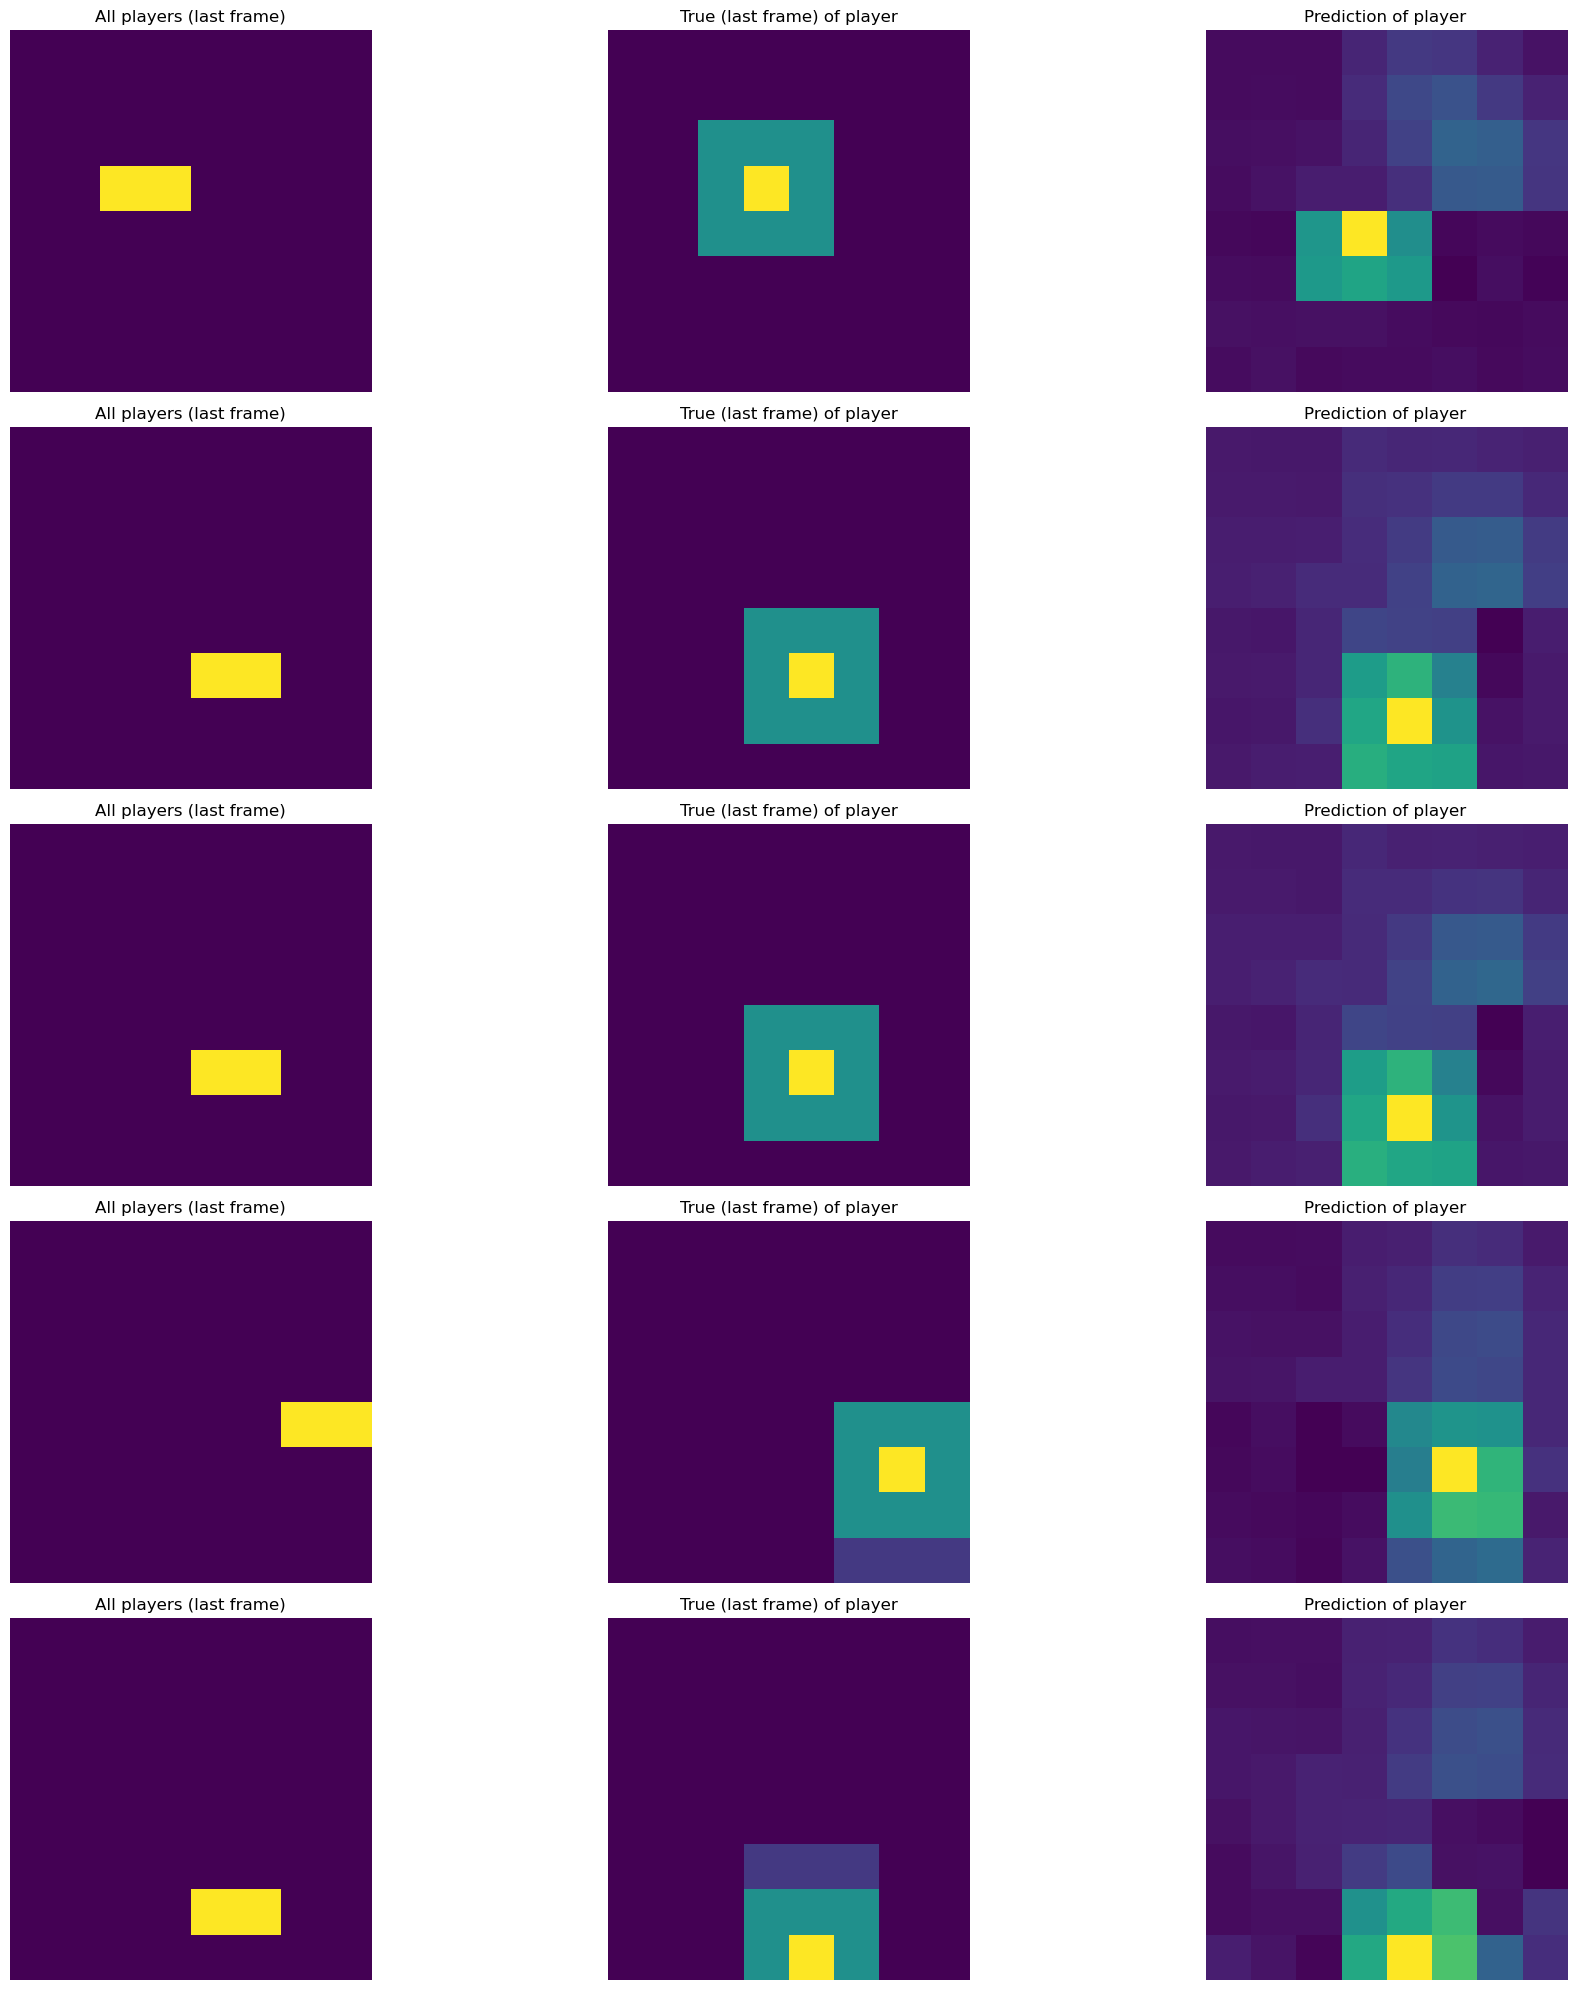

MODELO model1 - ESCENA Scene1
Epoch 1/50
33/33 [==============================] - 3s 35ms/step - loss: 0.0337 - mse: 0.0337 - mae: 0.0980 - val_loss: 0.0247 - val_mse: 0.0247 - val_mae: 0.0980
Epoch 2/50
33/33 [==============================] - 1s 16ms/step - loss: 0.0255 - mse: 0.0255 - mae: 0.0900 - val_loss: 0.0243 - val_mse: 0.0243 - val_mae: 0.0902
Epoch 3/50
33/33 [==============================] - 1s 15ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.0848 - val_loss: 0.0252 - val_mse: 0.0252 - val_mae: 0.0901
Epoch 4/50
33/33 [==============================] - 1s 16ms/step - loss: 0.0236 - mse: 0.0236 - mae: 0.0836 - val_loss: 0.0223 - val_mse: 0.0223 - val_mae: 0.0824
Epoch 5/50
33/33 [==============================] - 1s 15ms/step - loss: 0.0232 - mse: 0.0232 - mae: 0.0816 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.0914
Epoch 6/50
33/33 [==============================] - 1s 18ms/step - loss: 0.0228 - mse: 0.0228 - mae: 0.0814 - val_loss: 0.0238 - val_mse: 0.0238 - val_mae:

5/5 [==============================] - 1s 6ms/step


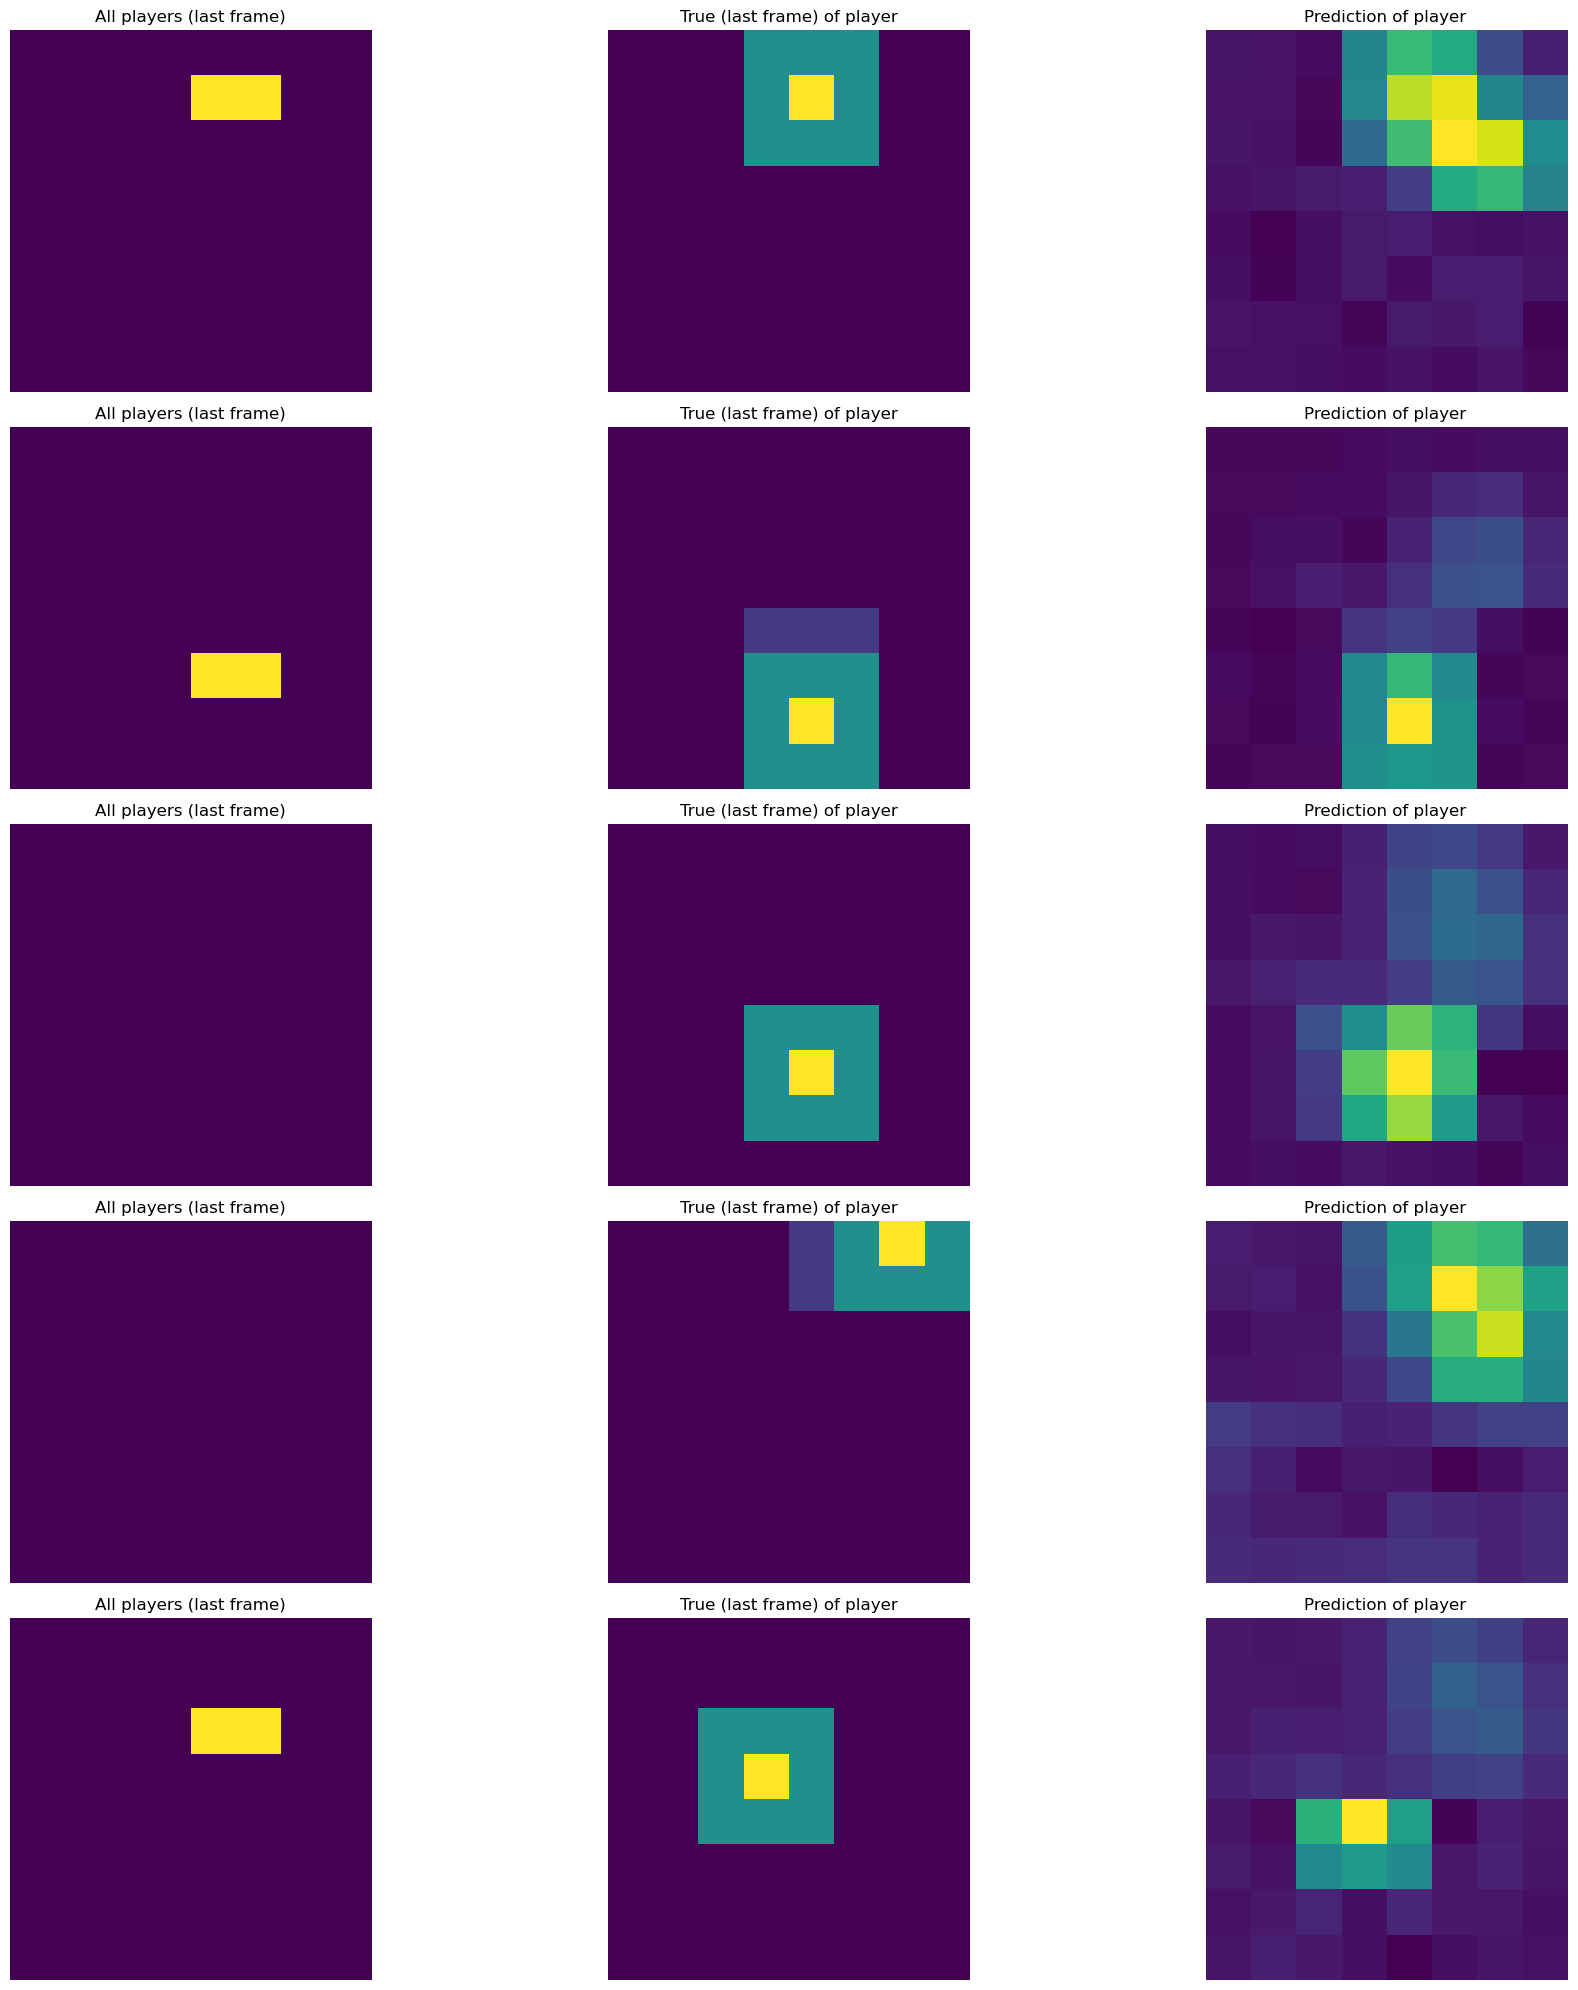

MODELO model2 - ESCENA Scene1
Epoch 1/50
33/33 [==============================] - 4s 62ms/step - loss: 0.0332 - mse: 0.0332 - mae: 0.0954 - val_loss: 0.0255 - val_mse: 0.0255 - val_mae: 0.1014
Epoch 2/50
33/33 [==============================] - 1s 42ms/step - loss: 0.0249 - mse: 0.0249 - mae: 0.0889 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.0831
Epoch 3/50
33/33 [==============================] - 1s 41ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.0838 - val_loss: 0.0236 - val_mse: 0.0236 - val_mae: 0.0862
Epoch 4/50
33/33 [==============================] - 1s 40ms/step - loss: 0.0227 - mse: 0.0227 - mae: 0.0809 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.0861
Epoch 5/50
33/33 [==============================] - 1s 41ms/step - loss: 0.0225 - mse: 0.0225 - mae: 0.0806 - val_loss: 0.0230 - val_mse: 0.0230 - val_mae: 0.0827
Epoch 6/50
33/33 [==============================] - 1s 40ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.0788 - val_loss: 0.0223 - val_mse: 0.0223 - val_mae:

5/5 [==============================] - 1s 15ms/step


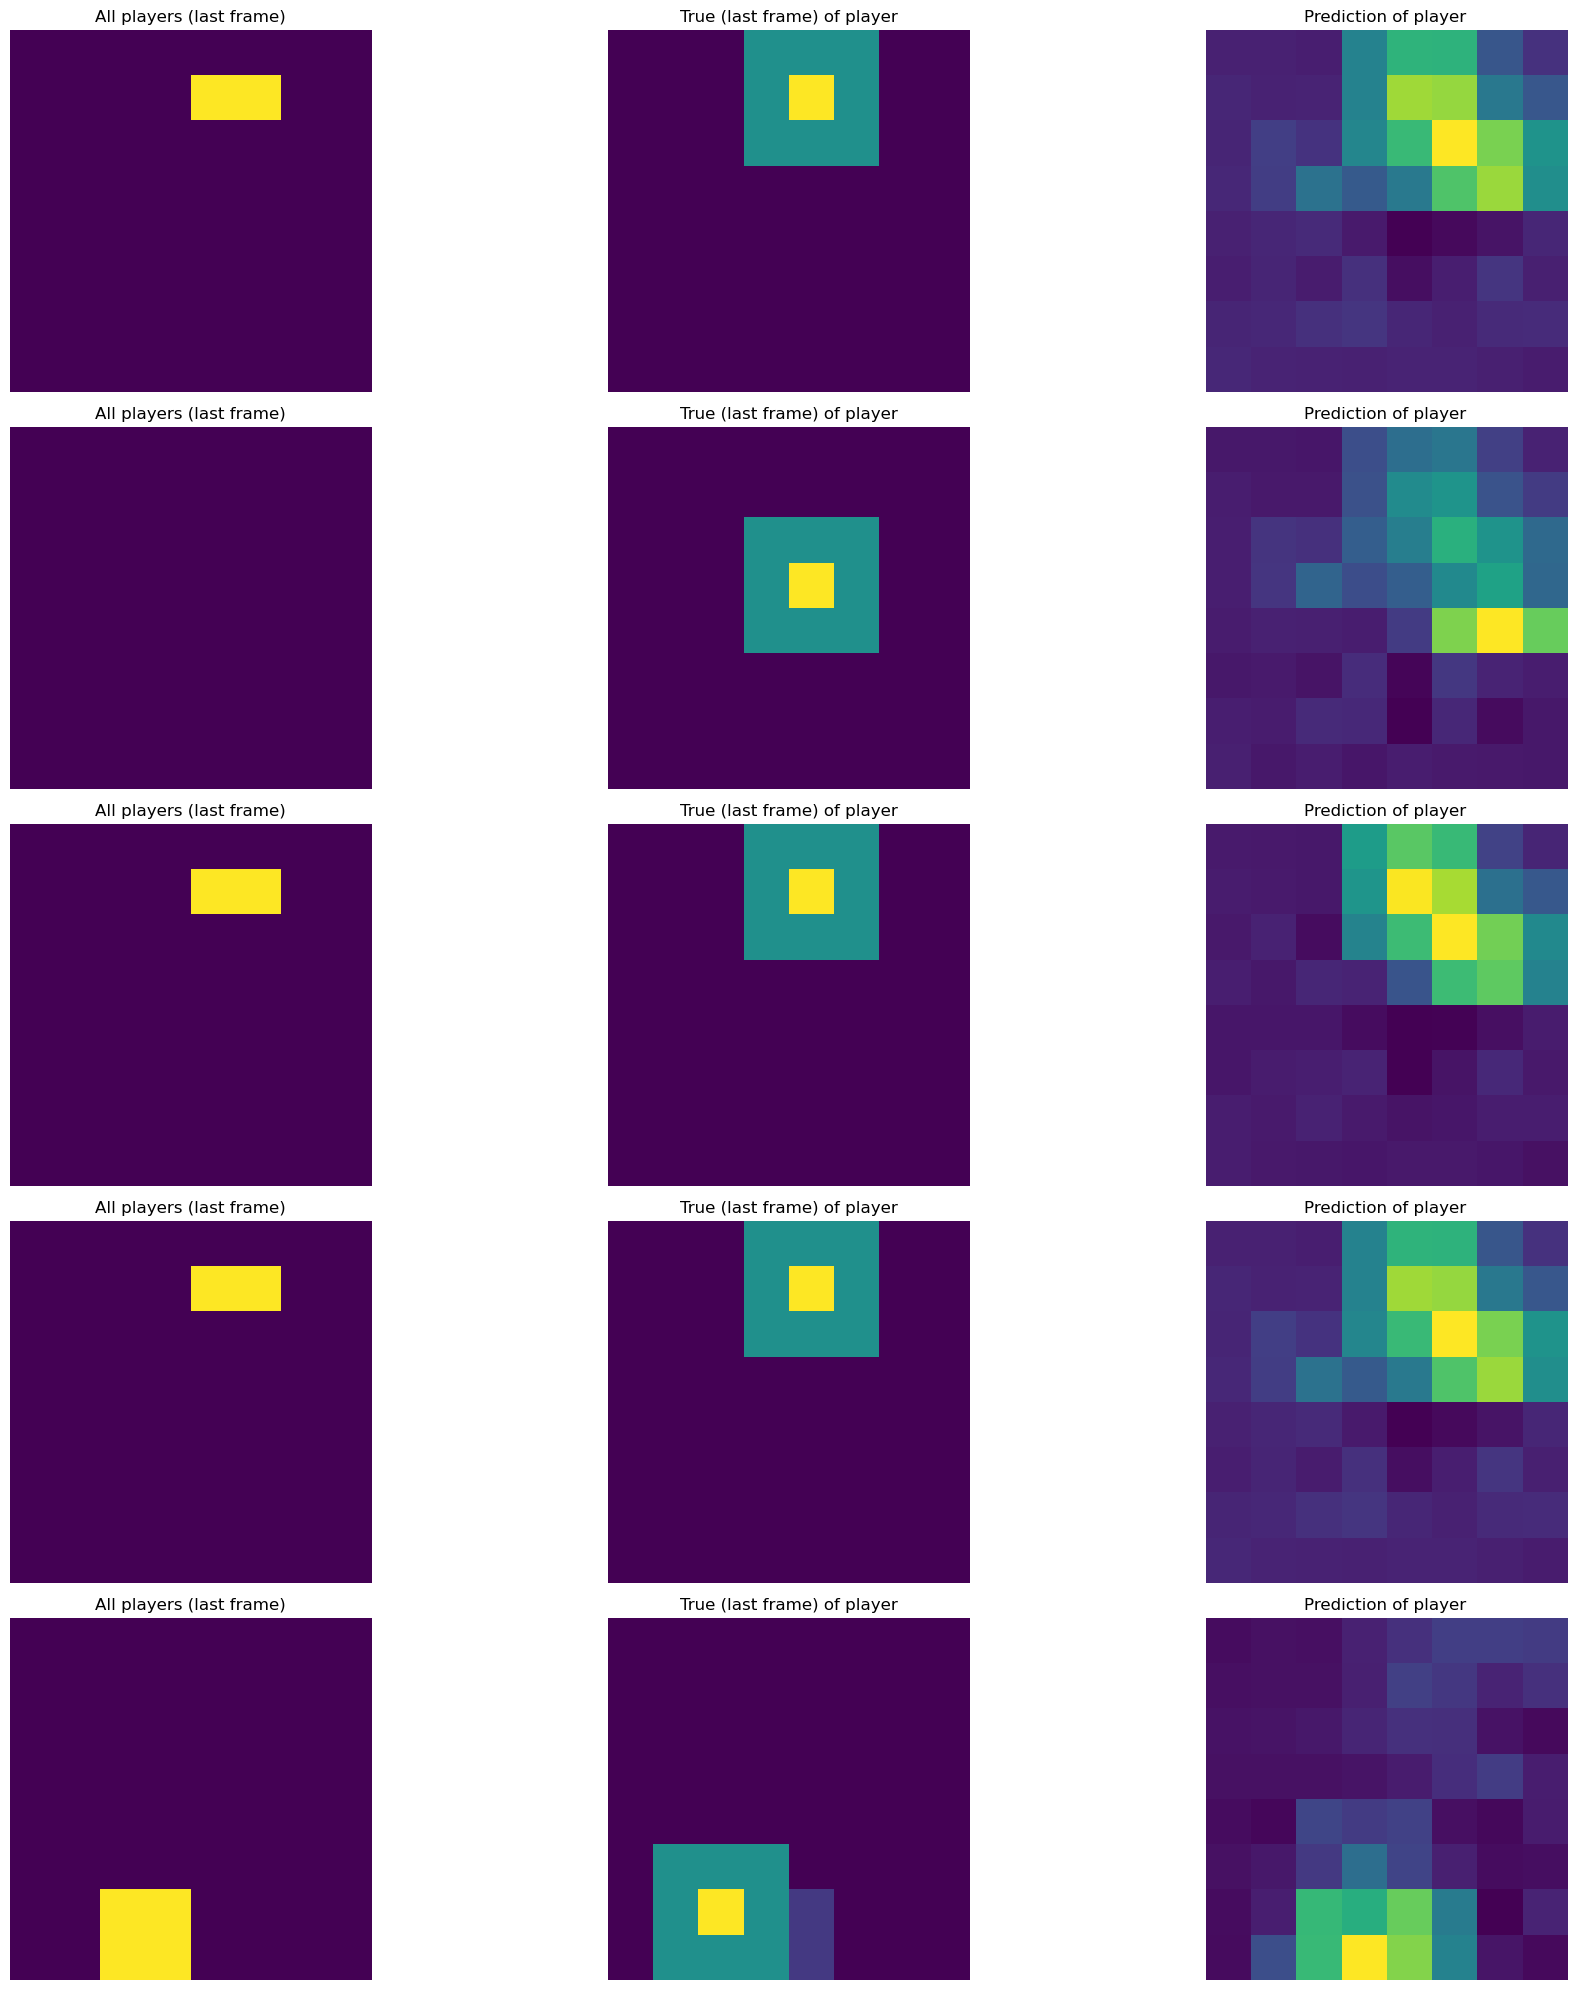

MODELO transf1 - ESCENA Scene1
Epoch 1/50
33/33 [==============================] - 15s 422ms/step - loss: 0.0410 - mse: 0.0410 - mae: 0.1262 - val_loss: 0.0290 - val_mse: 0.0290 - val_mae: 0.1033
Epoch 2/50
33/33 [==============================] - 13s 386ms/step - loss: 0.0311 - mse: 0.0311 - mae: 0.1074 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.0955
Epoch 3/50
33/33 [==============================] - 12s 358ms/step - loss: 0.0266 - mse: 0.0266 - mae: 0.0966 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.0957
Epoch 4/50
33/33 [==============================] - 12s 361ms/step - loss: 0.0245 - mse: 0.0245 - mae: 0.0899 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.0891
Epoch 5/50
33/33 [==============================] - 12s 359ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.0856 - val_loss: 0.0226 - val_mse: 0.0226 - val_mae: 0.0863
Epoch 6/50
33/33 [==============================] - 12s 374ms/step - loss: 0.0226 - mse: 0.0226 - mae: 0.0835 - val_loss: 0.0226 - val_mse: 0.02

5/5 [==============================] - 1s 210ms/step


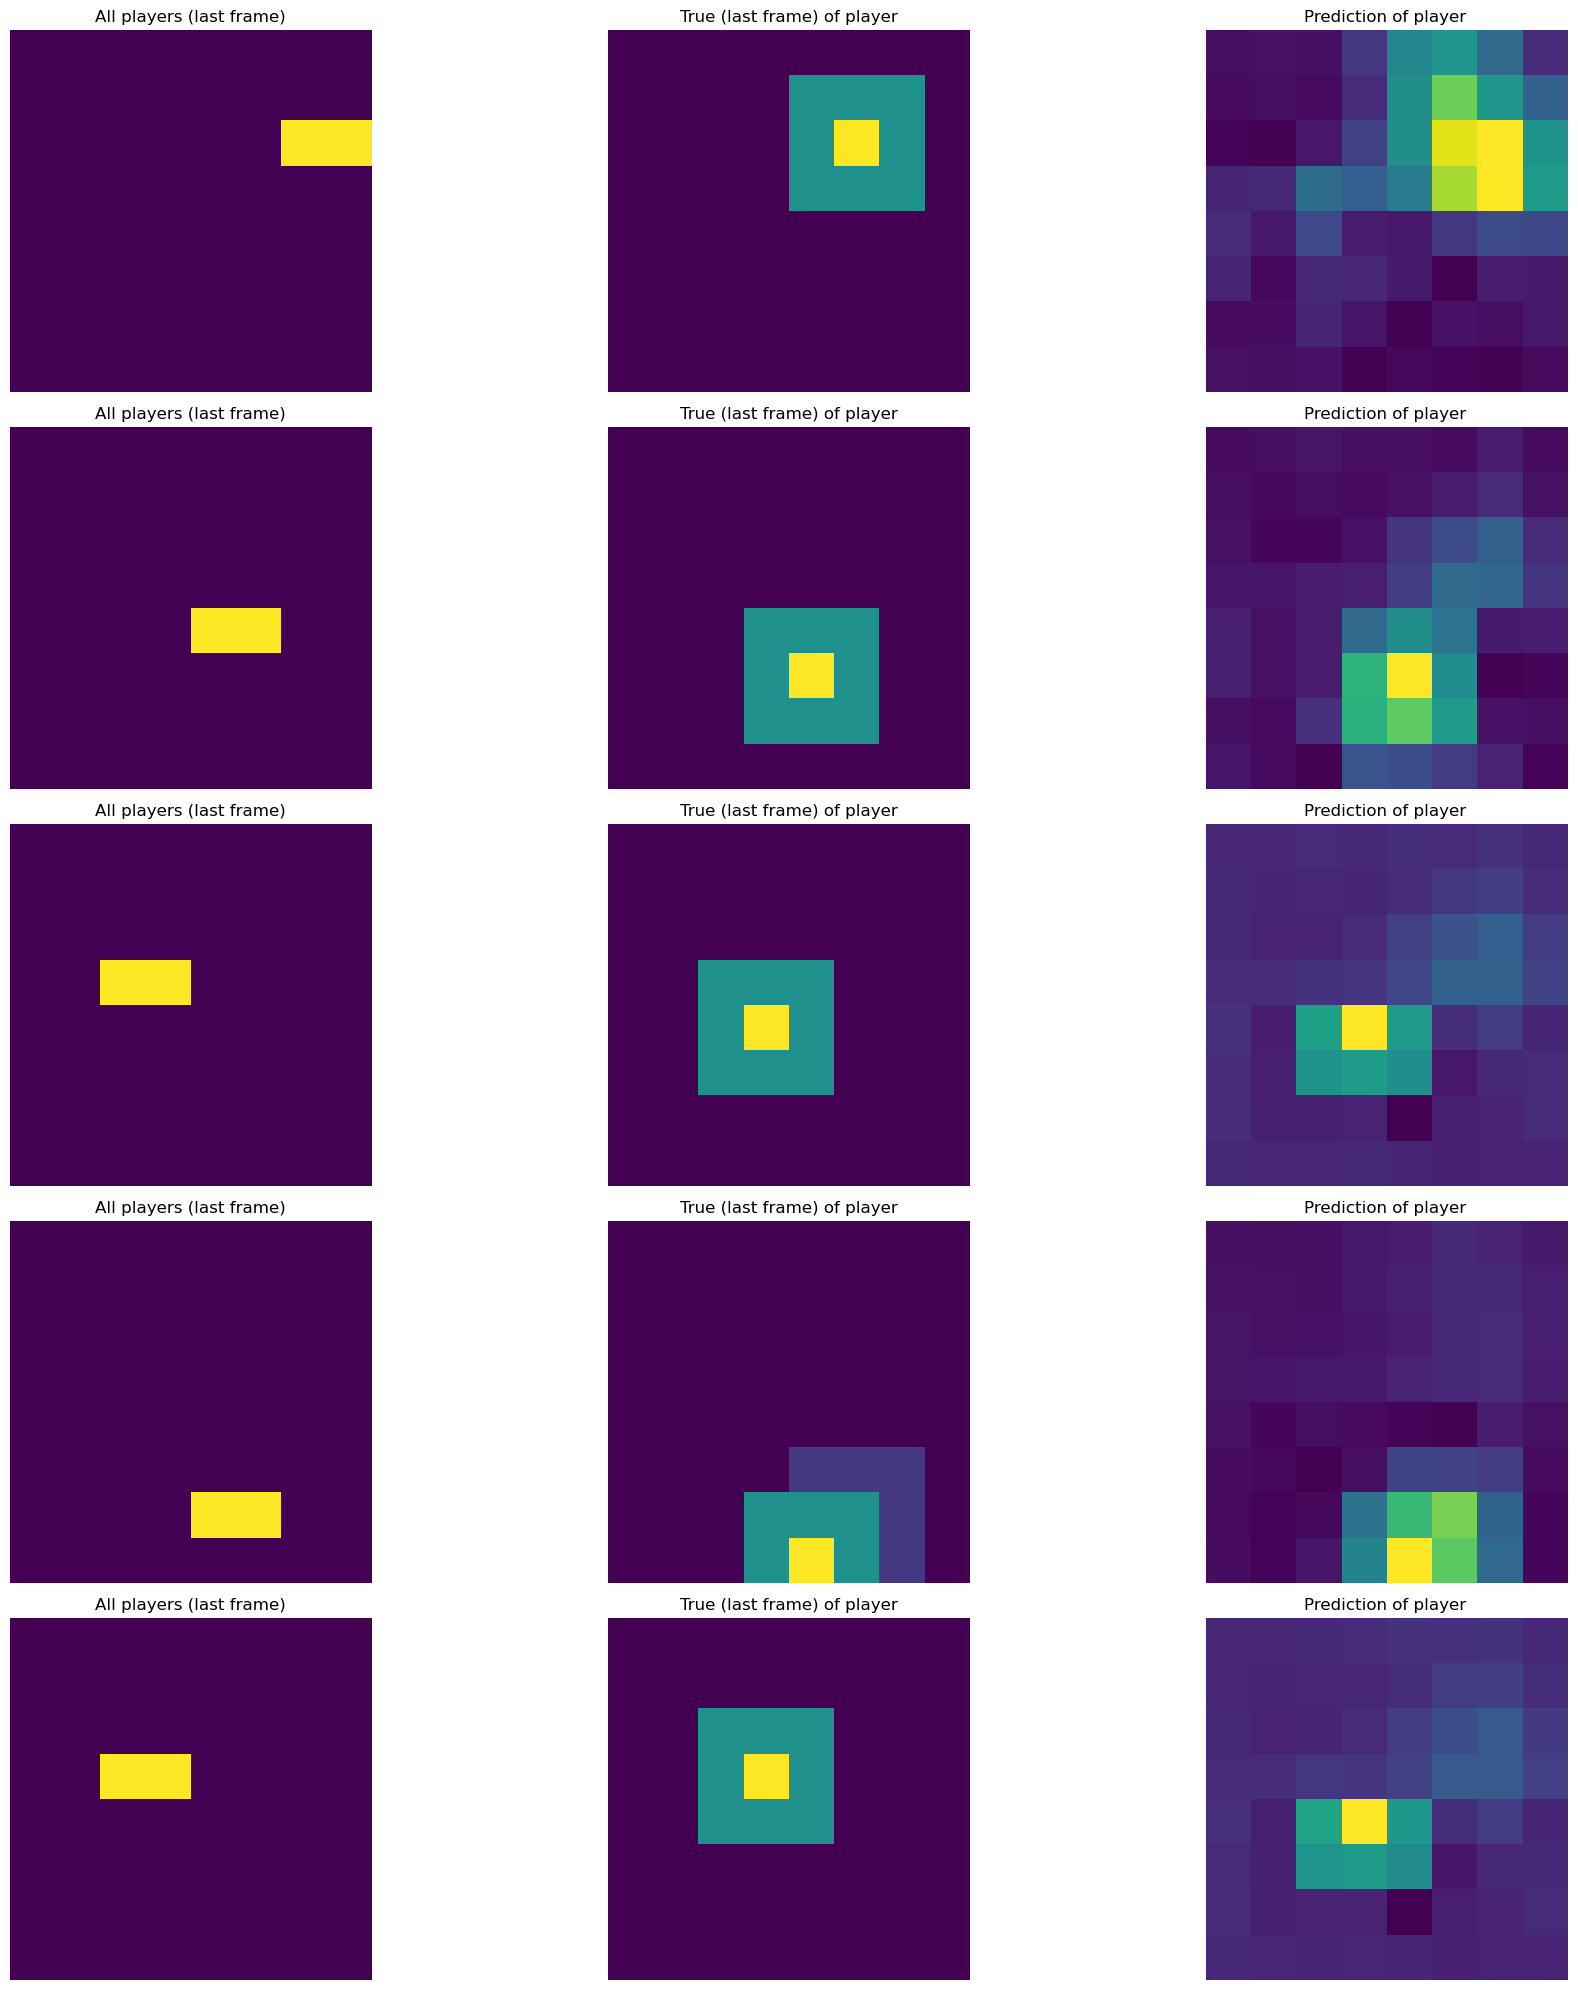

MODELO model0 - ESCENA Scene2
Epoch 1/50
36/36 [==============================] - 11s 163ms/step - loss: 0.0362 - mse: 0.0362 - mae: 0.1070 - val_loss: 0.0337 - val_mse: 0.0337 - val_mae: 0.1252
Epoch 2/50
36/36 [==============================] - 5s 139ms/step - loss: 0.0310 - mse: 0.0310 - mae: 0.1093 - val_loss: 0.0288 - val_mse: 0.0288 - val_mae: 0.1035
Epoch 3/50
36/36 [==============================] - 5s 135ms/step - loss: 0.0270 - mse: 0.0270 - mae: 0.0971 - val_loss: 0.0265 - val_mse: 0.0265 - val_mae: 0.0986
Epoch 4/50
36/36 [==============================] - 5s 135ms/step - loss: 0.0252 - mse: 0.0252 - mae: 0.0915 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.0918
Epoch 5/50
36/36 [==============================] - 5s 135ms/step - loss: 0.0245 - mse: 0.0245 - mae: 0.0886 - val_loss: 0.0238 - val_mse: 0.0238 - val_mae: 0.0844
Epoch 6/50
36/36 [==============================] - 5s 135ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.0853 - val_loss: 0.0228 - val_mse: 0.0228 - v

3/3 [==============================] - 1s 60ms/step


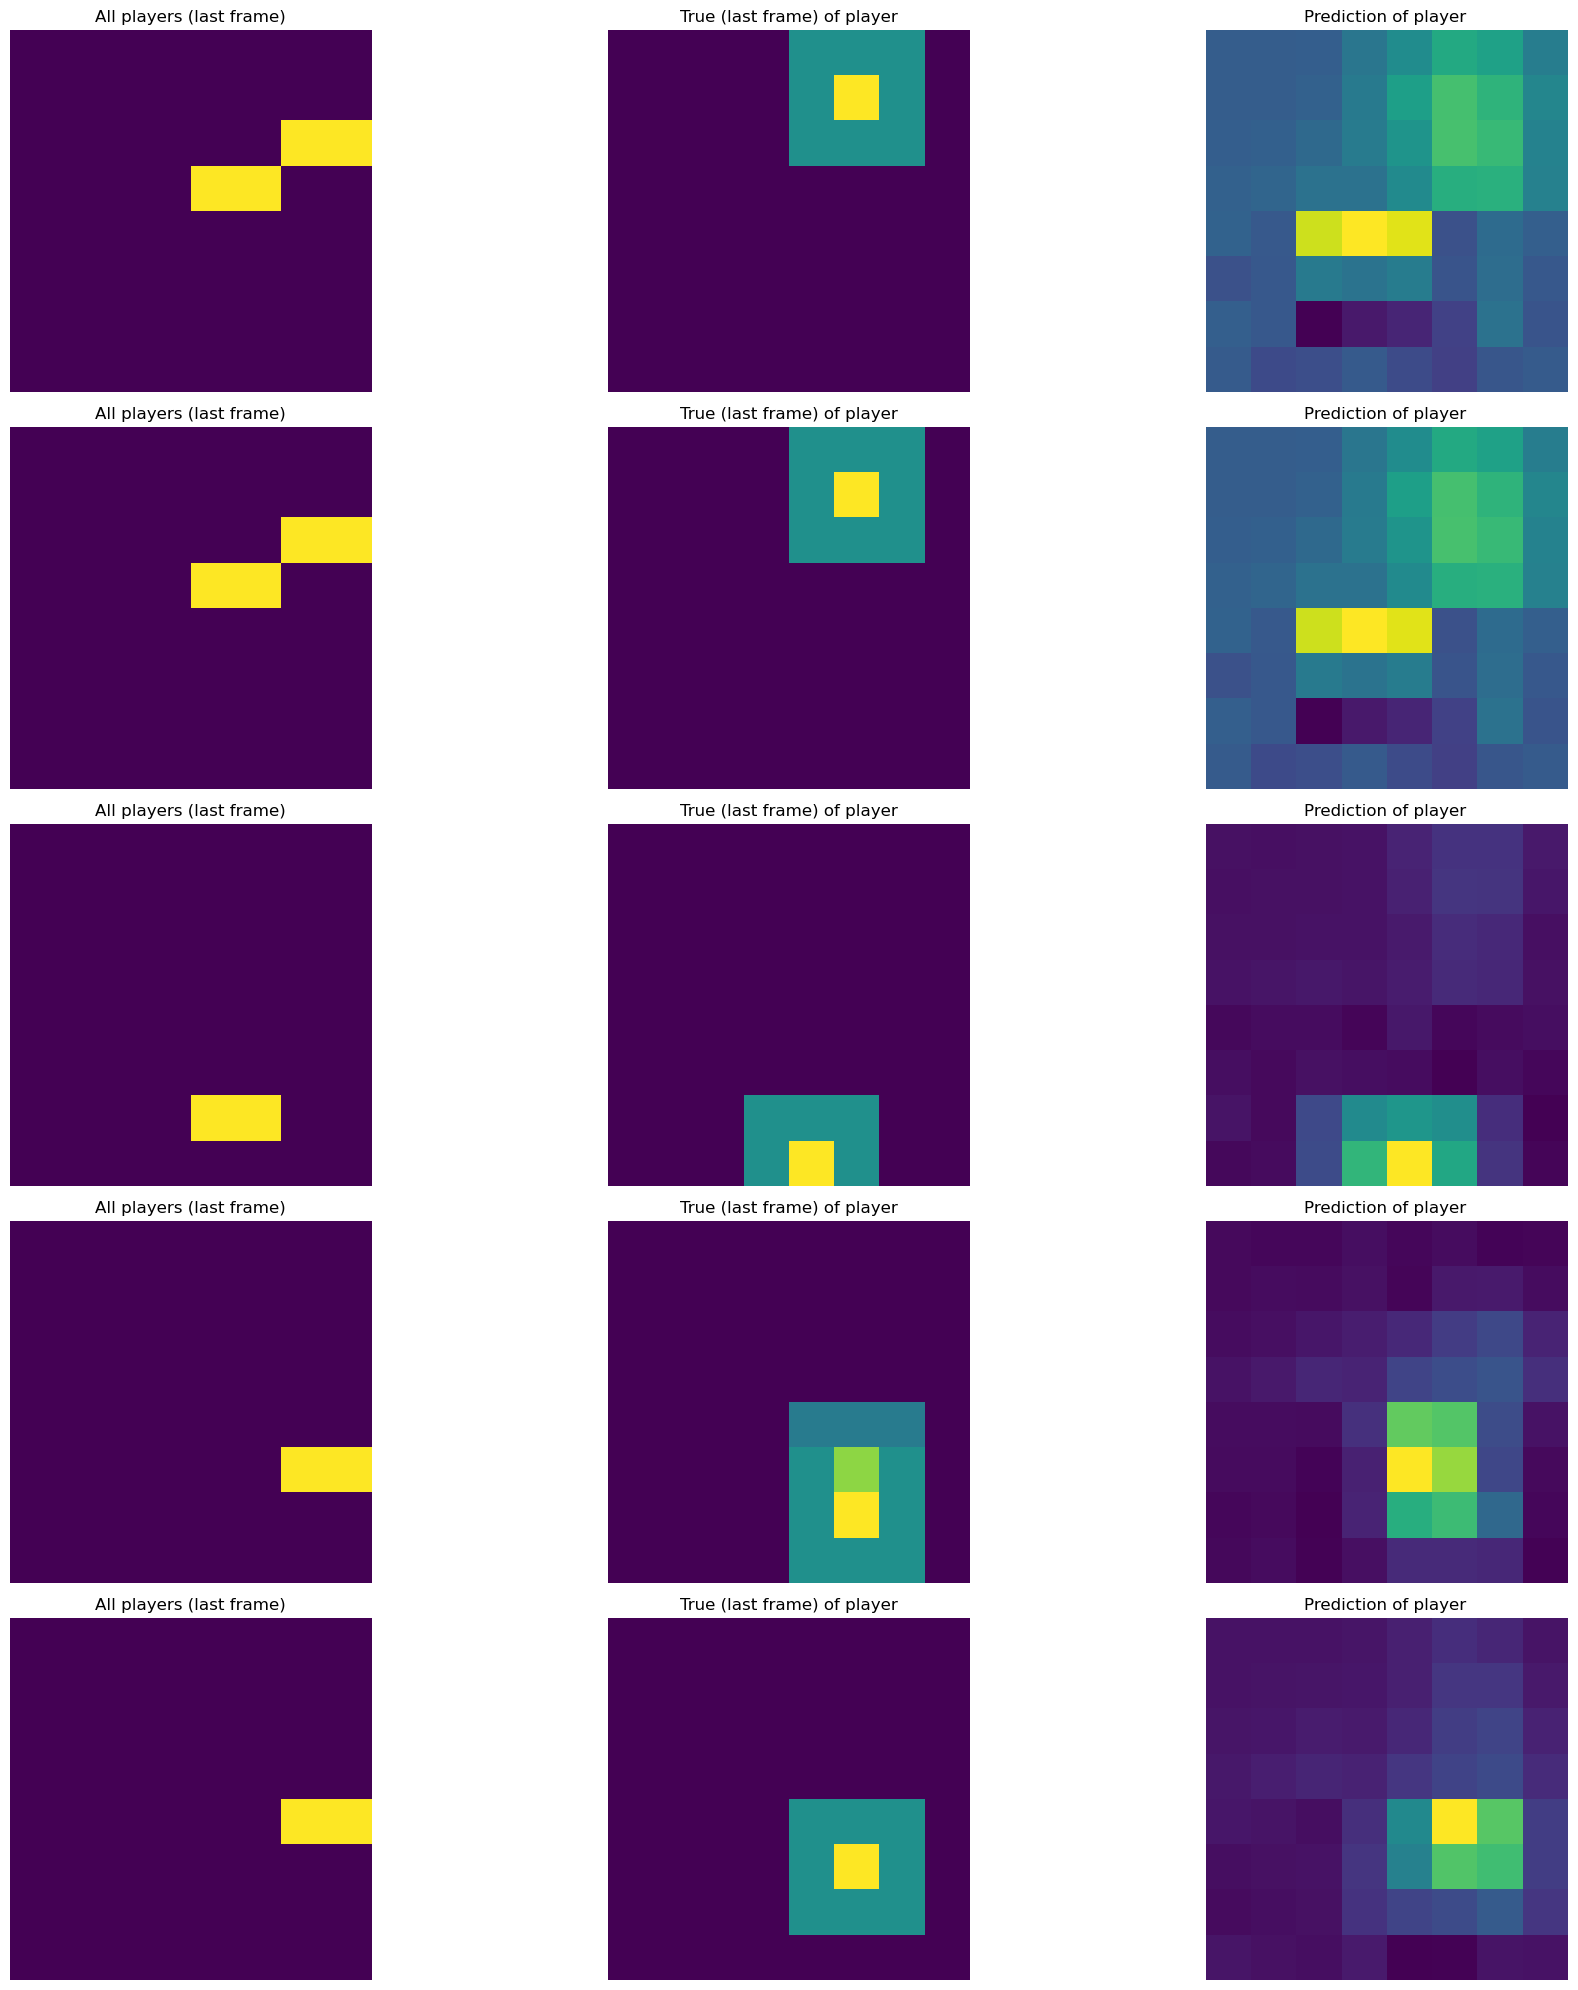

MODELO model1 - ESCENA Scene2
Epoch 1/50
36/36 [==============================] - 5s 98ms/step - loss: 0.0323 - mse: 0.0323 - mae: 0.0958 - val_loss: 0.0289 - val_mse: 0.0289 - val_mae: 0.1043
Epoch 2/50
36/36 [==============================] - 3s 72ms/step - loss: 0.0249 - mse: 0.0249 - mae: 0.0890 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.0882
Epoch 3/50
36/36 [==============================] - 3s 71ms/step - loss: 0.0235 - mse: 0.0235 - mae: 0.0827 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.0882
Epoch 4/50
36/36 [==============================] - 3s 71ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.0831 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.0828
Epoch 5/50
36/36 [==============================] - 3s 71ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.0804 - val_loss: 0.0254 - val_mse: 0.0254 - val_mae: 0.0888
Epoch 6/50
36/36 [==============================] - 3s 72ms/step - loss: 0.0225 - mse: 0.0225 - mae: 0.0812 - val_loss: 0.0236 - val_mse: 0.0236 - val_mae:

3/3 [==============================] - 1s 19ms/step


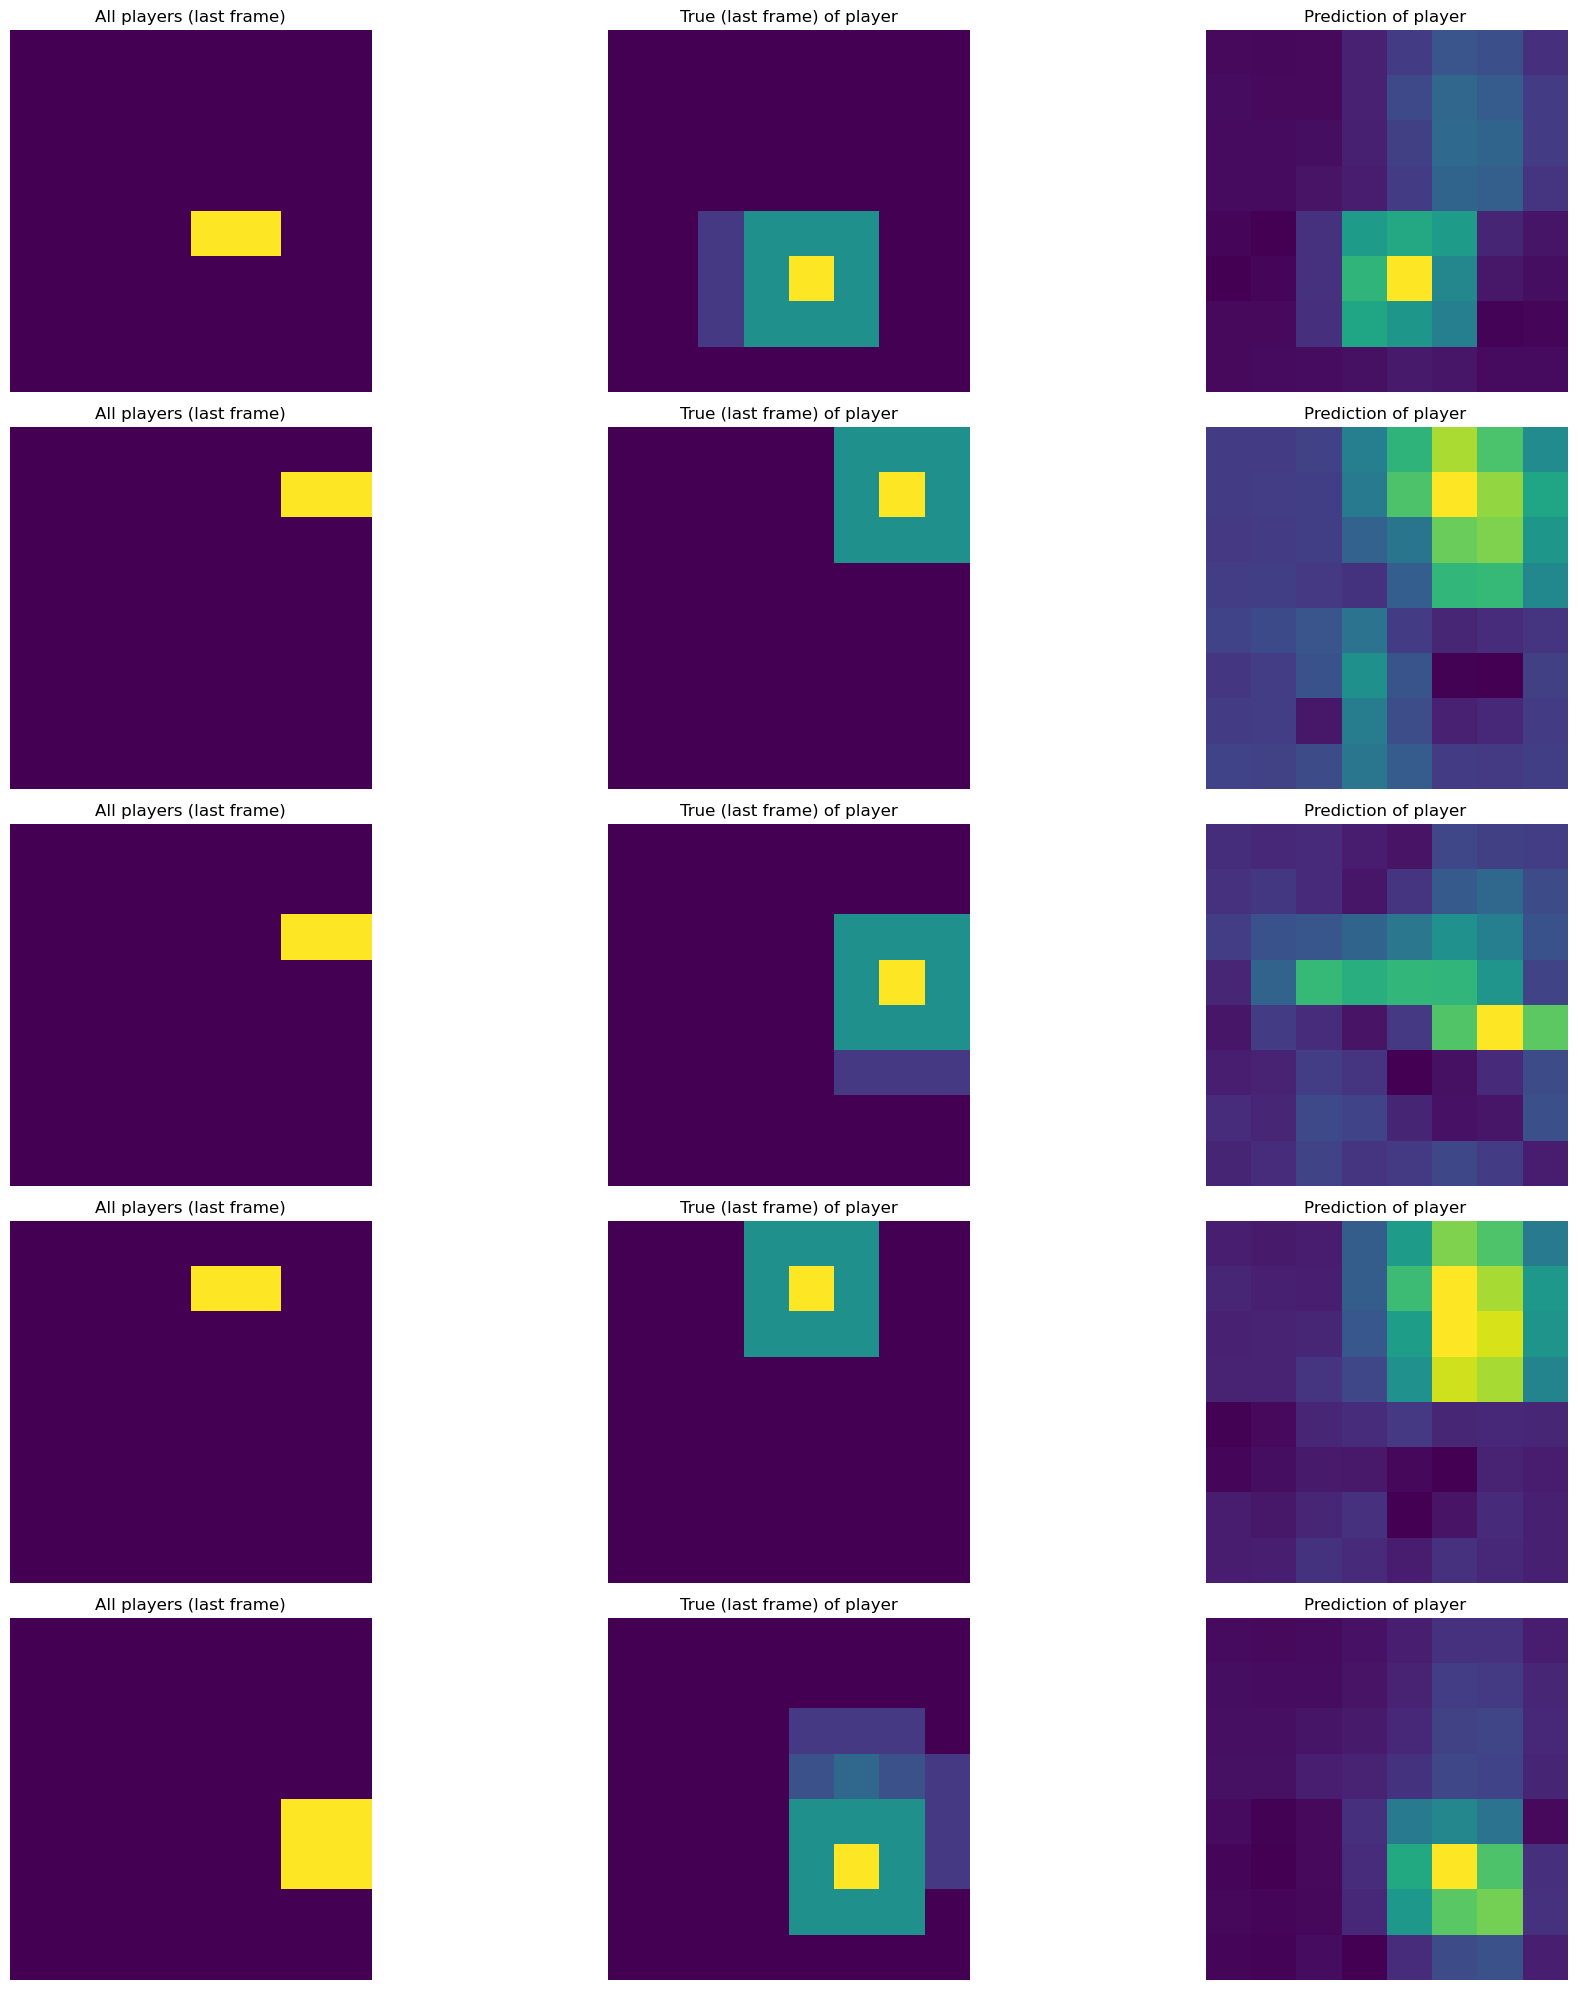

MODELO model2 - ESCENA Scene2
Epoch 1/50
36/36 [==============================] - 7s 150ms/step - loss: 0.0315 - mse: 0.0315 - mae: 0.0932 - val_loss: 0.0273 - val_mse: 0.0273 - val_mae: 0.0958
Epoch 2/50
36/36 [==============================] - 4s 120ms/step - loss: 0.0243 - mse: 0.0243 - mae: 0.0865 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.0907
Epoch 3/50
36/36 [==============================] - 4s 122ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.0835 - val_loss: 0.0235 - val_mse: 0.0235 - val_mae: 0.0882
Epoch 4/50
36/36 [==============================] - 5s 125ms/step - loss: 0.0224 - mse: 0.0224 - mae: 0.0810 - val_loss: 0.0234 - val_mse: 0.0234 - val_mae: 0.0840
Epoch 5/50
36/36 [==============================] - 4s 123ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.0799 - val_loss: 0.0223 - val_mse: 0.0223 - val_mae: 0.0813
Epoch 6/50
36/36 [==============================] - 4s 124ms/step - loss: 0.0217 - mse: 0.0217 - mae: 0.0789 - val_loss: 0.0221 - val_mse: 0.0221 - va

3/3 [==============================] - 1s 73ms/step


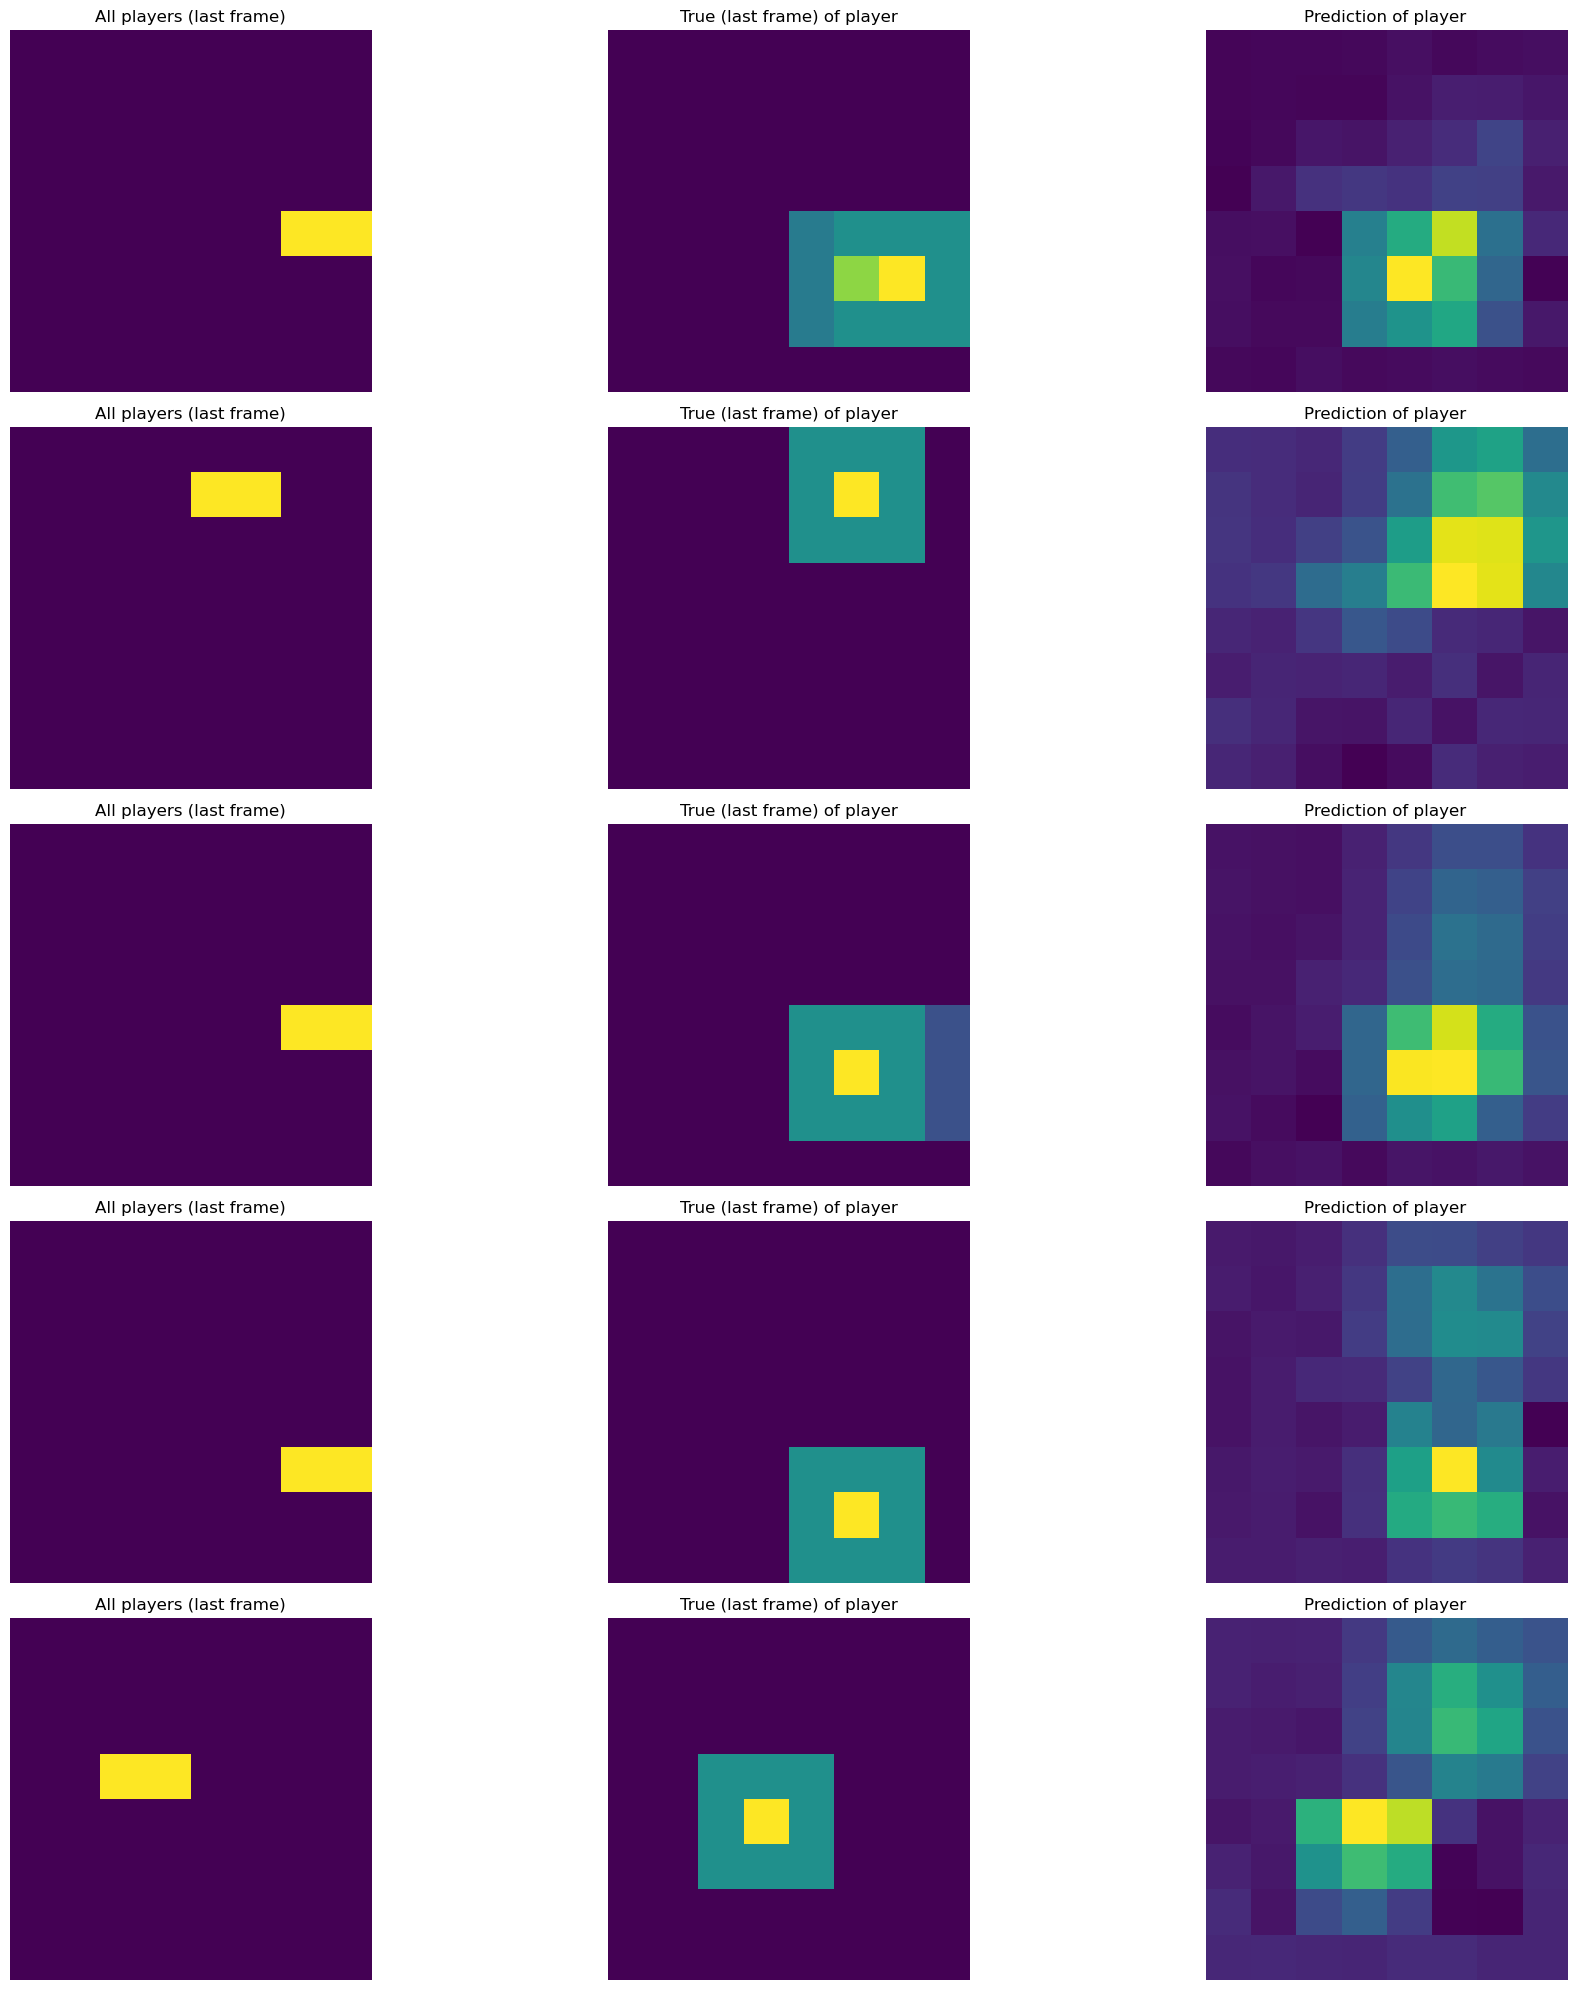

MODELO transf1 - ESCENA Scene2
Epoch 1/50
36/36 [==============================] - 58s 2s/step - loss: 0.0397 - mse: 0.0397 - mae: 0.1230 - val_loss: 0.0340 - val_mse: 0.0340 - val_mae: 0.1111
Epoch 2/50
36/36 [==============================] - 56s 2s/step - loss: 0.0310 - mse: 0.0310 - mae: 0.1068 - val_loss: 0.0287 - val_mse: 0.0287 - val_mae: 0.1035
Epoch 3/50
36/36 [==============================] - 56s 2s/step - loss: 0.0263 - mse: 0.0263 - mae: 0.0954 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.0916
Epoch 4/50
36/36 [==============================] - 57s 2s/step - loss: 0.0243 - mse: 0.0243 - mae: 0.0905 - val_loss: 0.0242 - val_mse: 0.0242 - val_mae: 0.0855
Epoch 5/50
36/36 [==============================] - 56s 2s/step - loss: 0.0235 - mse: 0.0235 - mae: 0.0861 - val_loss: 0.0236 - val_mse: 0.0236 - val_mae: 0.0895
Epoch 6/50
36/36 [==============================] - 56s 2s/step - loss: 0.0226 - mse: 0.0226 - mae: 0.0858 - val_loss: 0.0233 - val_mse: 0.0233 - val_mae: 0.08

3/3 [==============================] - 3s 1s/step


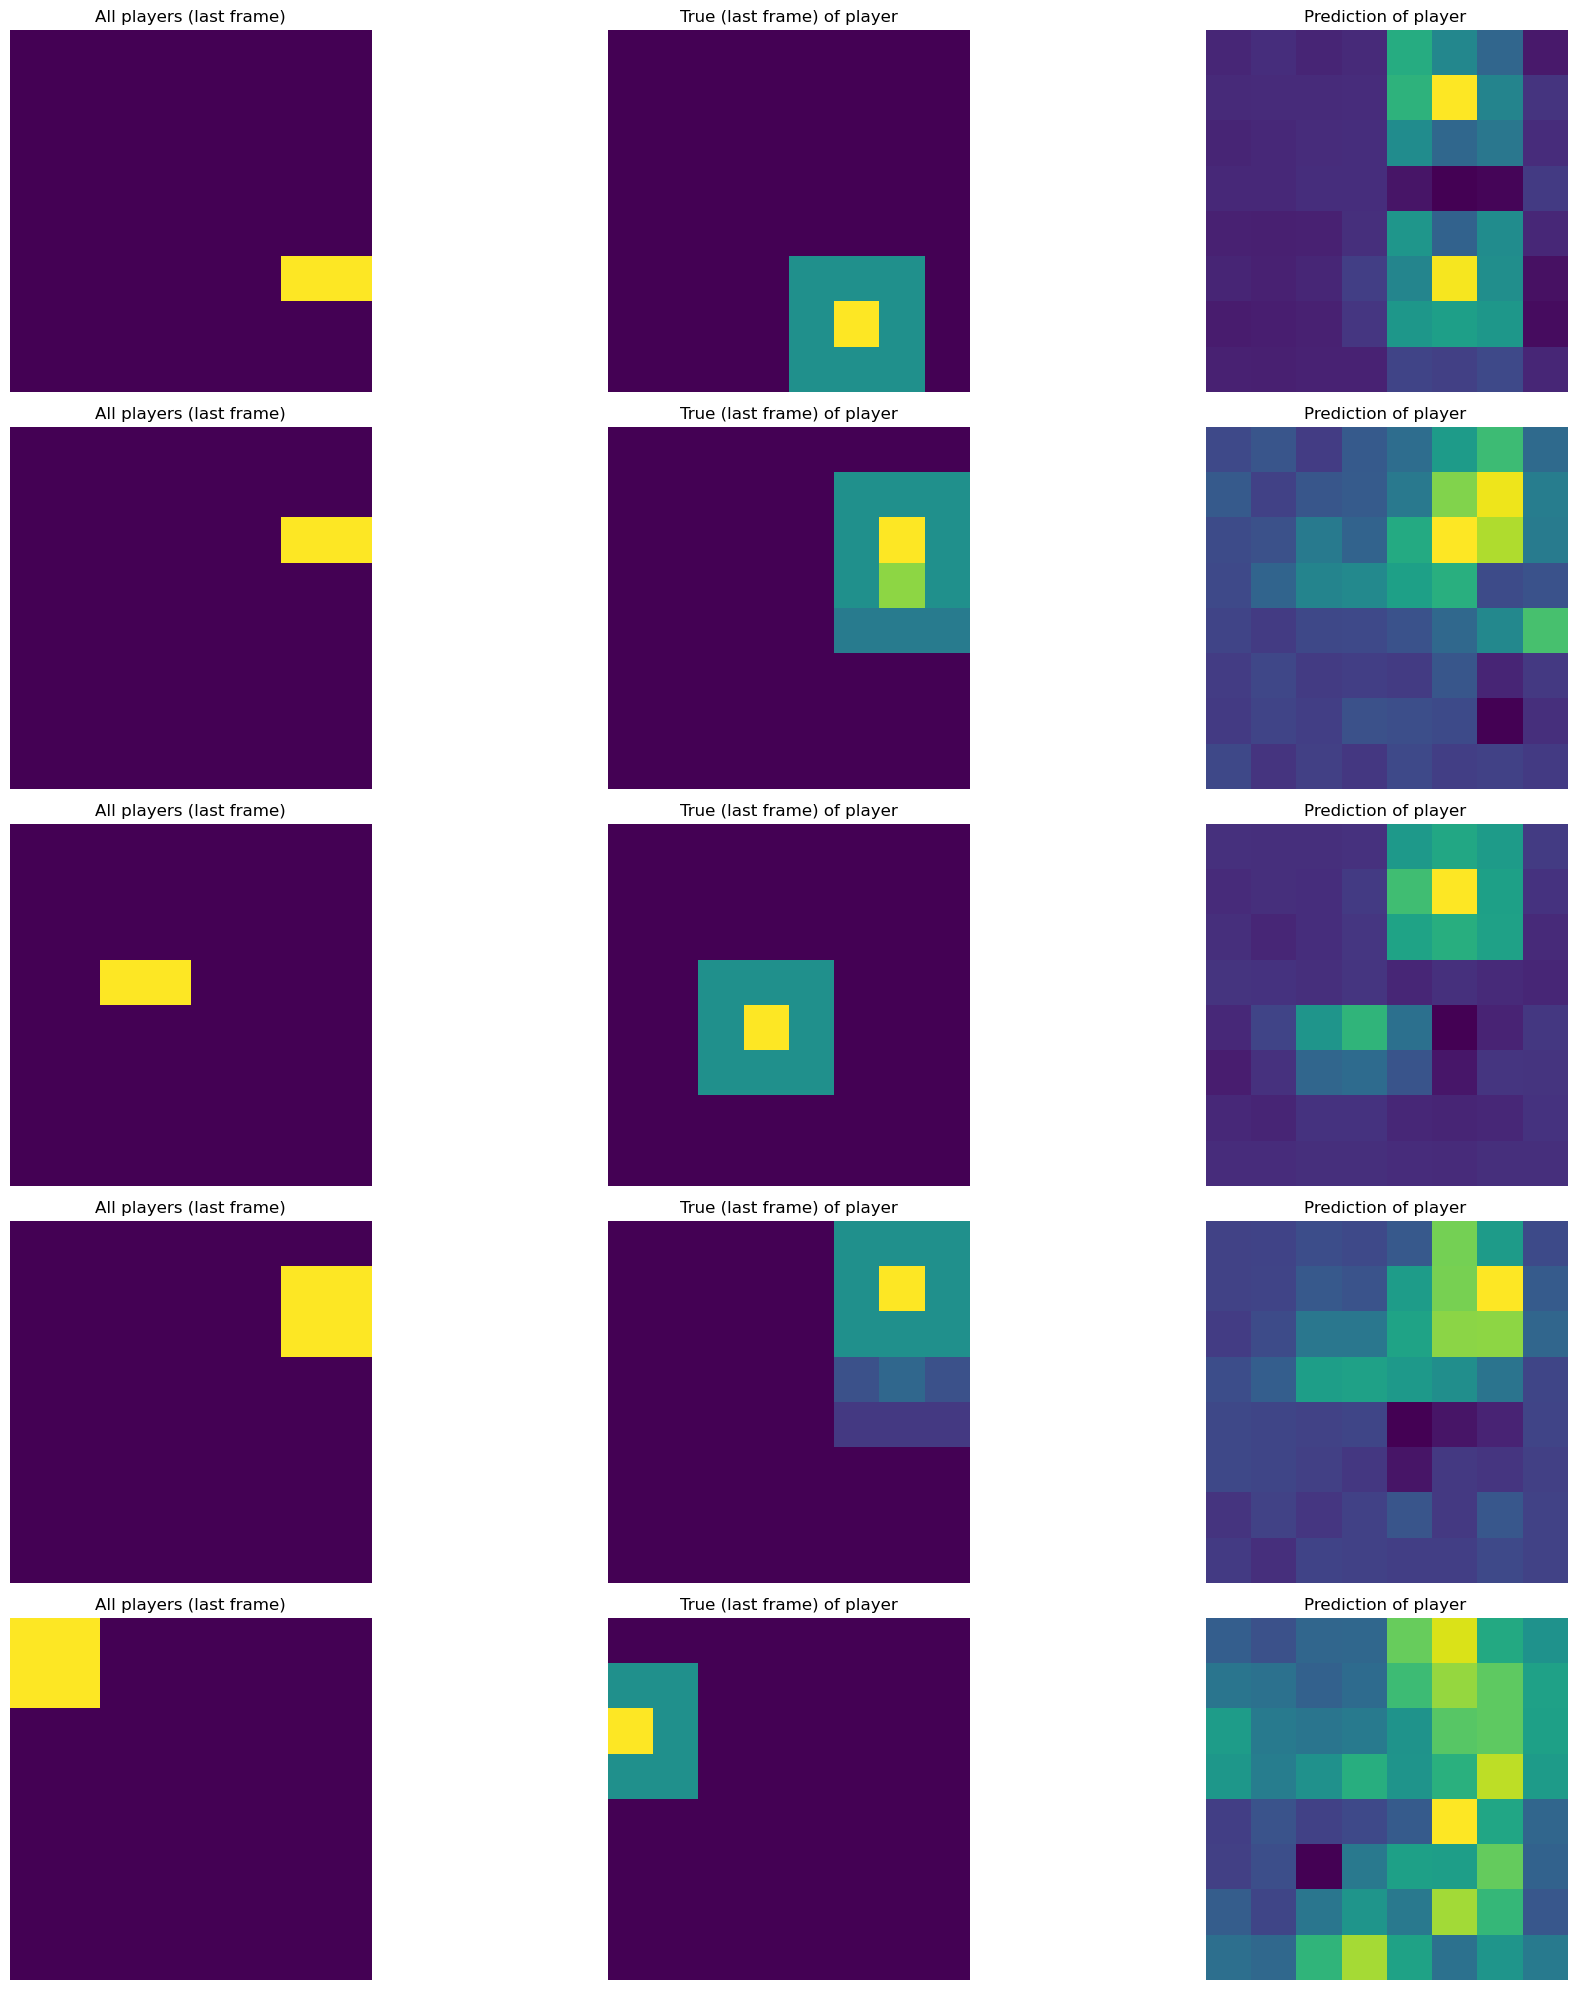

MODELO model0 - ESCENA Scene3
Epoch 1/50
34/34 [==============================] - 12s 188ms/step - loss: 0.0359 - mse: 0.0359 - mae: 0.1056 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1248
Epoch 2/50
34/34 [==============================] - 6s 167ms/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1102 - val_loss: 0.0304 - val_mse: 0.0304 - val_mae: 0.1043
Epoch 3/50
34/34 [==============================] - 6s 165ms/step - loss: 0.0264 - mse: 0.0264 - mae: 0.0956 - val_loss: 0.0287 - val_mse: 0.0287 - val_mae: 0.0946
Epoch 4/50
34/34 [==============================] - 6s 165ms/step - loss: 0.0245 - mse: 0.0245 - mae: 0.0889 - val_loss: 0.0281 - val_mse: 0.0281 - val_mae: 0.0947
Epoch 5/50
34/34 [==============================] - 6s 165ms/step - loss: 0.0236 - mse: 0.0236 - mae: 0.0850 - val_loss: 0.0274 - val_mse: 0.0274 - val_mae: 0.0946
Epoch 6/50
34/34 [==============================] - 6s 165ms/step - loss: 0.0228 - mse: 0.0228 - mae: 0.0823 - val_loss: 0.0274 - val_mse: 0.0274 - v

4/4 [==============================] - 1s 71ms/step


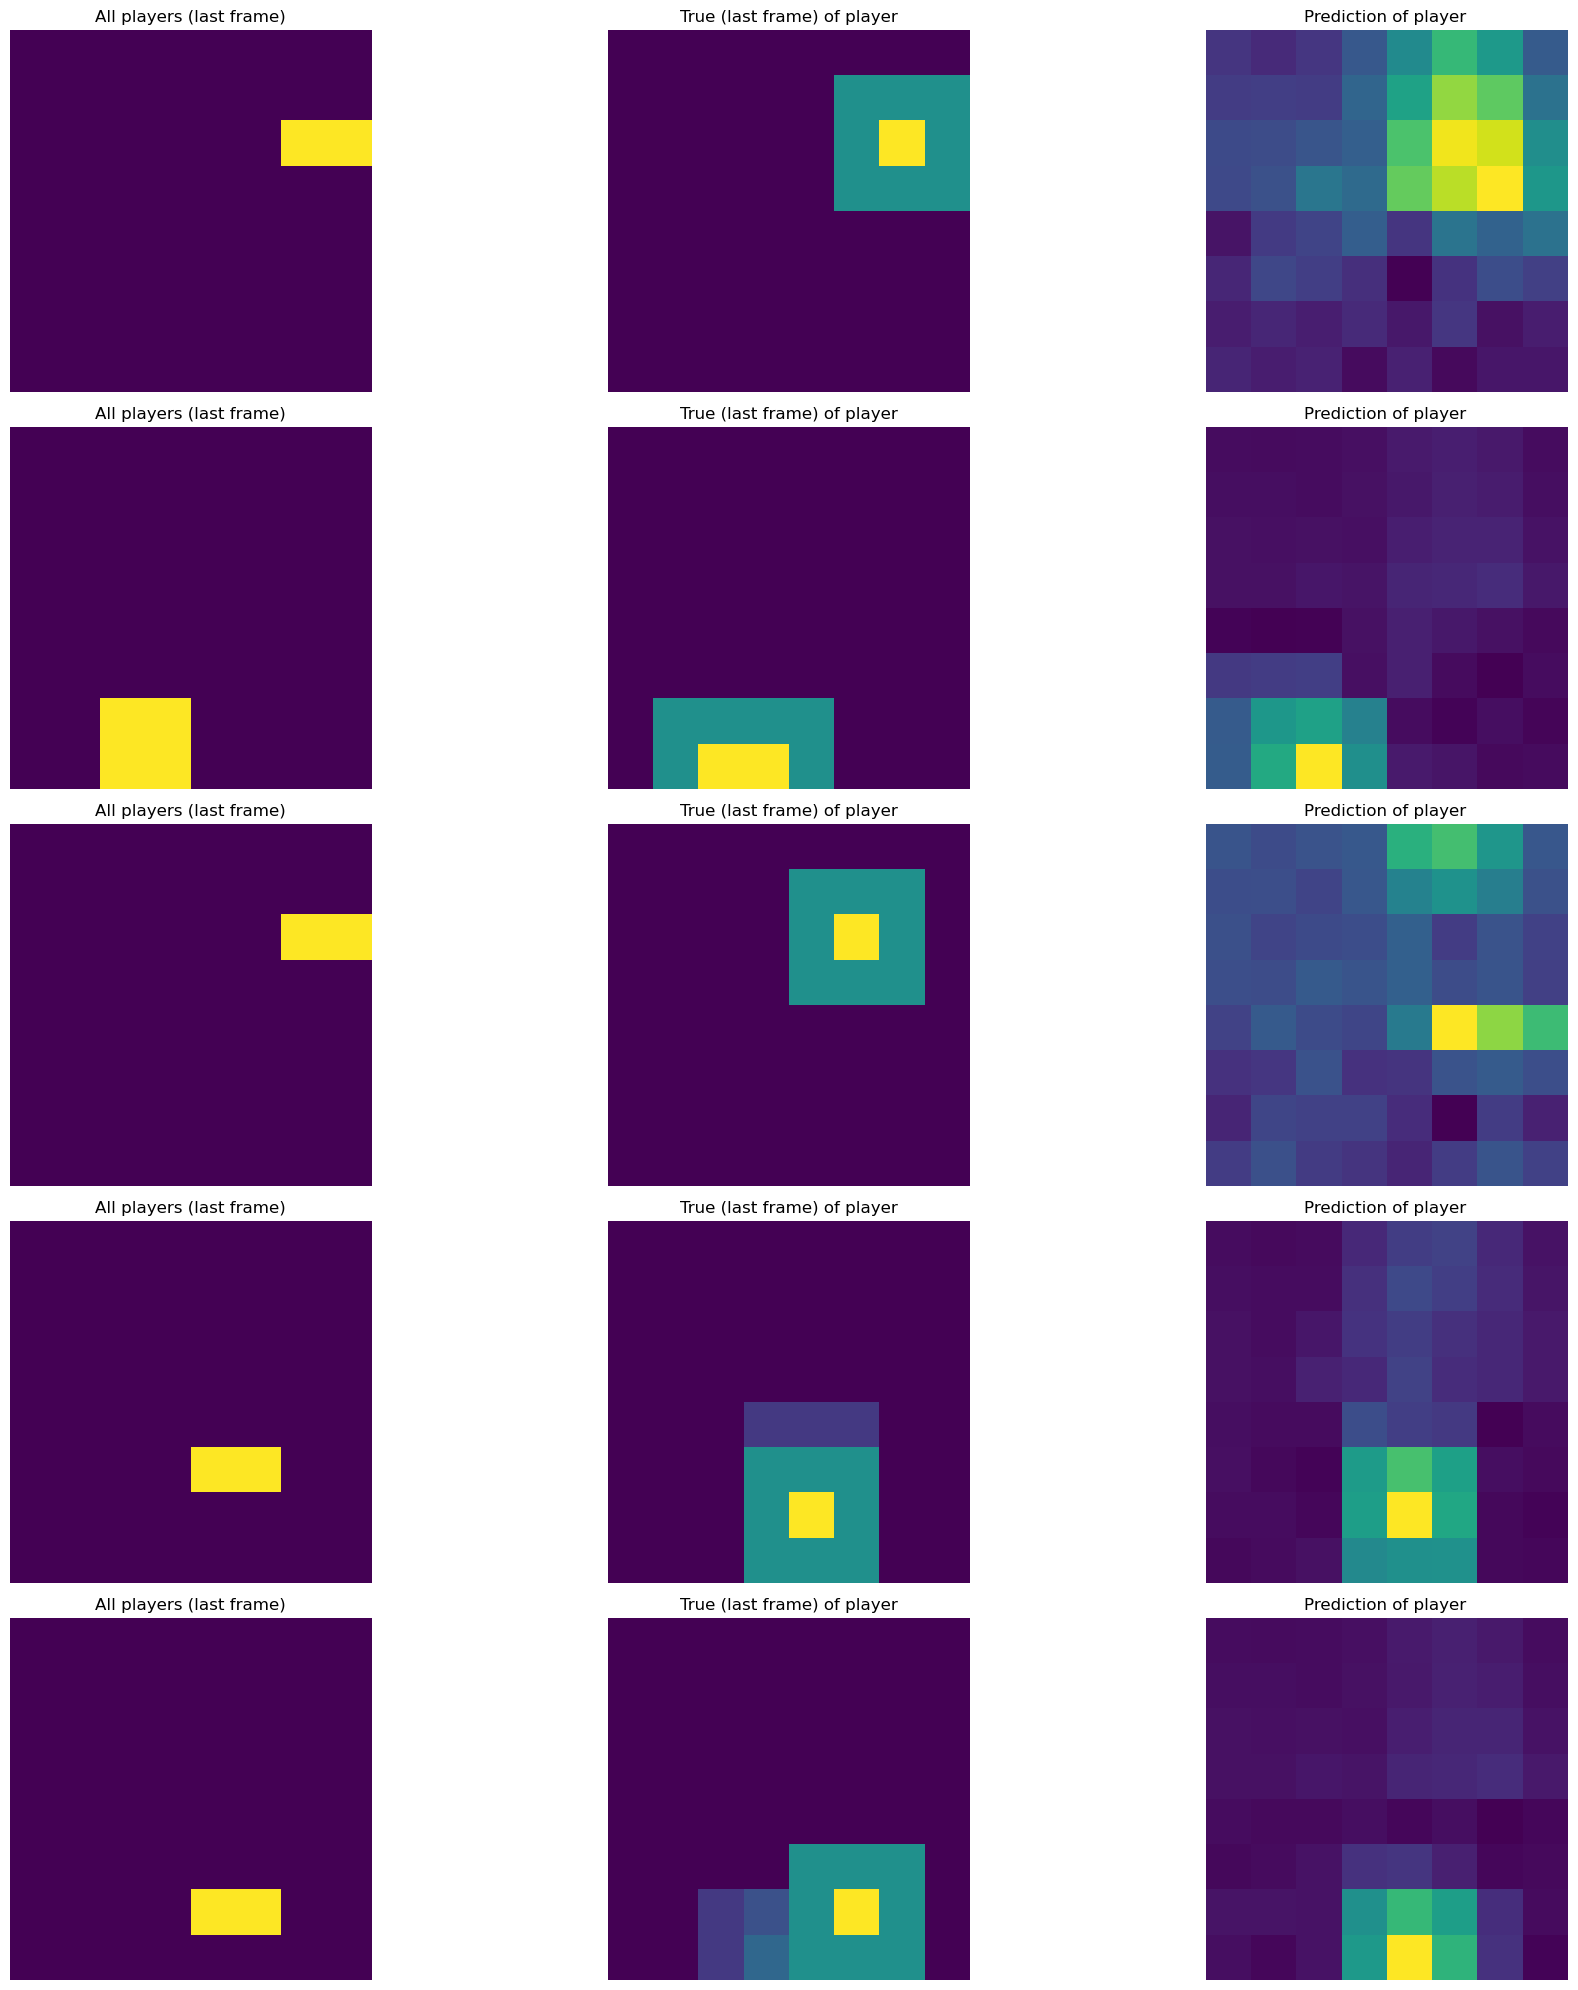

MODELO model1 - ESCENA Scene3
Epoch 1/50
34/34 [==============================] - 6s 132ms/step - loss: 0.0320 - mse: 0.0320 - mae: 0.0955 - val_loss: 0.0292 - val_mse: 0.0292 - val_mae: 0.0998
Epoch 2/50
34/34 [==============================] - 4s 114ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.0864 - val_loss: 0.0276 - val_mse: 0.0276 - val_mae: 0.0930
Epoch 3/50
34/34 [==============================] - 4s 113ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.0817 - val_loss: 0.0272 - val_mse: 0.0272 - val_mae: 0.0913
Epoch 4/50
34/34 [==============================] - 4s 112ms/step - loss: 0.0223 - mse: 0.0223 - mae: 0.0805 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.0902
Epoch 5/50
34/34 [==============================] - 4s 110ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0784 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.0922
Epoch 6/50
34/34 [==============================] - 4s 110ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.0779 - val_loss: 0.0290 - val_mse: 0.0290 - va

4/4 [==============================] - 1s 21ms/step


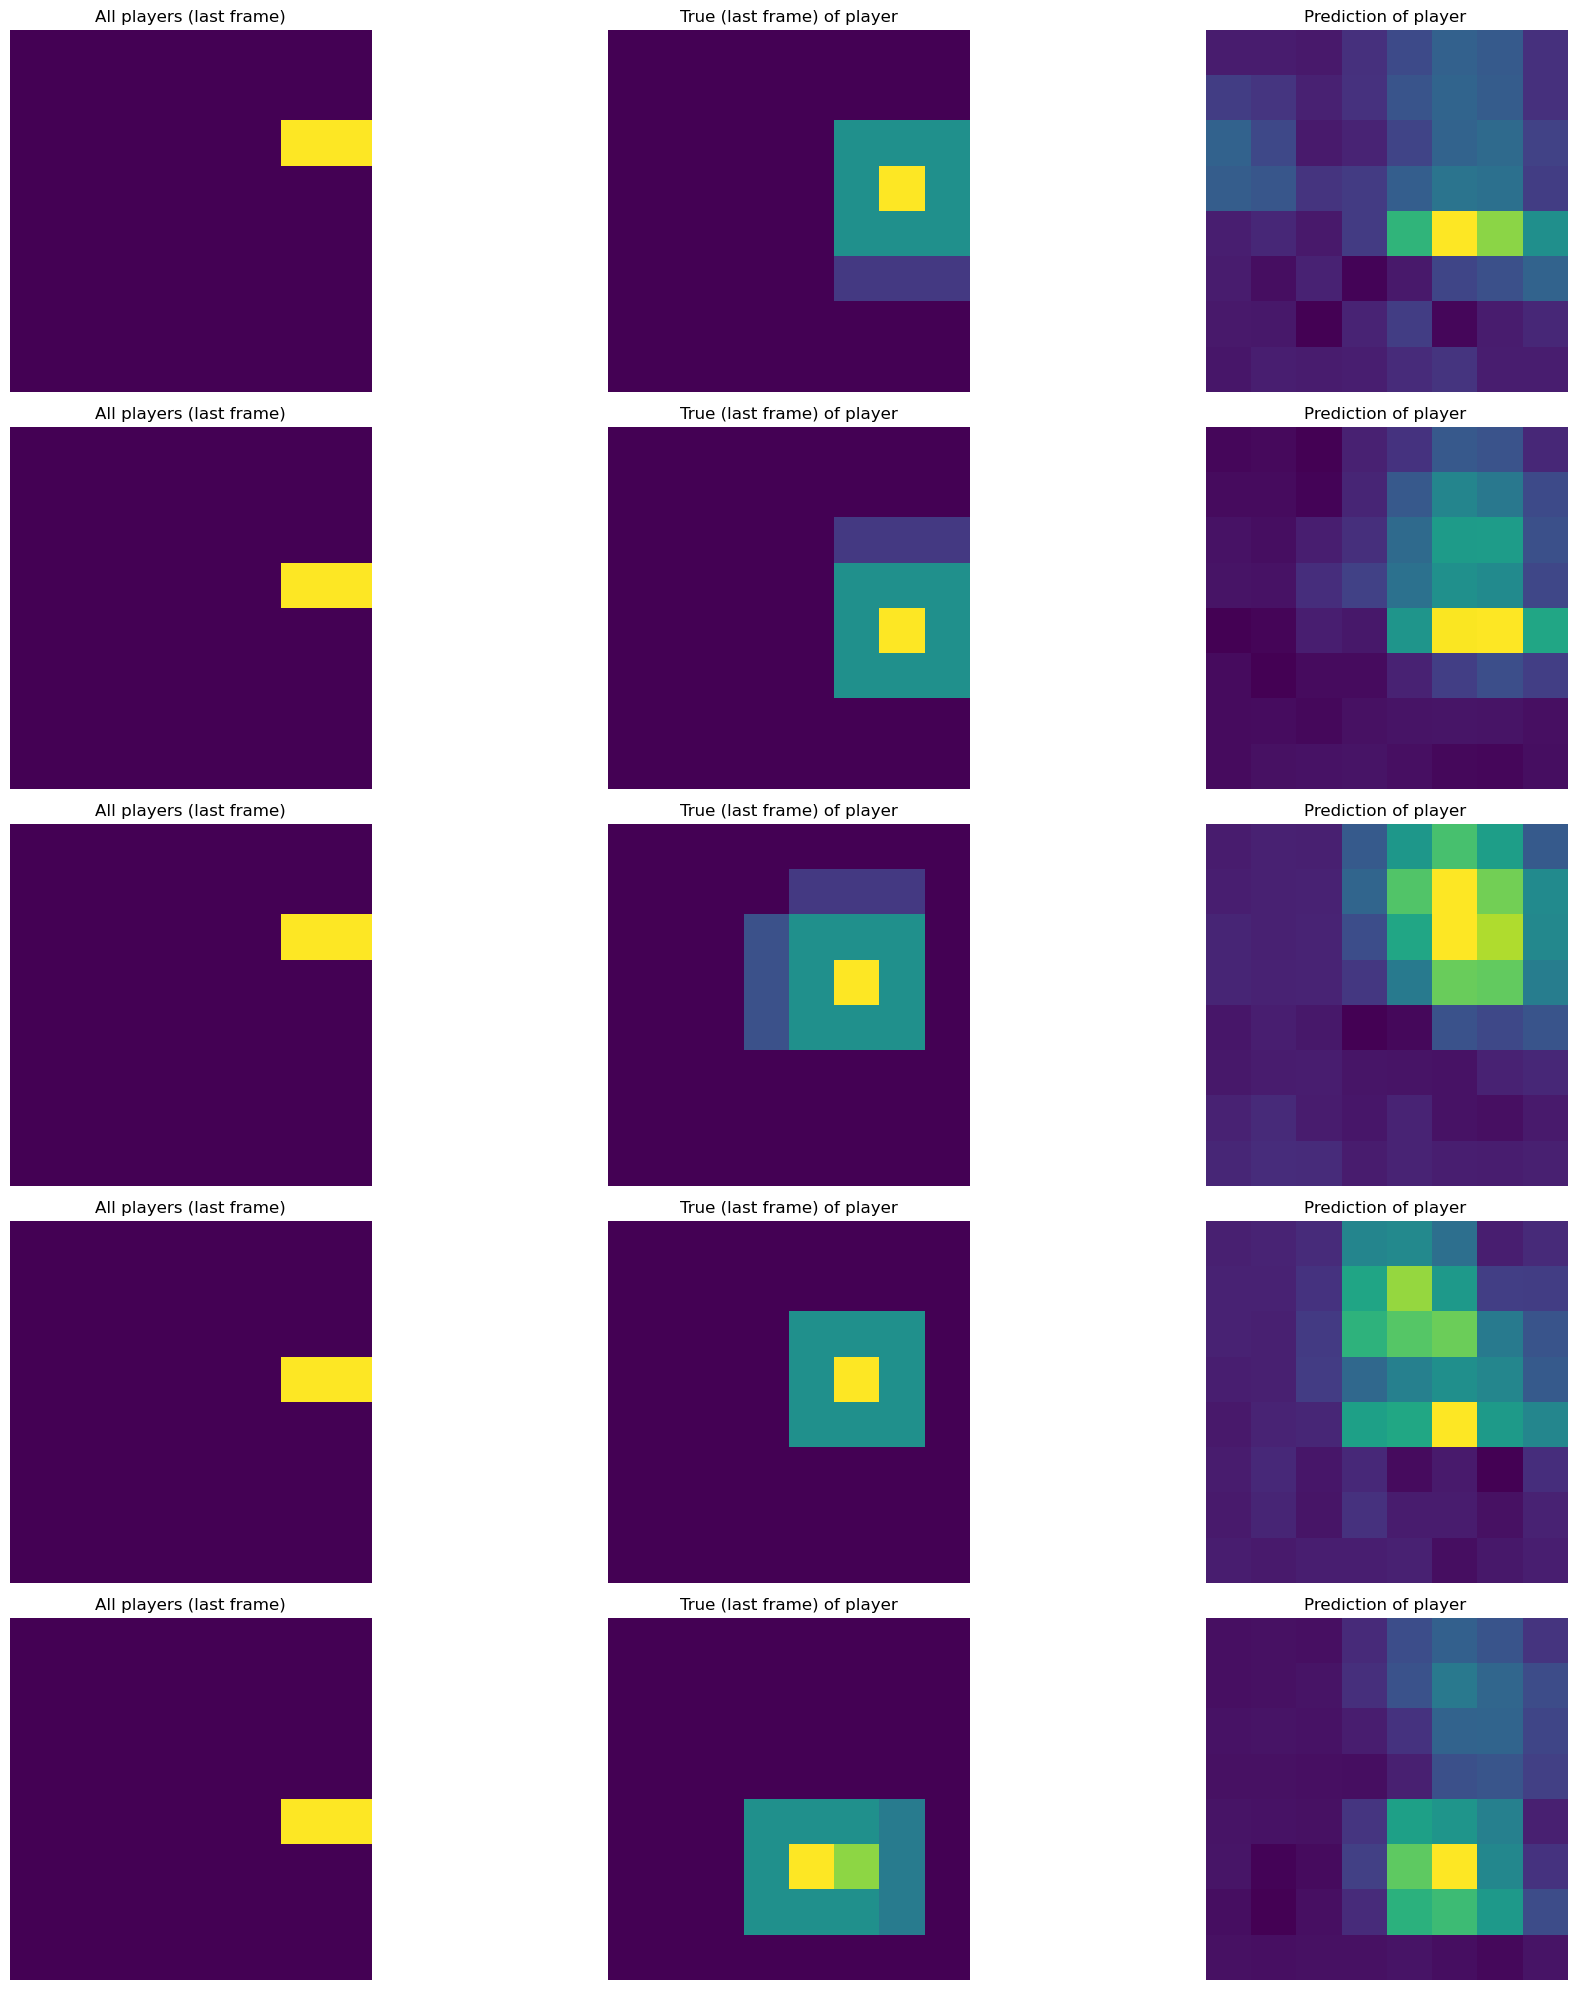

MODELO model2 - ESCENA Scene3
Epoch 1/50
34/34 [==============================] - 9s 215ms/step - loss: 0.0308 - mse: 0.0308 - mae: 0.0922 - val_loss: 0.0293 - val_mse: 0.0293 - val_mae: 0.0946
Epoch 2/50
34/34 [==============================] - 6s 171ms/step - loss: 0.0235 - mse: 0.0235 - mae: 0.0849 - val_loss: 0.0275 - val_mse: 0.0275 - val_mae: 0.0940
Epoch 3/50
34/34 [==============================] - 6s 173ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.0810 - val_loss: 0.0272 - val_mse: 0.0272 - val_mae: 0.0910
Epoch 4/50
34/34 [==============================] - 6s 173ms/step - loss: 0.0216 - mse: 0.0216 - mae: 0.0785 - val_loss: 0.0276 - val_mse: 0.0276 - val_mae: 0.0936
Epoch 5/50
34/34 [==============================] - 6s 174ms/step - loss: 0.0210 - mse: 0.0210 - mae: 0.0767 - val_loss: 0.0272 - val_mse: 0.0272 - val_mae: 0.0900
Epoch 6/50
34/34 [==============================] - 6s 173ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0759 - val_loss: 0.0274 - val_mse: 0.0274 - va

4/4 [==============================] - 1s 67ms/step


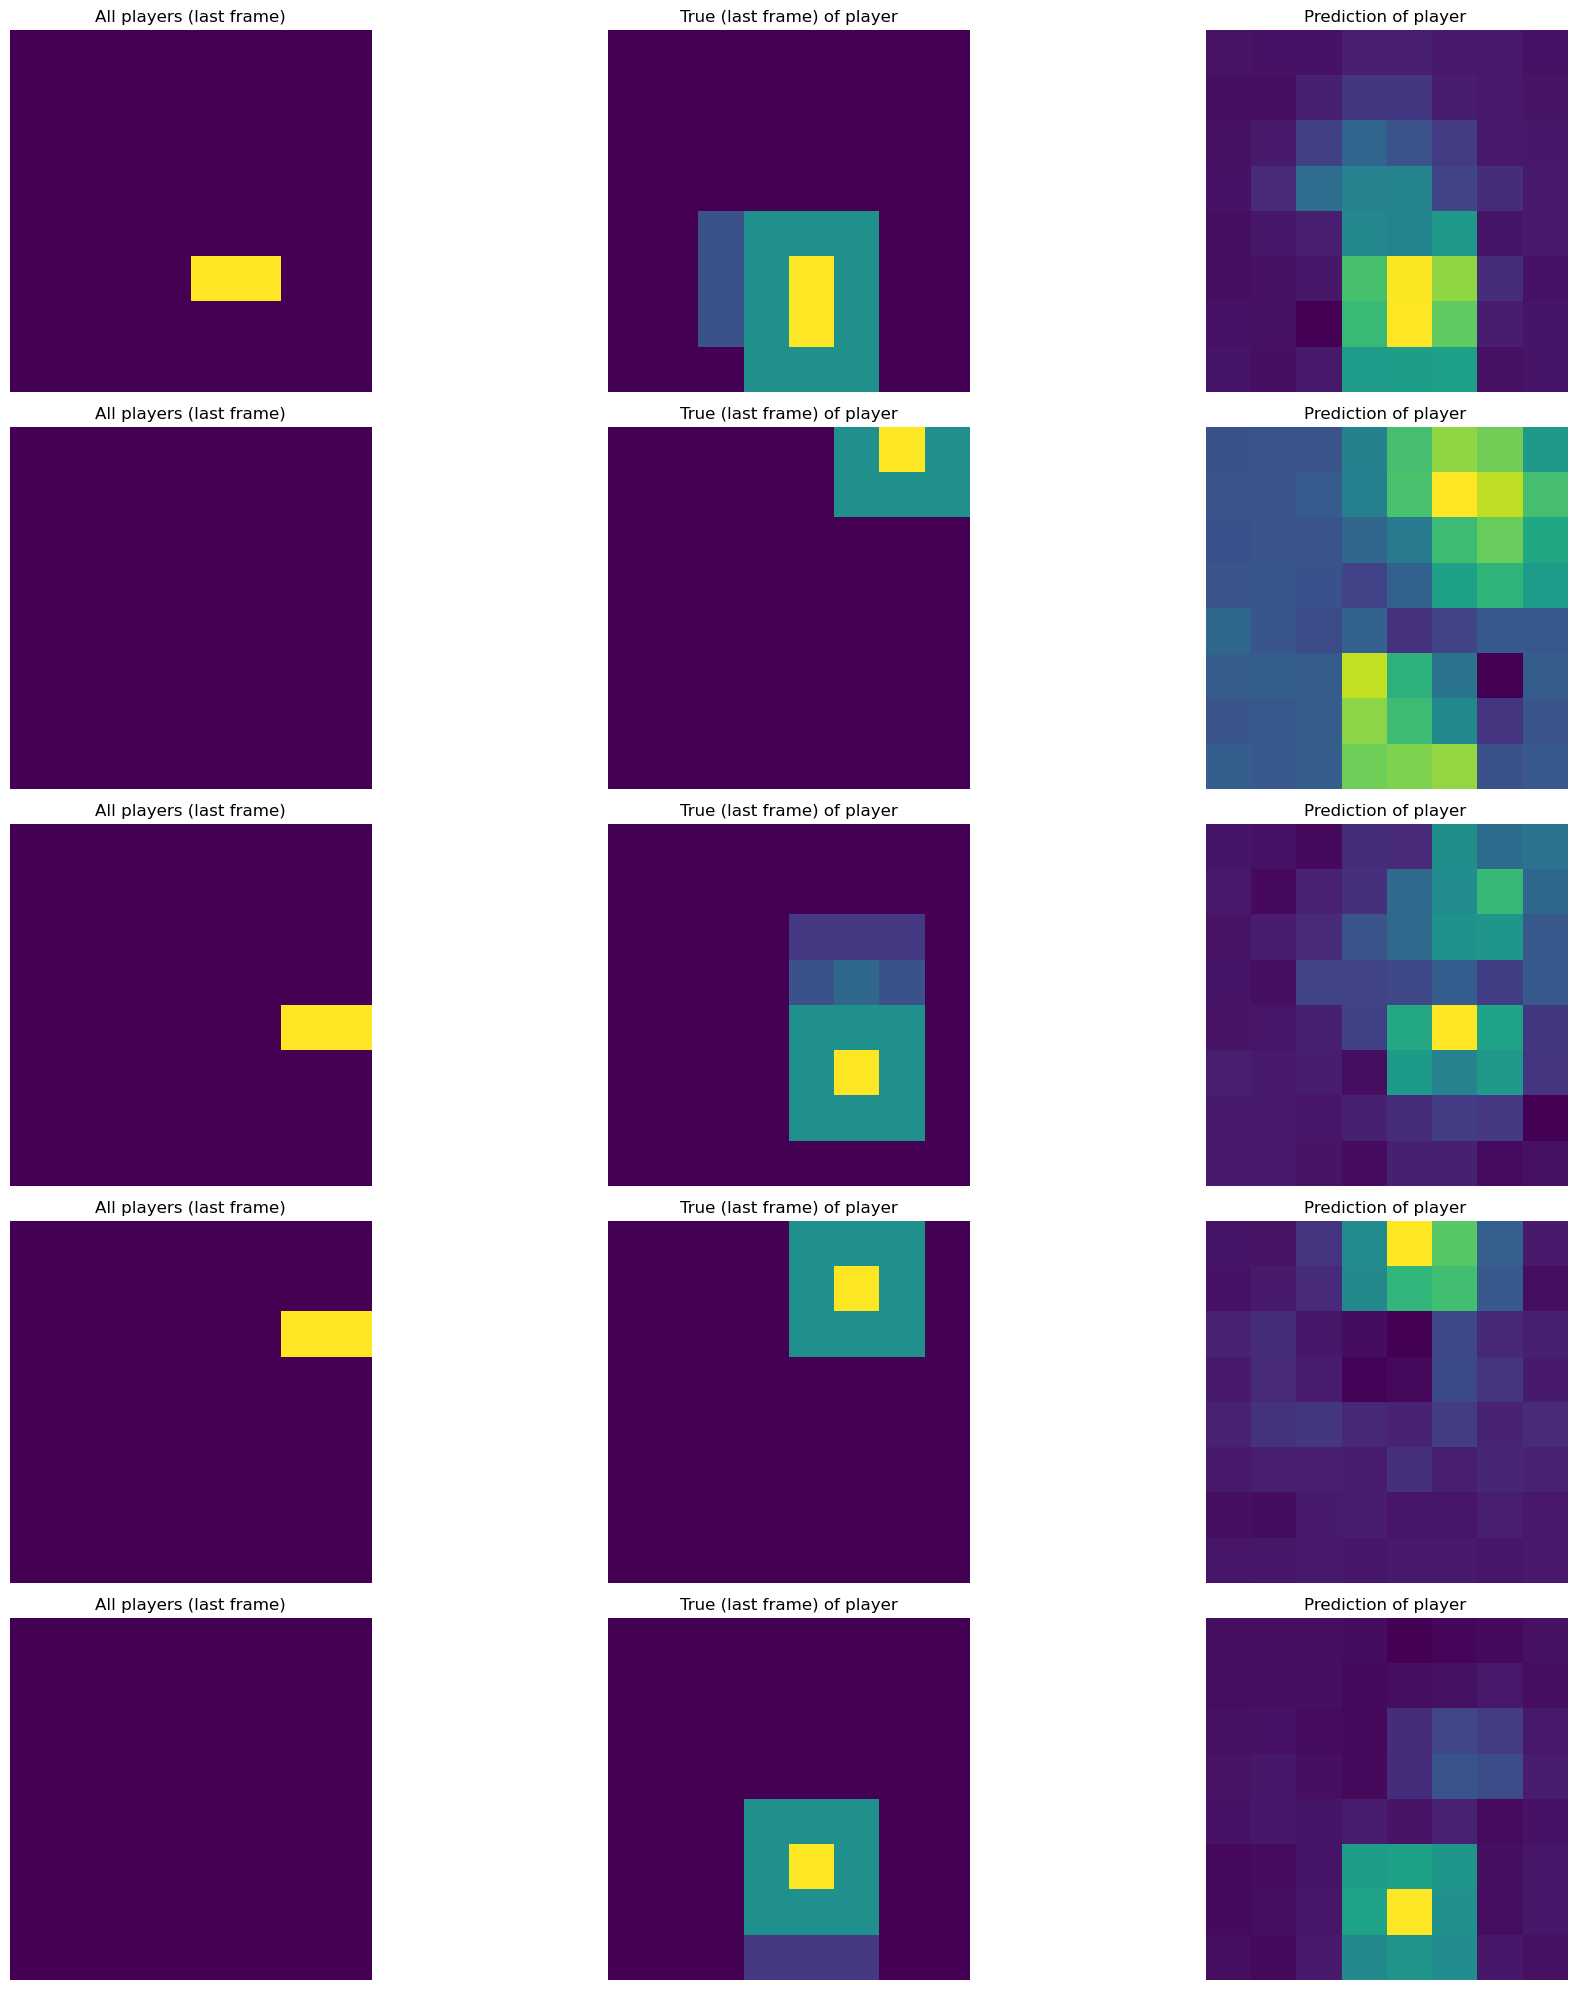

MODELO transf1 - ESCENA Scene3
Epoch 1/50
34/34 [==============================] - 53s 2s/step - loss: 0.0391 - mse: 0.0391 - mae: 0.1219 - val_loss: 0.0344 - val_mse: 0.0344 - val_mae: 0.1102
Epoch 2/50
34/34 [==============================] - 49s 1s/step - loss: 0.0297 - mse: 0.0297 - mae: 0.1040 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.1012
Epoch 3/50
34/34 [==============================] - 49s 1s/step - loss: 0.0250 - mse: 0.0250 - mae: 0.0924 - val_loss: 0.0291 - val_mse: 0.0291 - val_mae: 0.0992
Epoch 4/50
34/34 [==============================] - 49s 1s/step - loss: 0.0232 - mse: 0.0232 - mae: 0.0865 - val_loss: 0.0282 - val_mse: 0.0282 - val_mae: 0.1002
Epoch 5/50
34/34 [==============================] - 49s 1s/step - loss: 0.0222 - mse: 0.0222 - mae: 0.0835 - val_loss: 0.0271 - val_mse: 0.0271 - val_mae: 0.0945
Epoch 6/50
34/34 [==============================] - 49s 1s/step - loss: 0.0213 - mse: 0.0213 - mae: 0.0809 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.09

4/4 [==============================] - 4s 903ms/step


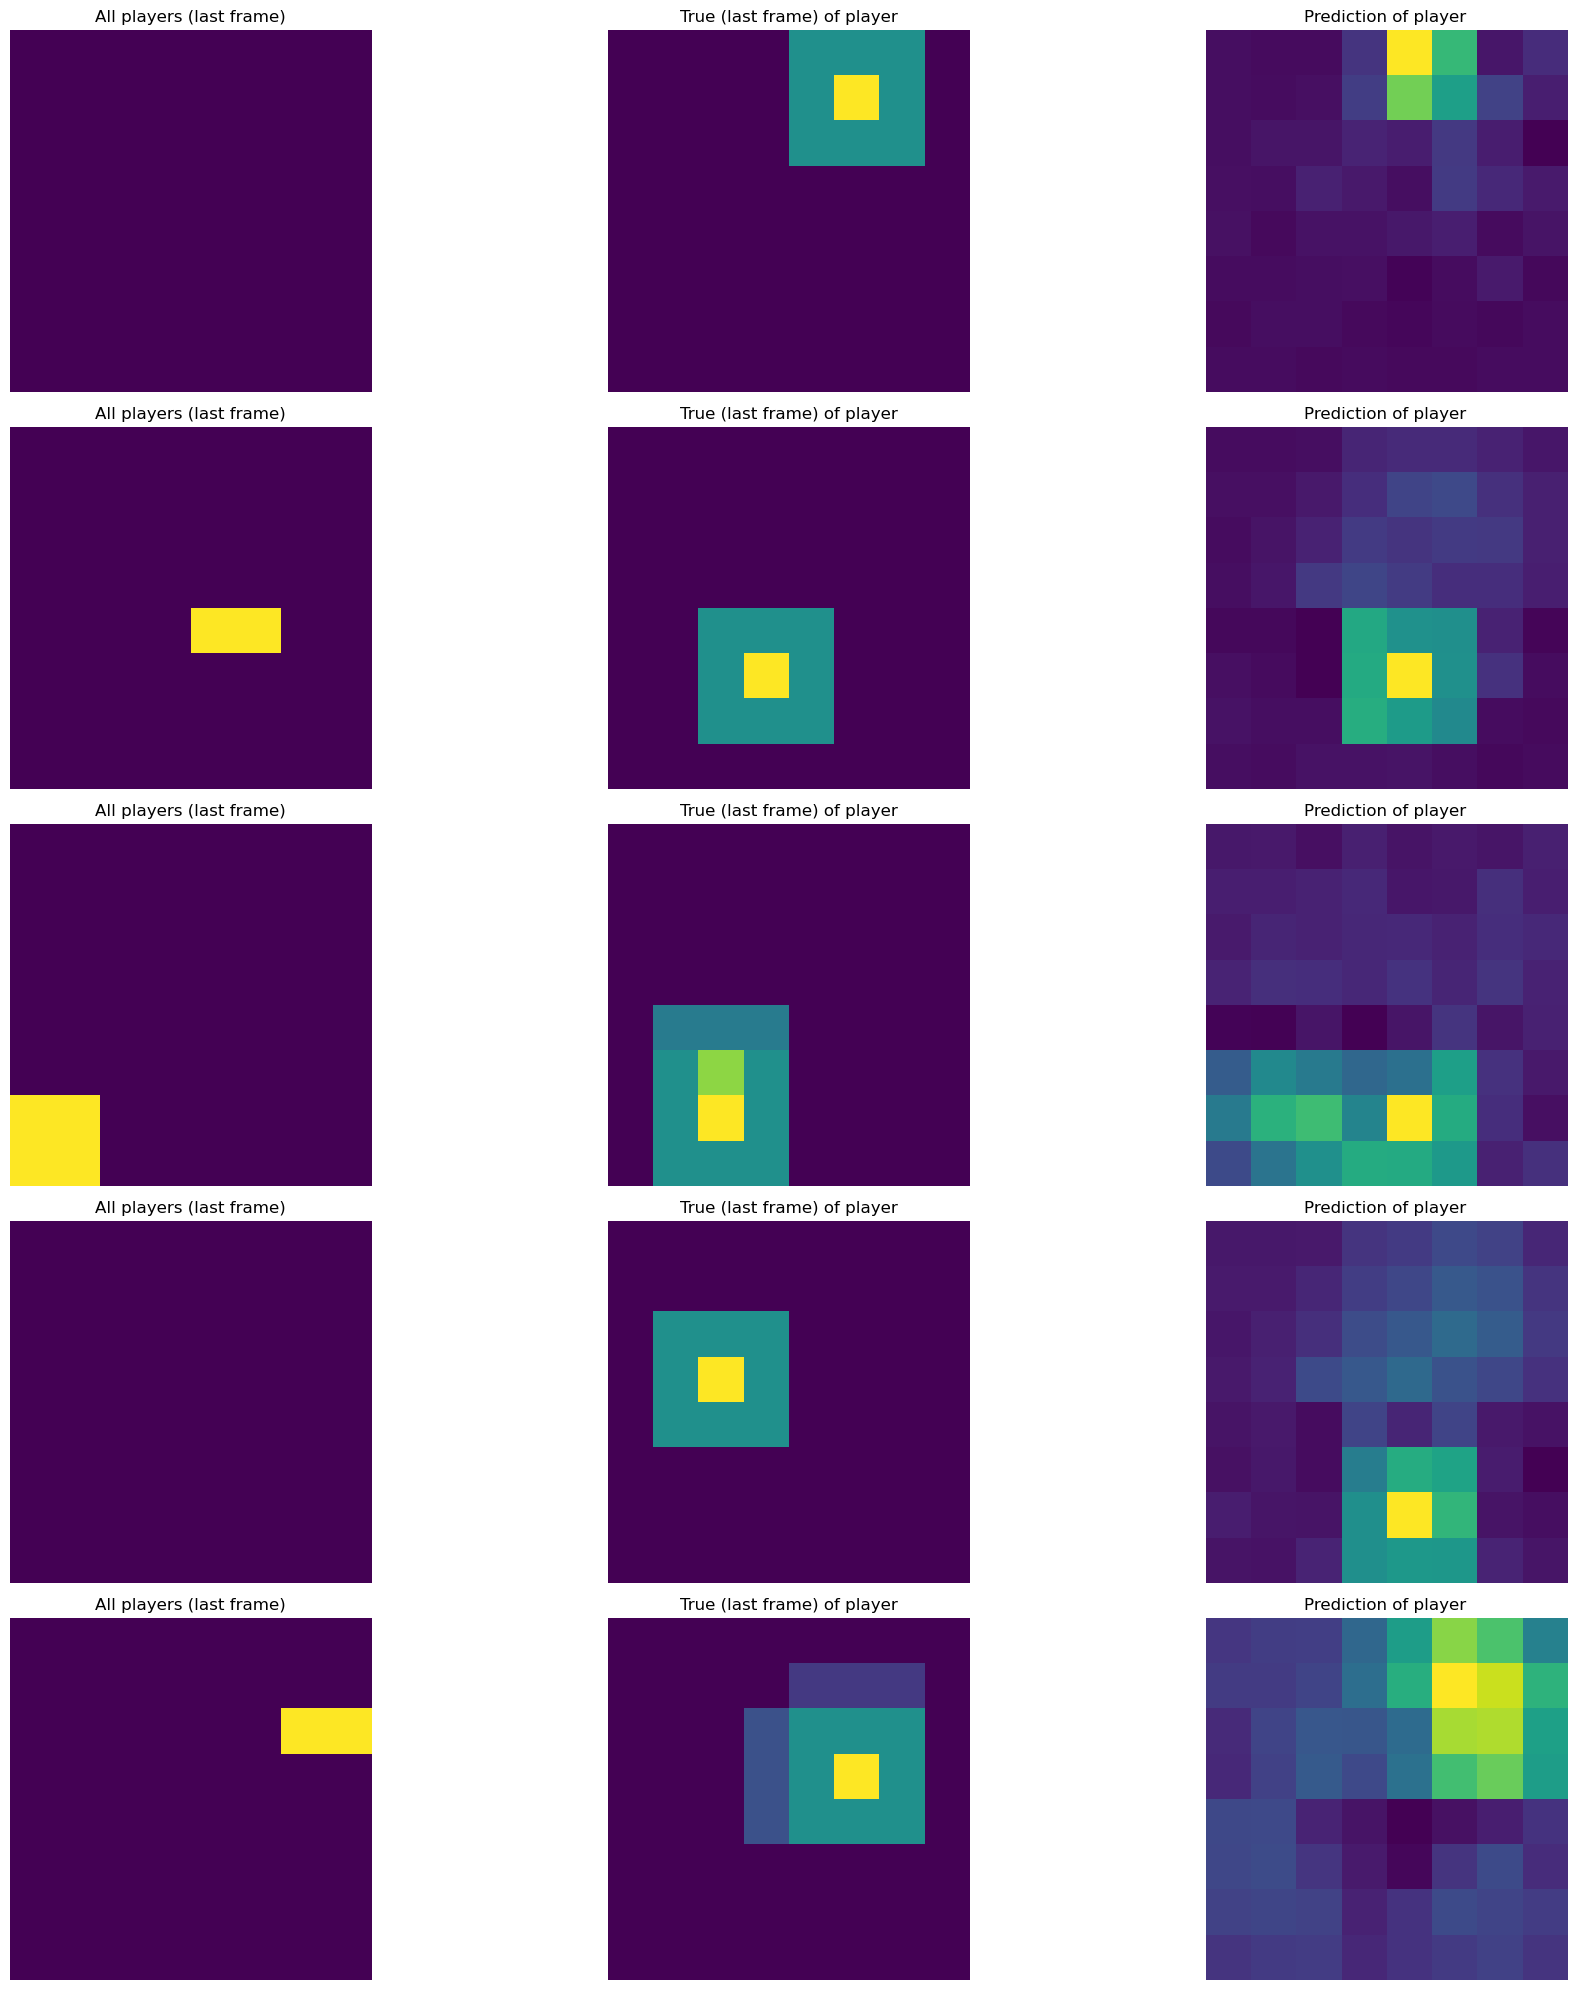

MODELO model0 - ESCENA Scene4
Epoch 1/50
35/35 [==============================] - 13s 236ms/step - loss: 0.0362 - mse: 0.0362 - mae: 0.1059 - val_loss: 0.0354 - val_mse: 0.0354 - val_mae: 0.1154
Epoch 2/50
35/35 [==============================] - 7s 198ms/step - loss: 0.0315 - mse: 0.0315 - mae: 0.1100 - val_loss: 0.0324 - val_mse: 0.0324 - val_mae: 0.1025
Epoch 3/50
35/35 [==============================] - 7s 197ms/step - loss: 0.0274 - mse: 0.0274 - mae: 0.0987 - val_loss: 0.0288 - val_mse: 0.0288 - val_mae: 0.0967
Epoch 4/50
35/35 [==============================] - 7s 196ms/step - loss: 0.0252 - mse: 0.0252 - mae: 0.0931 - val_loss: 0.0272 - val_mse: 0.0272 - val_mae: 0.0912
Epoch 5/50
35/35 [==============================] - 7s 197ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.0886 - val_loss: 0.0265 - val_mse: 0.0265 - val_mae: 0.0870
Epoch 6/50
35/35 [==============================] - 7s 196ms/step - loss: 0.0236 - mse: 0.0236 - mae: 0.0855 - val_loss: 0.0261 - val_mse: 0.0261 - v

4/4 [==============================] - 1s 79ms/step


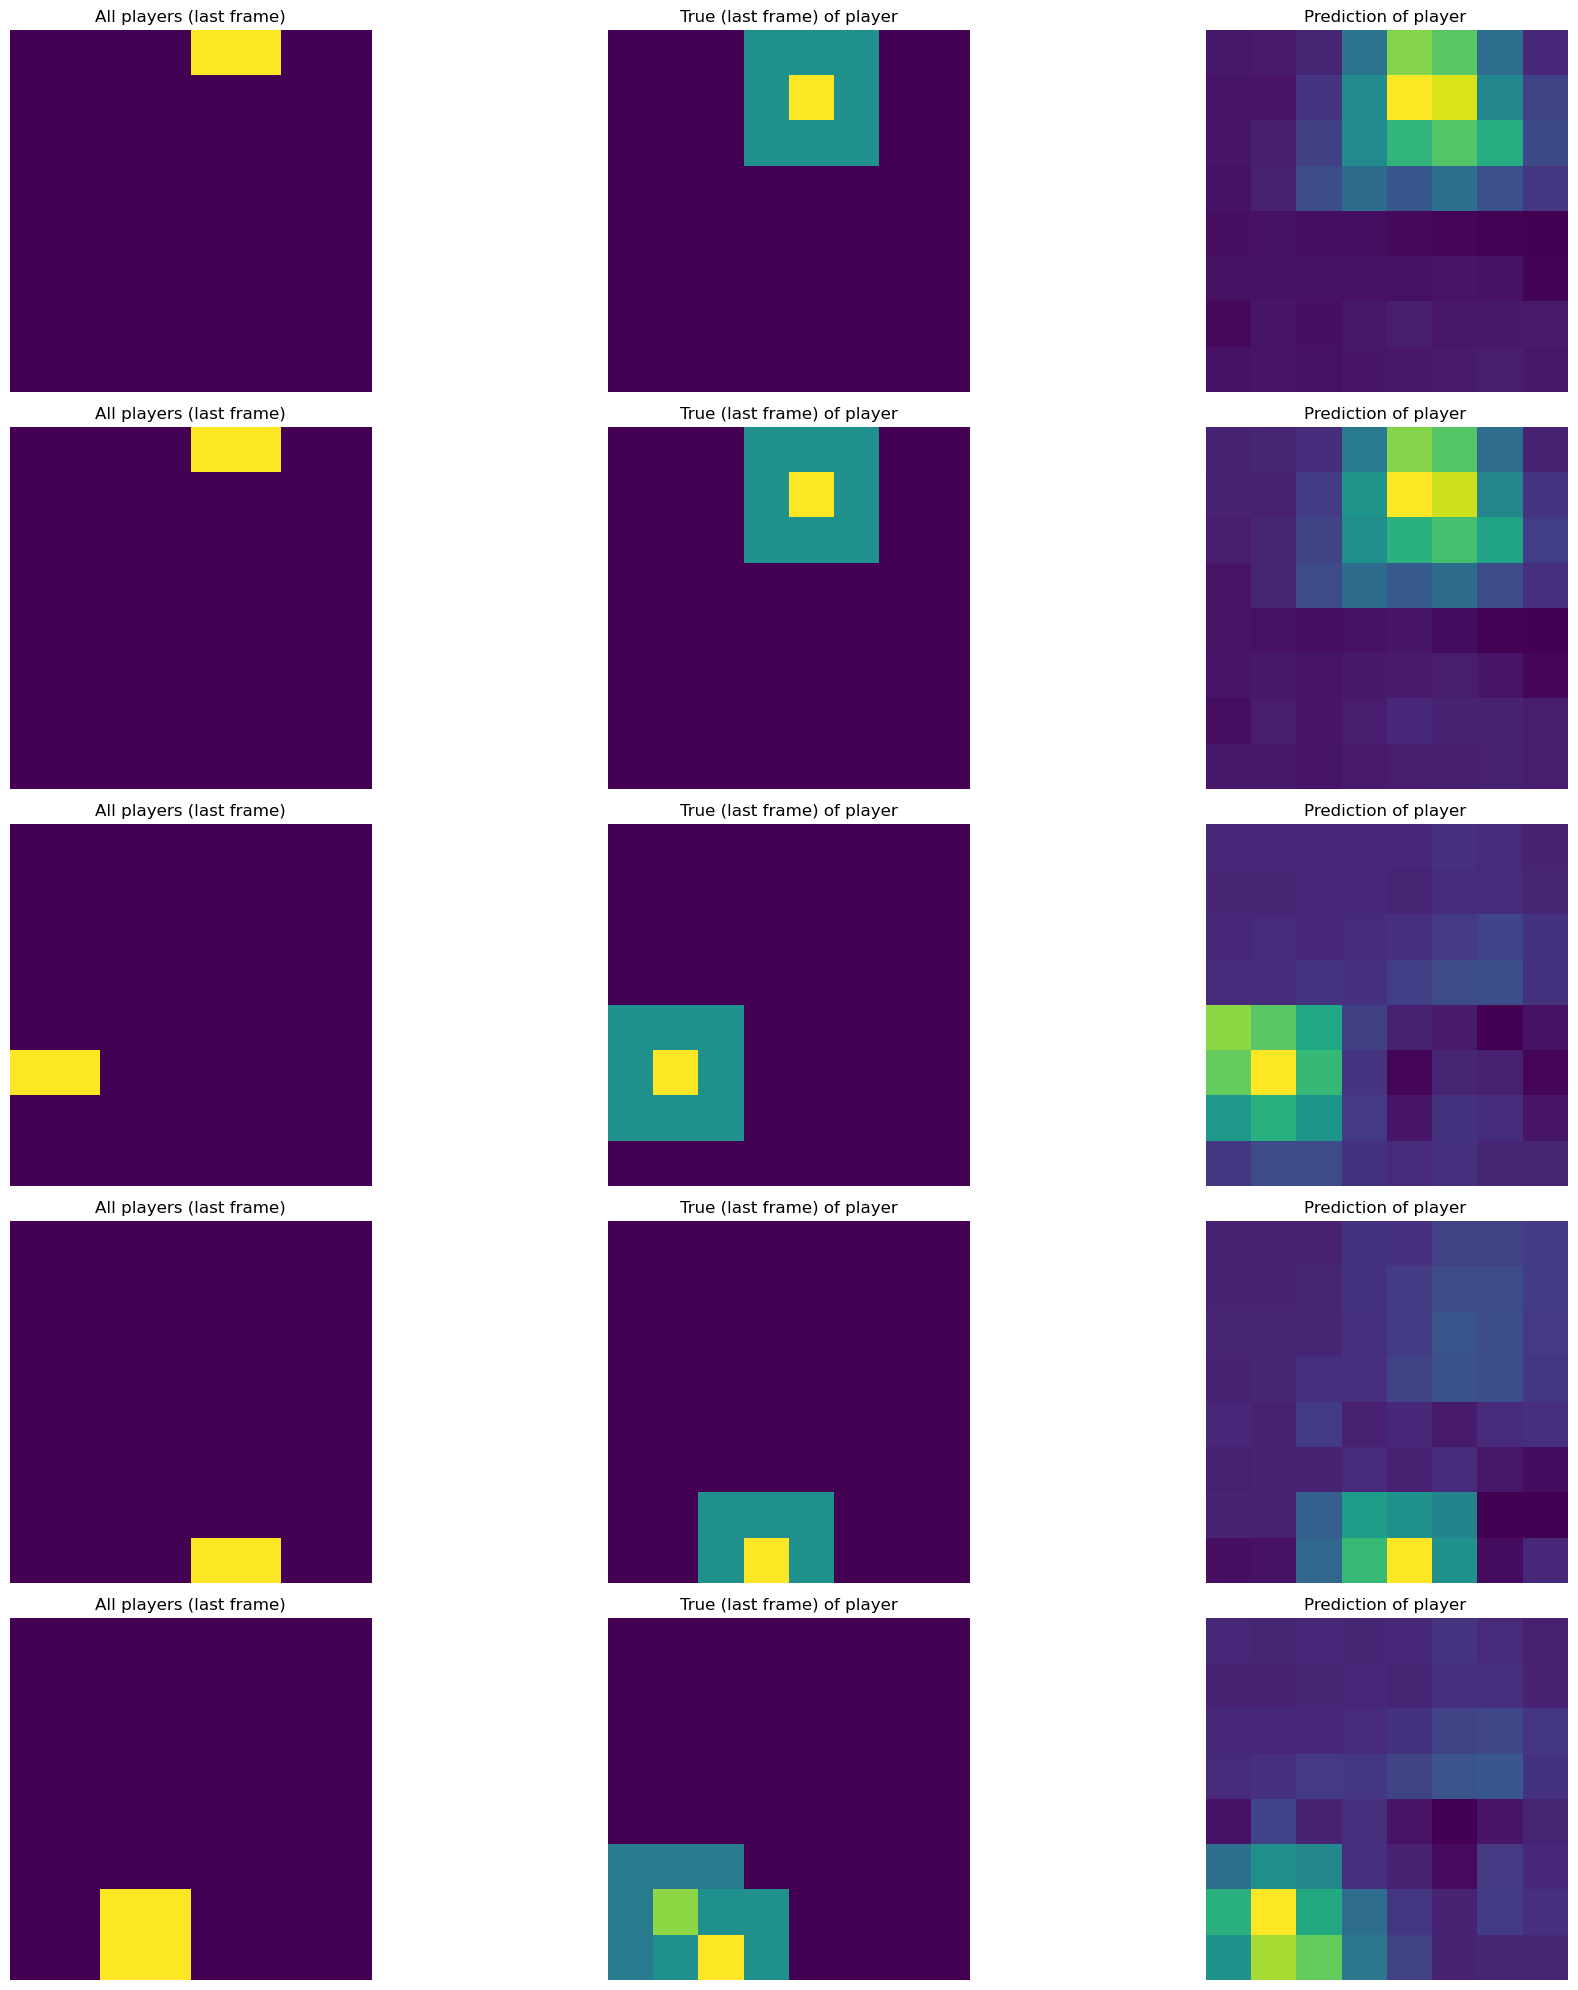

MODELO model1 - ESCENA Scene4
Epoch 1/50
35/35 [==============================] - 7s 142ms/step - loss: 0.0321 - mse: 0.0321 - mae: 0.0957 - val_loss: 0.0280 - val_mse: 0.0280 - val_mae: 0.0921
Epoch 2/50
35/35 [==============================] - 4s 119ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.0884 - val_loss: 0.0265 - val_mse: 0.0265 - val_mae: 0.0851
Epoch 3/50
35/35 [==============================] - 4s 120ms/step - loss: 0.0235 - mse: 0.0235 - mae: 0.0838 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.0829
Epoch 4/50
35/35 [==============================] - 4s 120ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.0815 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.0810
Epoch 5/50
35/35 [==============================] - 4s 120ms/step - loss: 0.0224 - mse: 0.0224 - mae: 0.0810 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.0808
Epoch 6/50
35/35 [==============================] - 4s 119ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.0798 - val_loss: 0.0252 - val_mse: 0.0252 - va

4/4 [==============================] - 1s 21ms/step


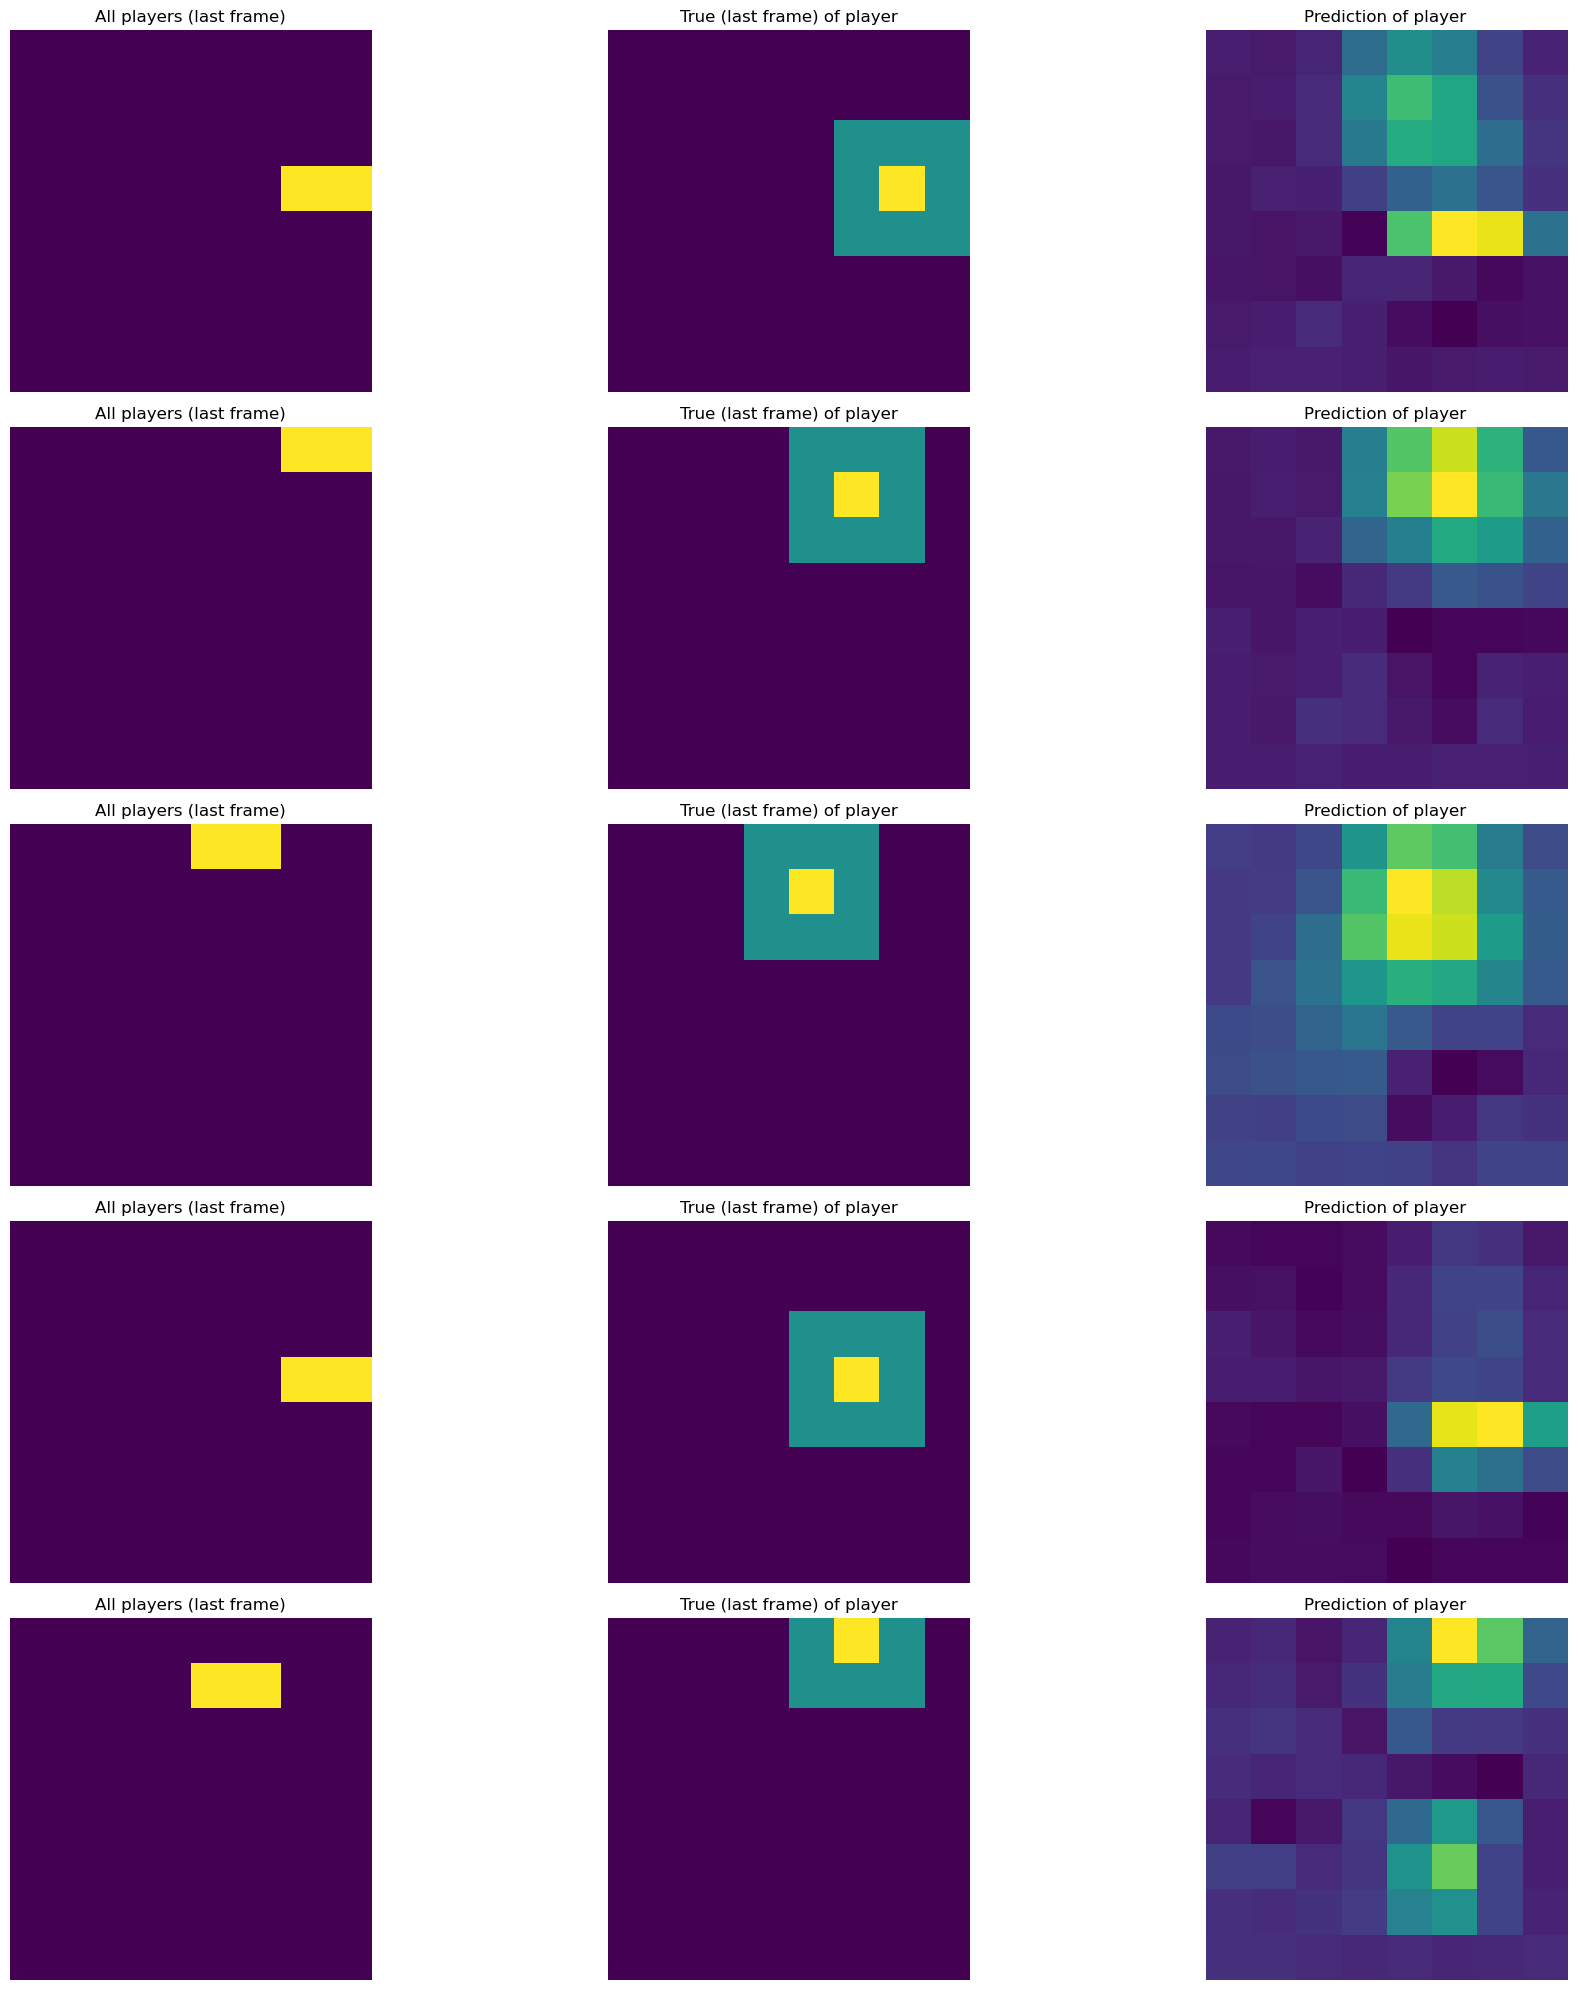

MODELO model2 - ESCENA Scene4
Epoch 1/50
35/35 [==============================] - 9s 199ms/step - loss: 0.0311 - mse: 0.0311 - mae: 0.0928 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.0905
Epoch 2/50
35/35 [==============================] - 6s 176ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.0862 - val_loss: 0.0260 - val_mse: 0.0260 - val_mae: 0.0862
Epoch 3/50
35/35 [==============================] - 6s 176ms/step - loss: 0.0228 - mse: 0.0228 - mae: 0.0830 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.0844
Epoch 4/50
35/35 [==============================] - 6s 176ms/step - loss: 0.0224 - mse: 0.0224 - mae: 0.0817 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.0811
Epoch 5/50
35/35 [==============================] - 6s 176ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0786 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.0803
Epoch 6/50
35/35 [==============================] - 6s 176ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0796 - val_loss: 0.0244 - val_mse: 0.0244 - va

4/4 [==============================] - 1s 72ms/step


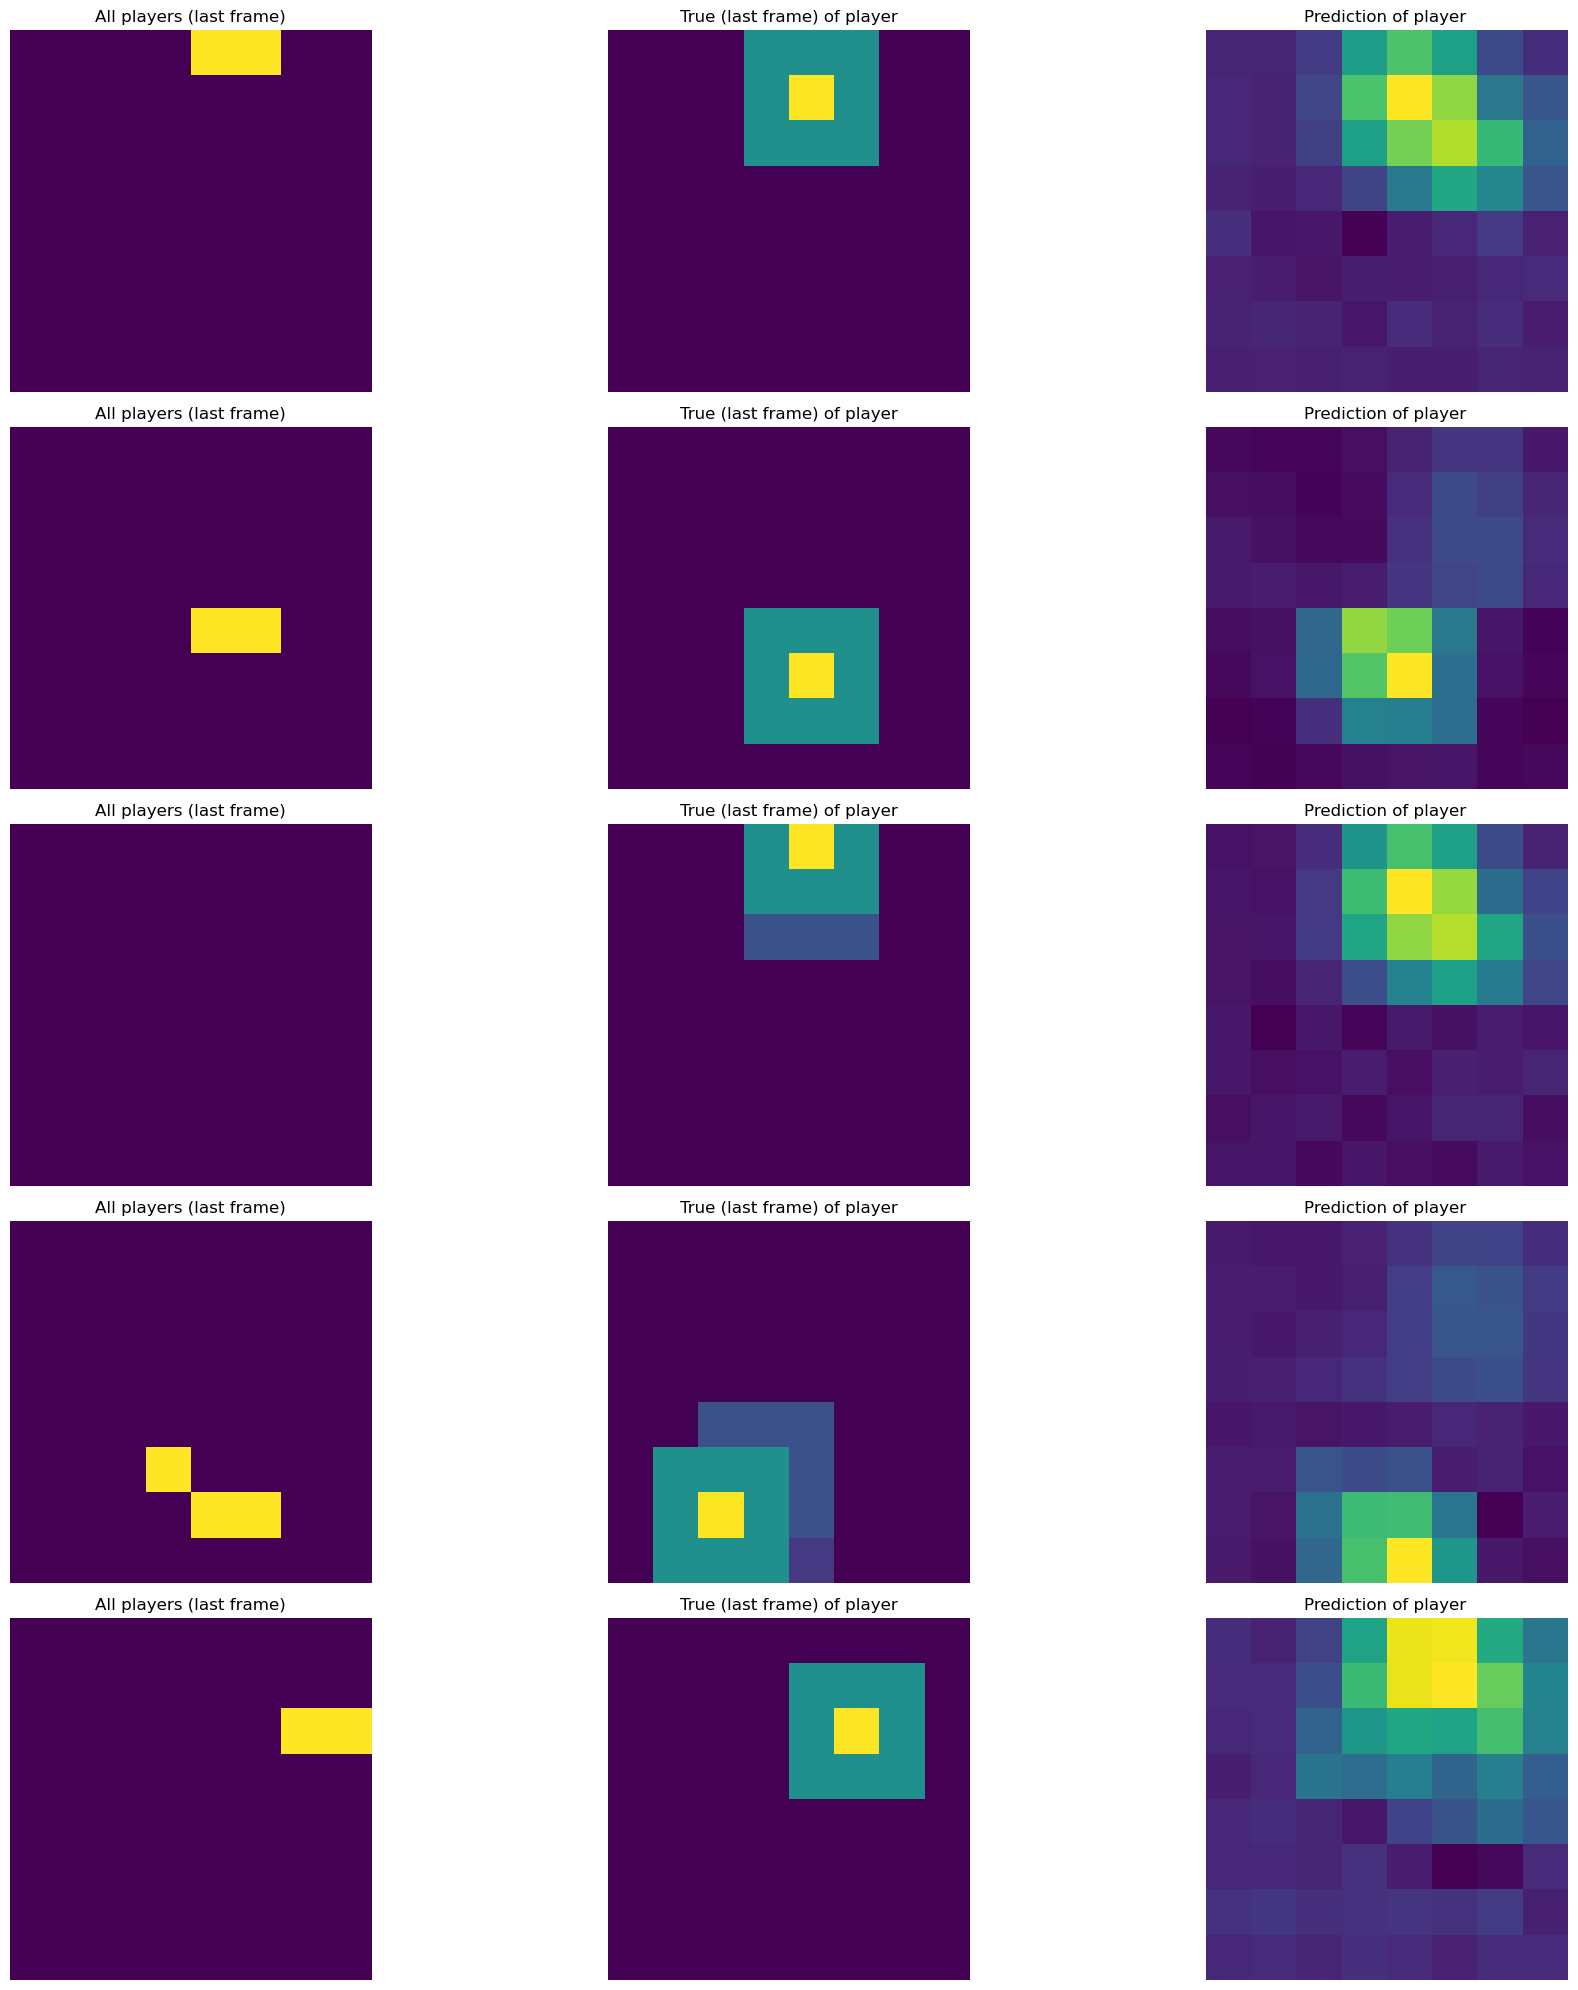

MODELO transf1 - ESCENA Scene4
Epoch 1/50
35/35 [==============================] - 62s 2s/step - loss: 0.0390 - mse: 0.0390 - mae: 0.1225 - val_loss: 0.0349 - val_mse: 0.0349 - val_mae: 0.1123
Epoch 2/50
35/35 [==============================] - 60s 2s/step - loss: 0.0291 - mse: 0.0291 - mae: 0.1029 - val_loss: 0.0289 - val_mse: 0.0289 - val_mae: 0.0958
Epoch 3/50
35/35 [==============================] - 60s 2s/step - loss: 0.0255 - mse: 0.0255 - mae: 0.0924 - val_loss: 0.0270 - val_mse: 0.0270 - val_mae: 0.0951
Epoch 4/50
35/35 [==============================] - 60s 2s/step - loss: 0.0235 - mse: 0.0235 - mae: 0.0873 - val_loss: 0.0276 - val_mse: 0.0276 - val_mae: 0.0836
Epoch 5/50
35/35 [==============================] - 60s 2s/step - loss: 0.0227 - mse: 0.0227 - mae: 0.0841 - val_loss: 0.0264 - val_mse: 0.0264 - val_mae: 0.0812
Epoch 6/50
35/35 [==============================] - 60s 2s/step - loss: 0.0220 - mse: 0.0220 - mae: 0.0818 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.08

4/4 [==============================] - 4s 934ms/step


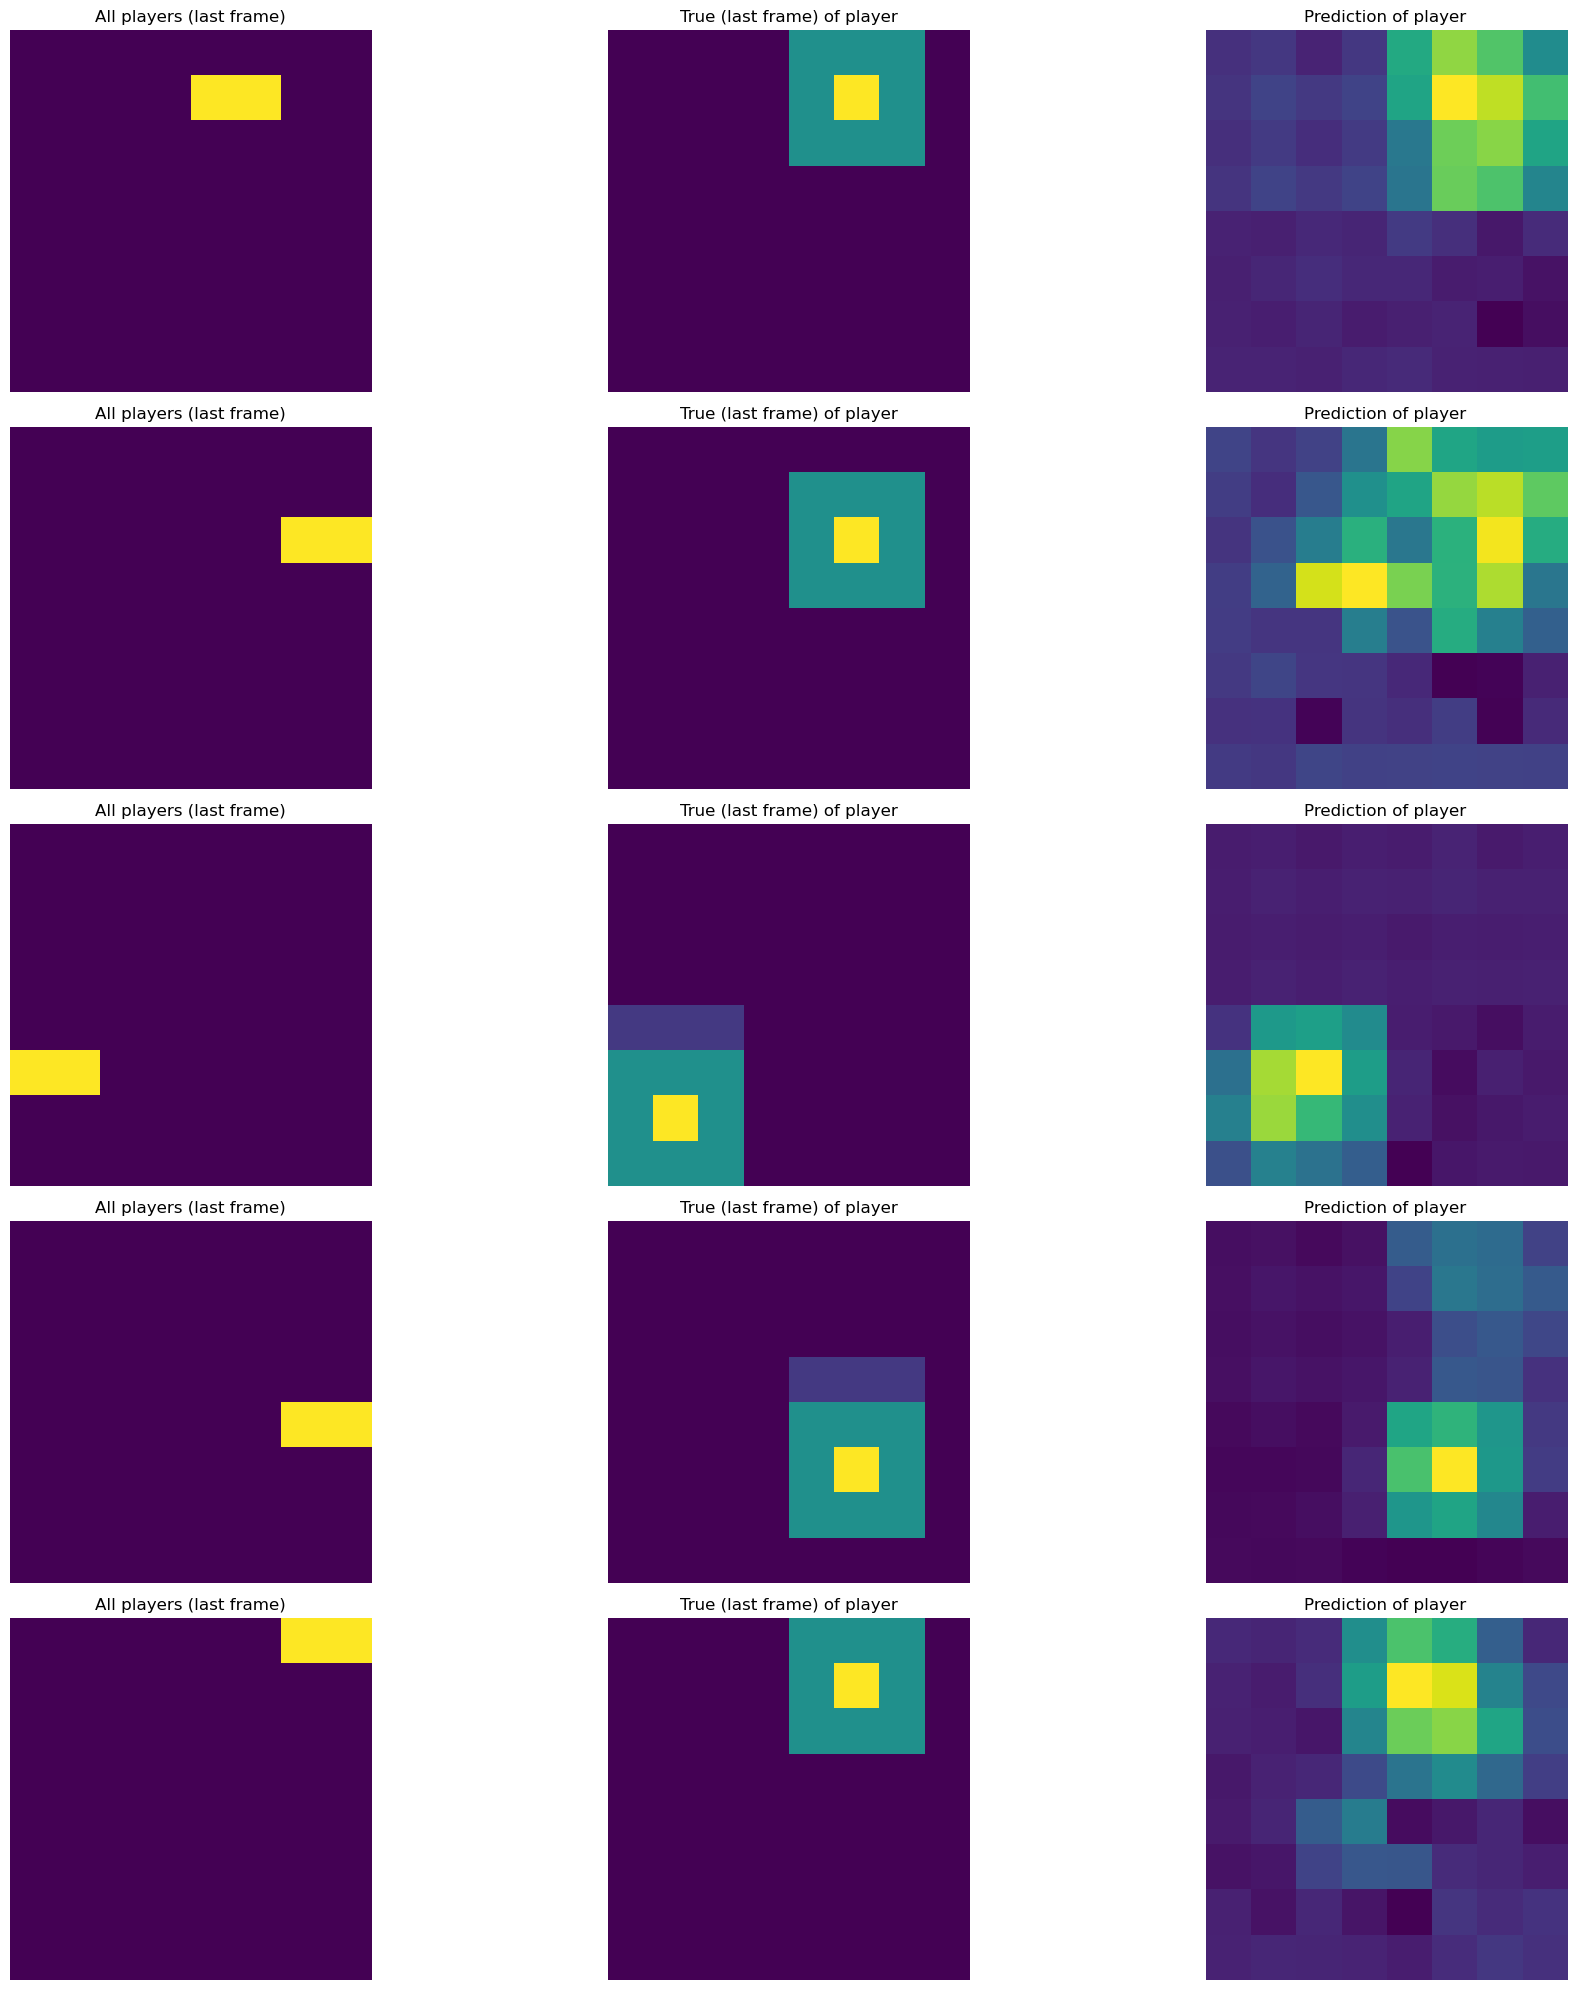

MODELO model0 - ESCENA Scene5
Epoch 1/50
35/35 [==============================] - 12s 191ms/step - loss: 0.0358 - mse: 0.0358 - mae: 0.1067 - val_loss: 0.0360 - val_mse: 0.0360 - val_mae: 0.1190
Epoch 2/50
35/35 [==============================] - 6s 171ms/step - loss: 0.0312 - mse: 0.0312 - mae: 0.1108 - val_loss: 0.0285 - val_mse: 0.0285 - val_mae: 0.0966
Epoch 3/50
35/35 [==============================] - 6s 171ms/step - loss: 0.0273 - mse: 0.0273 - mae: 0.0966 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.0941
Epoch 4/50
35/35 [==============================] - 6s 170ms/step - loss: 0.0252 - mse: 0.0252 - mae: 0.0918 - val_loss: 0.0263 - val_mse: 0.0263 - val_mae: 0.0892
Epoch 5/50
35/35 [==============================] - 6s 170ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.0883 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.0849
Epoch 6/50
35/35 [==============================] - 6s 170ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.0856 - val_loss: 0.0251 - val_mse: 0.0251 - v

4/4 [==============================] - 1s 61ms/step


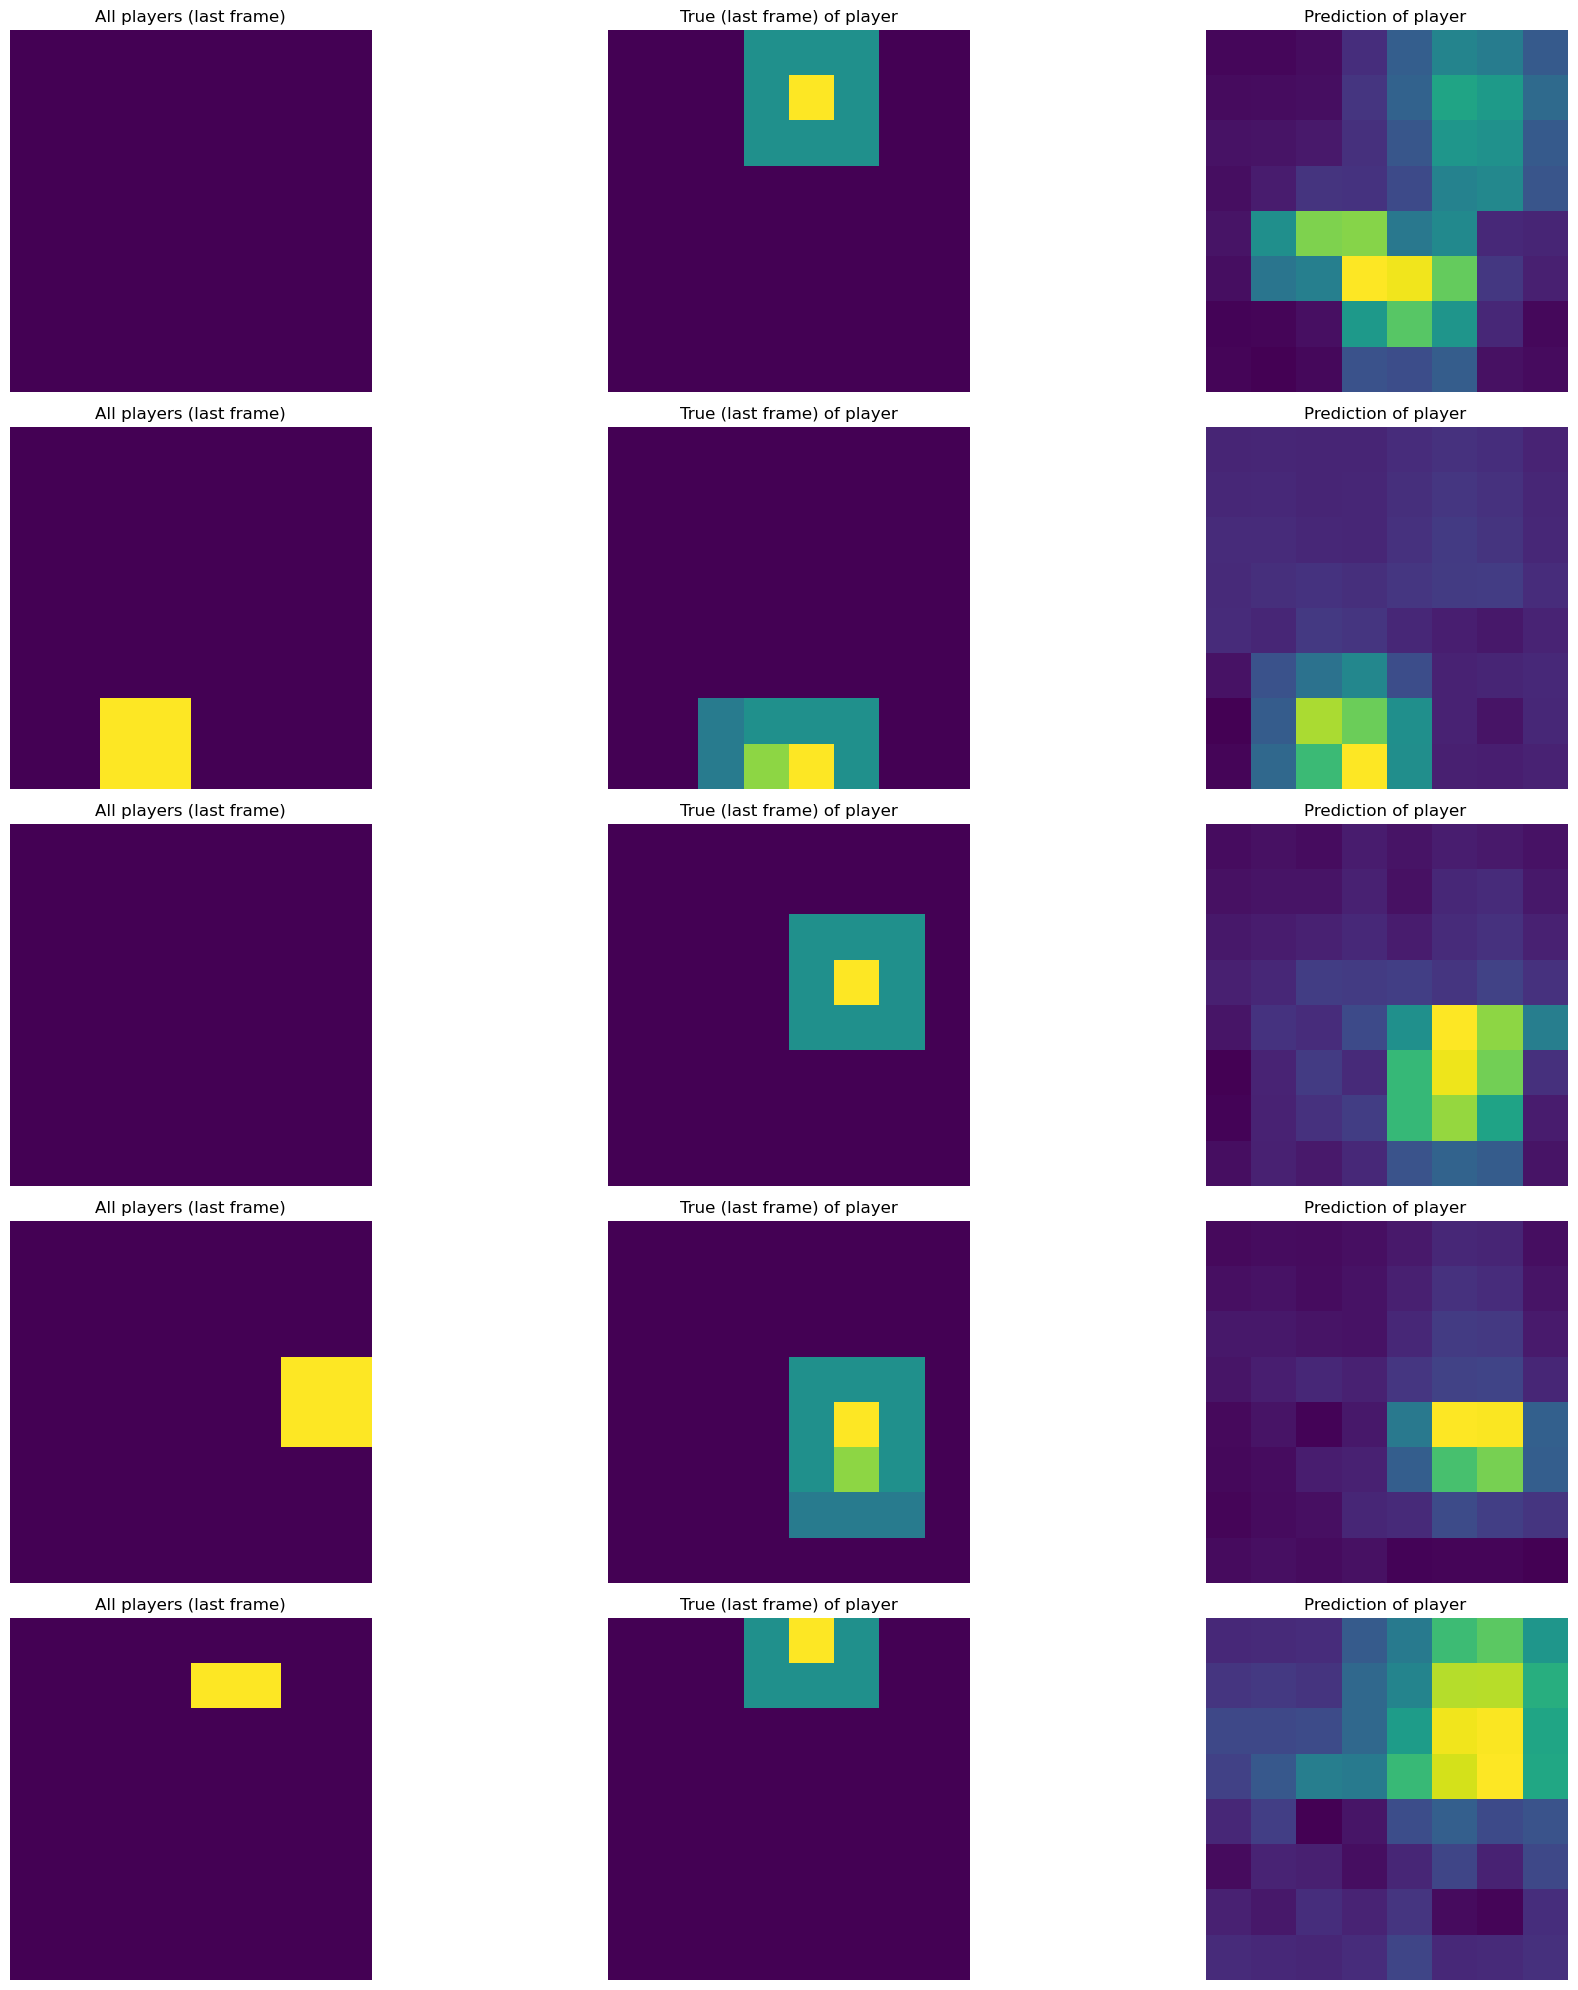

MODELO model1 - ESCENA Scene5
Epoch 1/50
35/35 [==============================] - 6s 130ms/step - loss: 0.0320 - mse: 0.0320 - mae: 0.0967 - val_loss: 0.0266 - val_mse: 0.0266 - val_mae: 0.0946
Epoch 2/50
35/35 [==============================] - 4s 112ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.0880 - val_loss: 0.0268 - val_mse: 0.0268 - val_mae: 0.0857
Epoch 3/50
35/35 [==============================] - 4s 112ms/step - loss: 0.0233 - mse: 0.0233 - mae: 0.0826 - val_loss: 0.0260 - val_mse: 0.0260 - val_mae: 0.0849
Epoch 4/50
35/35 [==============================] - 4s 112ms/step - loss: 0.0226 - mse: 0.0226 - mae: 0.0821 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.0840
Epoch 5/50
35/35 [==============================] - 4s 112ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.0804 - val_loss: 0.0260 - val_mse: 0.0260 - val_mae: 0.0843
Epoch 6/50
35/35 [==============================] - 4s 112ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0790 - val_loss: 0.0254 - val_mse: 0.0254 - va

4/4 [==============================] - 1s 24ms/step


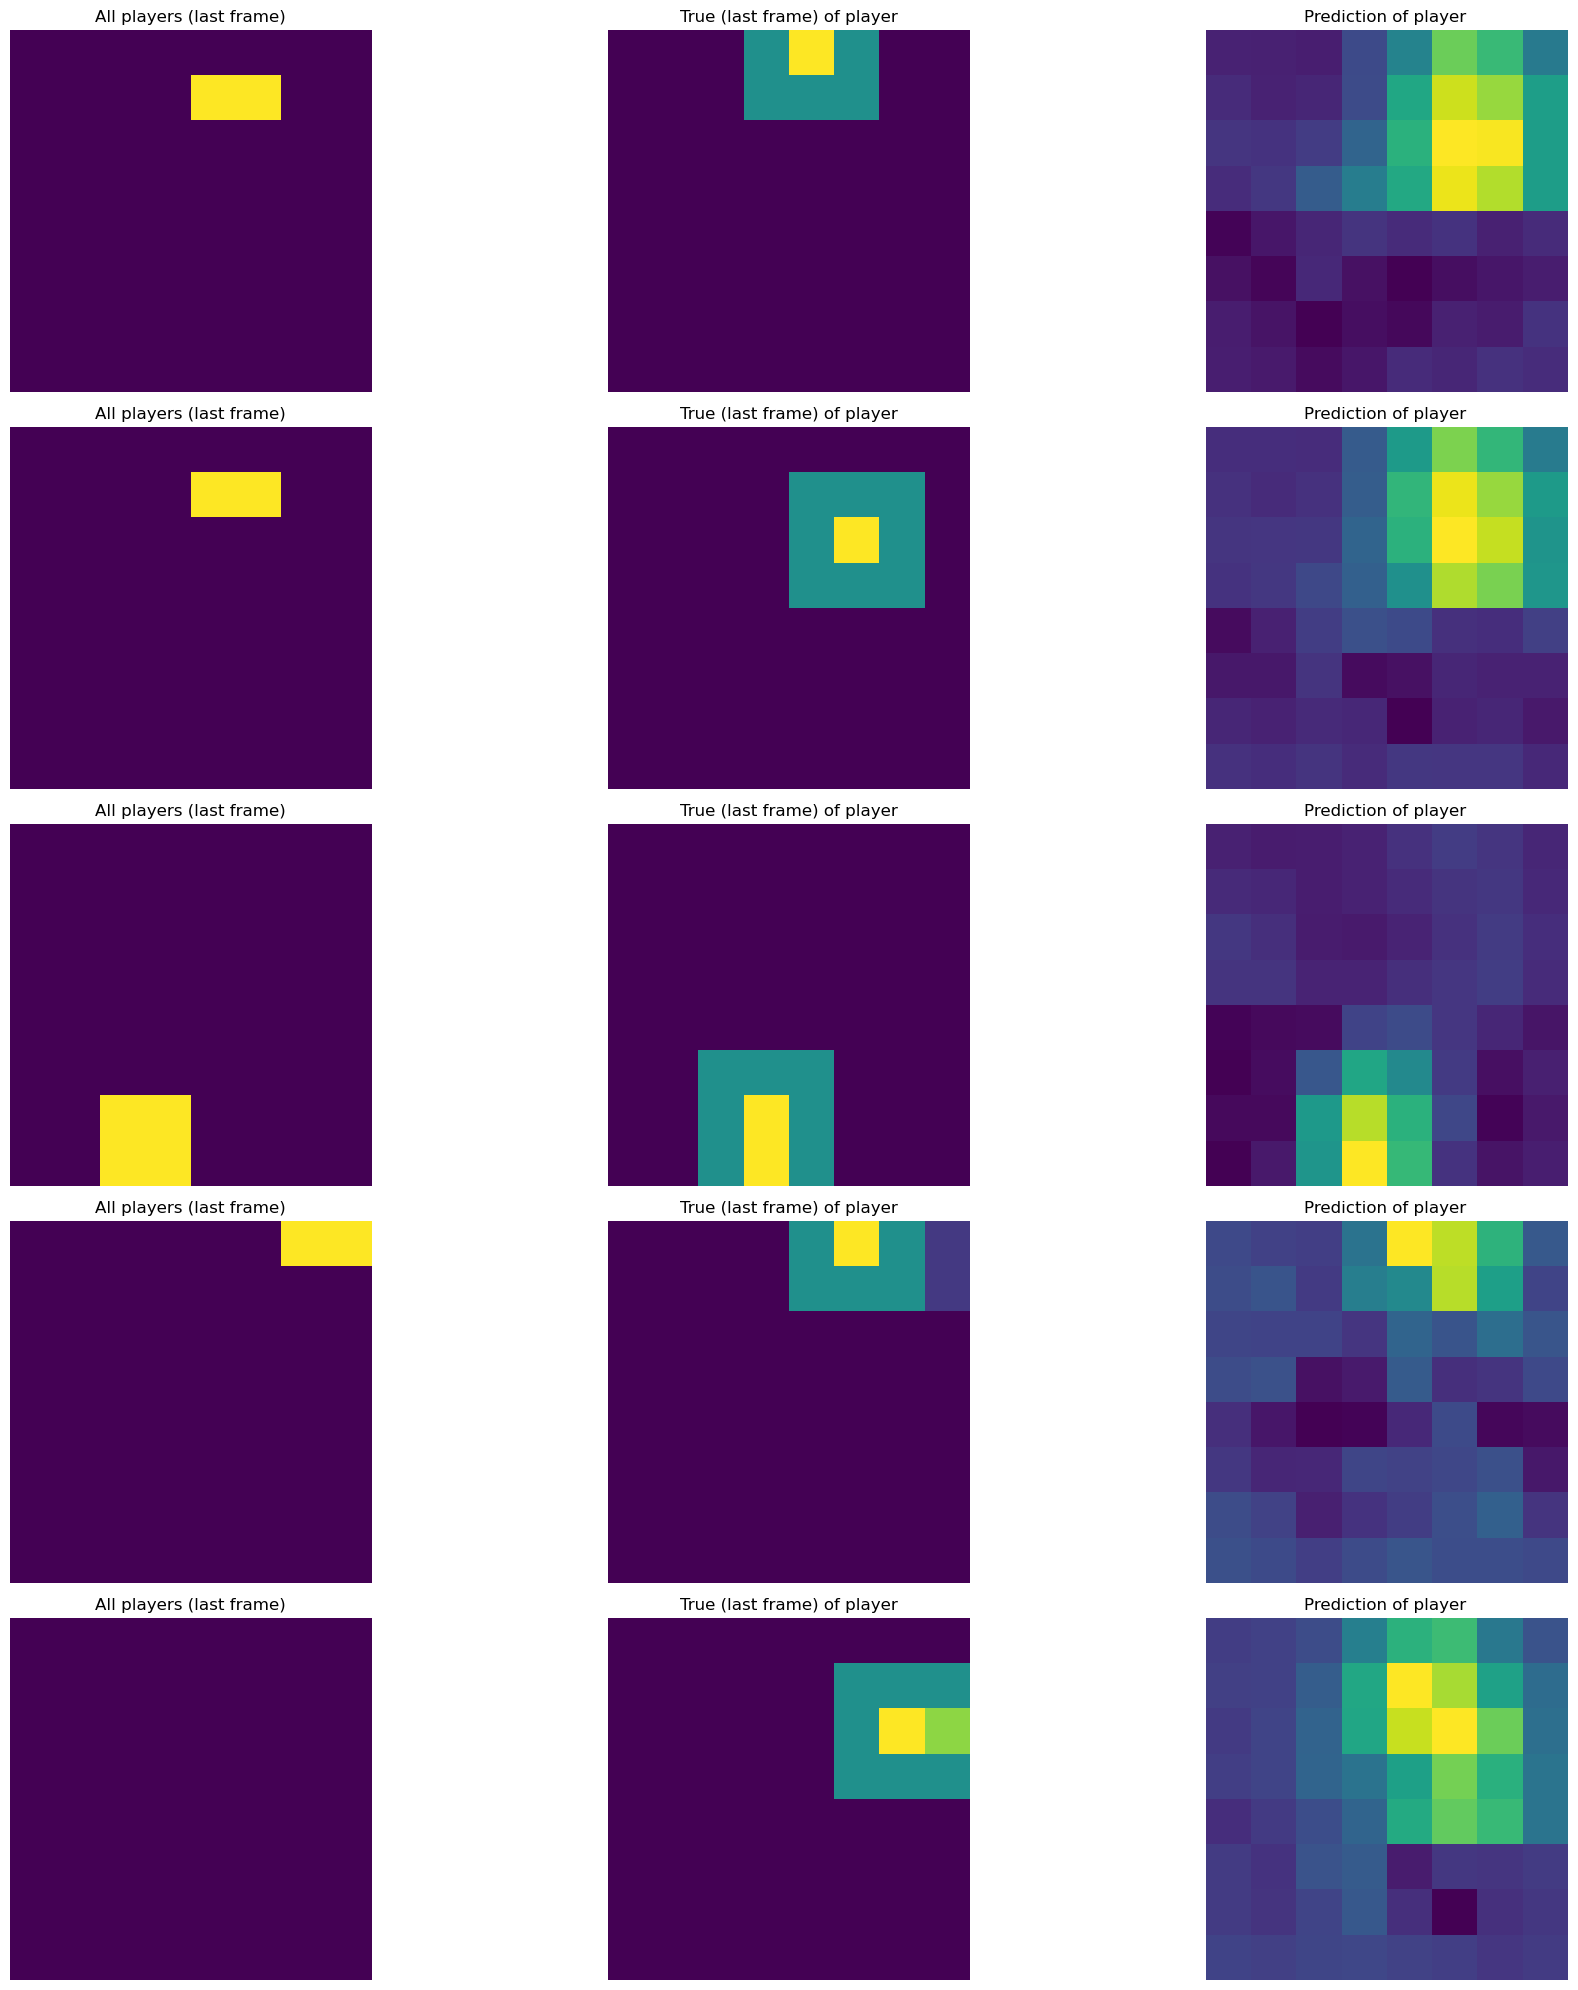

MODELO model2 - ESCENA Scene5
Epoch 1/50
35/35 [==============================] - 9s 218ms/step - loss: 0.0312 - mse: 0.0312 - mae: 0.0933 - val_loss: 0.0273 - val_mse: 0.0273 - val_mae: 0.0921
Epoch 2/50
35/35 [==============================] - 7s 200ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.0866 - val_loss: 0.0258 - val_mse: 0.0258 - val_mae: 0.0856
Epoch 3/50
35/35 [==============================] - 7s 200ms/step - loss: 0.0228 - mse: 0.0228 - mae: 0.0823 - val_loss: 0.0258 - val_mse: 0.0258 - val_mae: 0.0817
Epoch 4/50
35/35 [==============================] - 7s 199ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.0811 - val_loss: 0.0254 - val_mse: 0.0254 - val_mae: 0.0851
Epoch 5/50
35/35 [==============================] - 7s 201ms/step - loss: 0.0219 - mse: 0.0219 - mae: 0.0795 - val_loss: 0.0255 - val_mse: 0.0255 - val_mae: 0.0847
Epoch 6/50
35/35 [==============================] - 7s 200ms/step - loss: 0.0212 - mse: 0.0212 - mae: 0.0784 - val_loss: 0.0246 - val_mse: 0.0246 - va

4/4 [==============================] - 1s 74ms/step


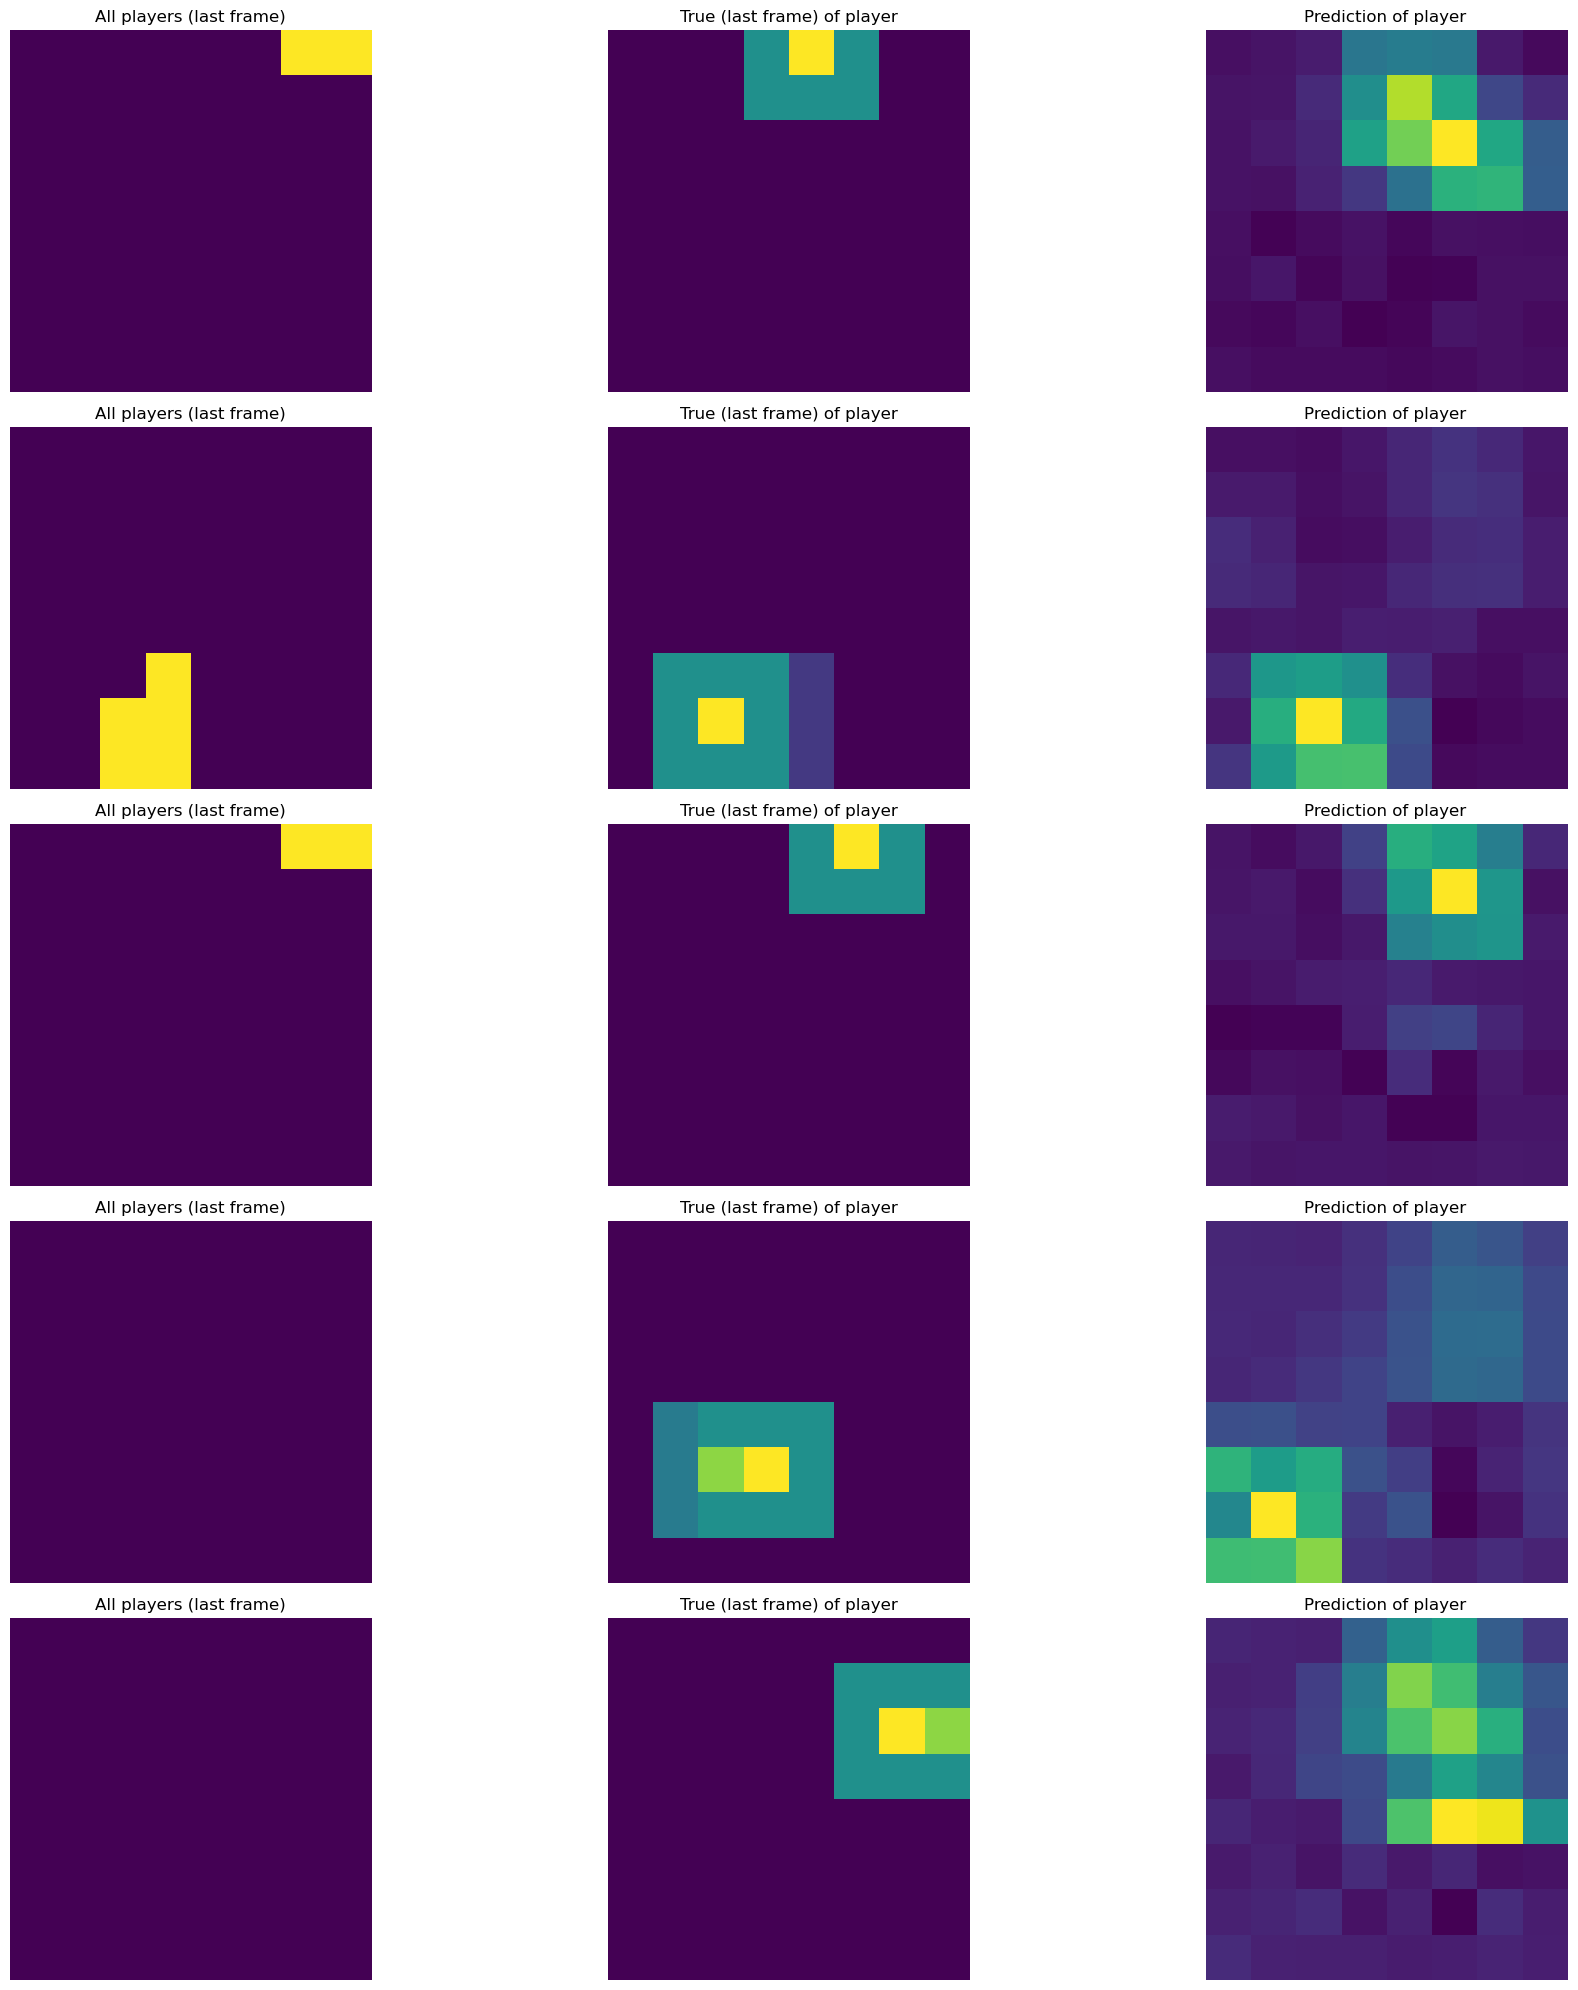

MODELO transf1 - ESCENA Scene5
Epoch 1/50
35/35 [==============================] - 64s 2s/step - loss: 0.0382 - mse: 0.0382 - mae: 0.1213 - val_loss: 0.0341 - val_mse: 0.0341 - val_mae: 0.1071
Epoch 2/50
35/35 [==============================] - 61s 2s/step - loss: 0.0292 - mse: 0.0292 - mae: 0.1030 - val_loss: 0.0295 - val_mse: 0.0295 - val_mae: 0.1006
Epoch 3/50
35/35 [==============================] - 64s 2s/step - loss: 0.0254 - mse: 0.0254 - mae: 0.0929 - val_loss: 0.0262 - val_mse: 0.0262 - val_mae: 0.0909
Epoch 4/50
35/35 [==============================] - 64s 2s/step - loss: 0.0236 - mse: 0.0236 - mae: 0.0882 - val_loss: 0.0271 - val_mse: 0.0271 - val_mae: 0.0836
Epoch 5/50
35/35 [==============================] - 64s 2s/step - loss: 0.0225 - mse: 0.0225 - mae: 0.0837 - val_loss: 0.0262 - val_mse: 0.0262 - val_mae: 0.0862
Epoch 6/50
35/35 [==============================] - 64s 2s/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0818 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.08

4/4 [==============================] - 5s 1s/step


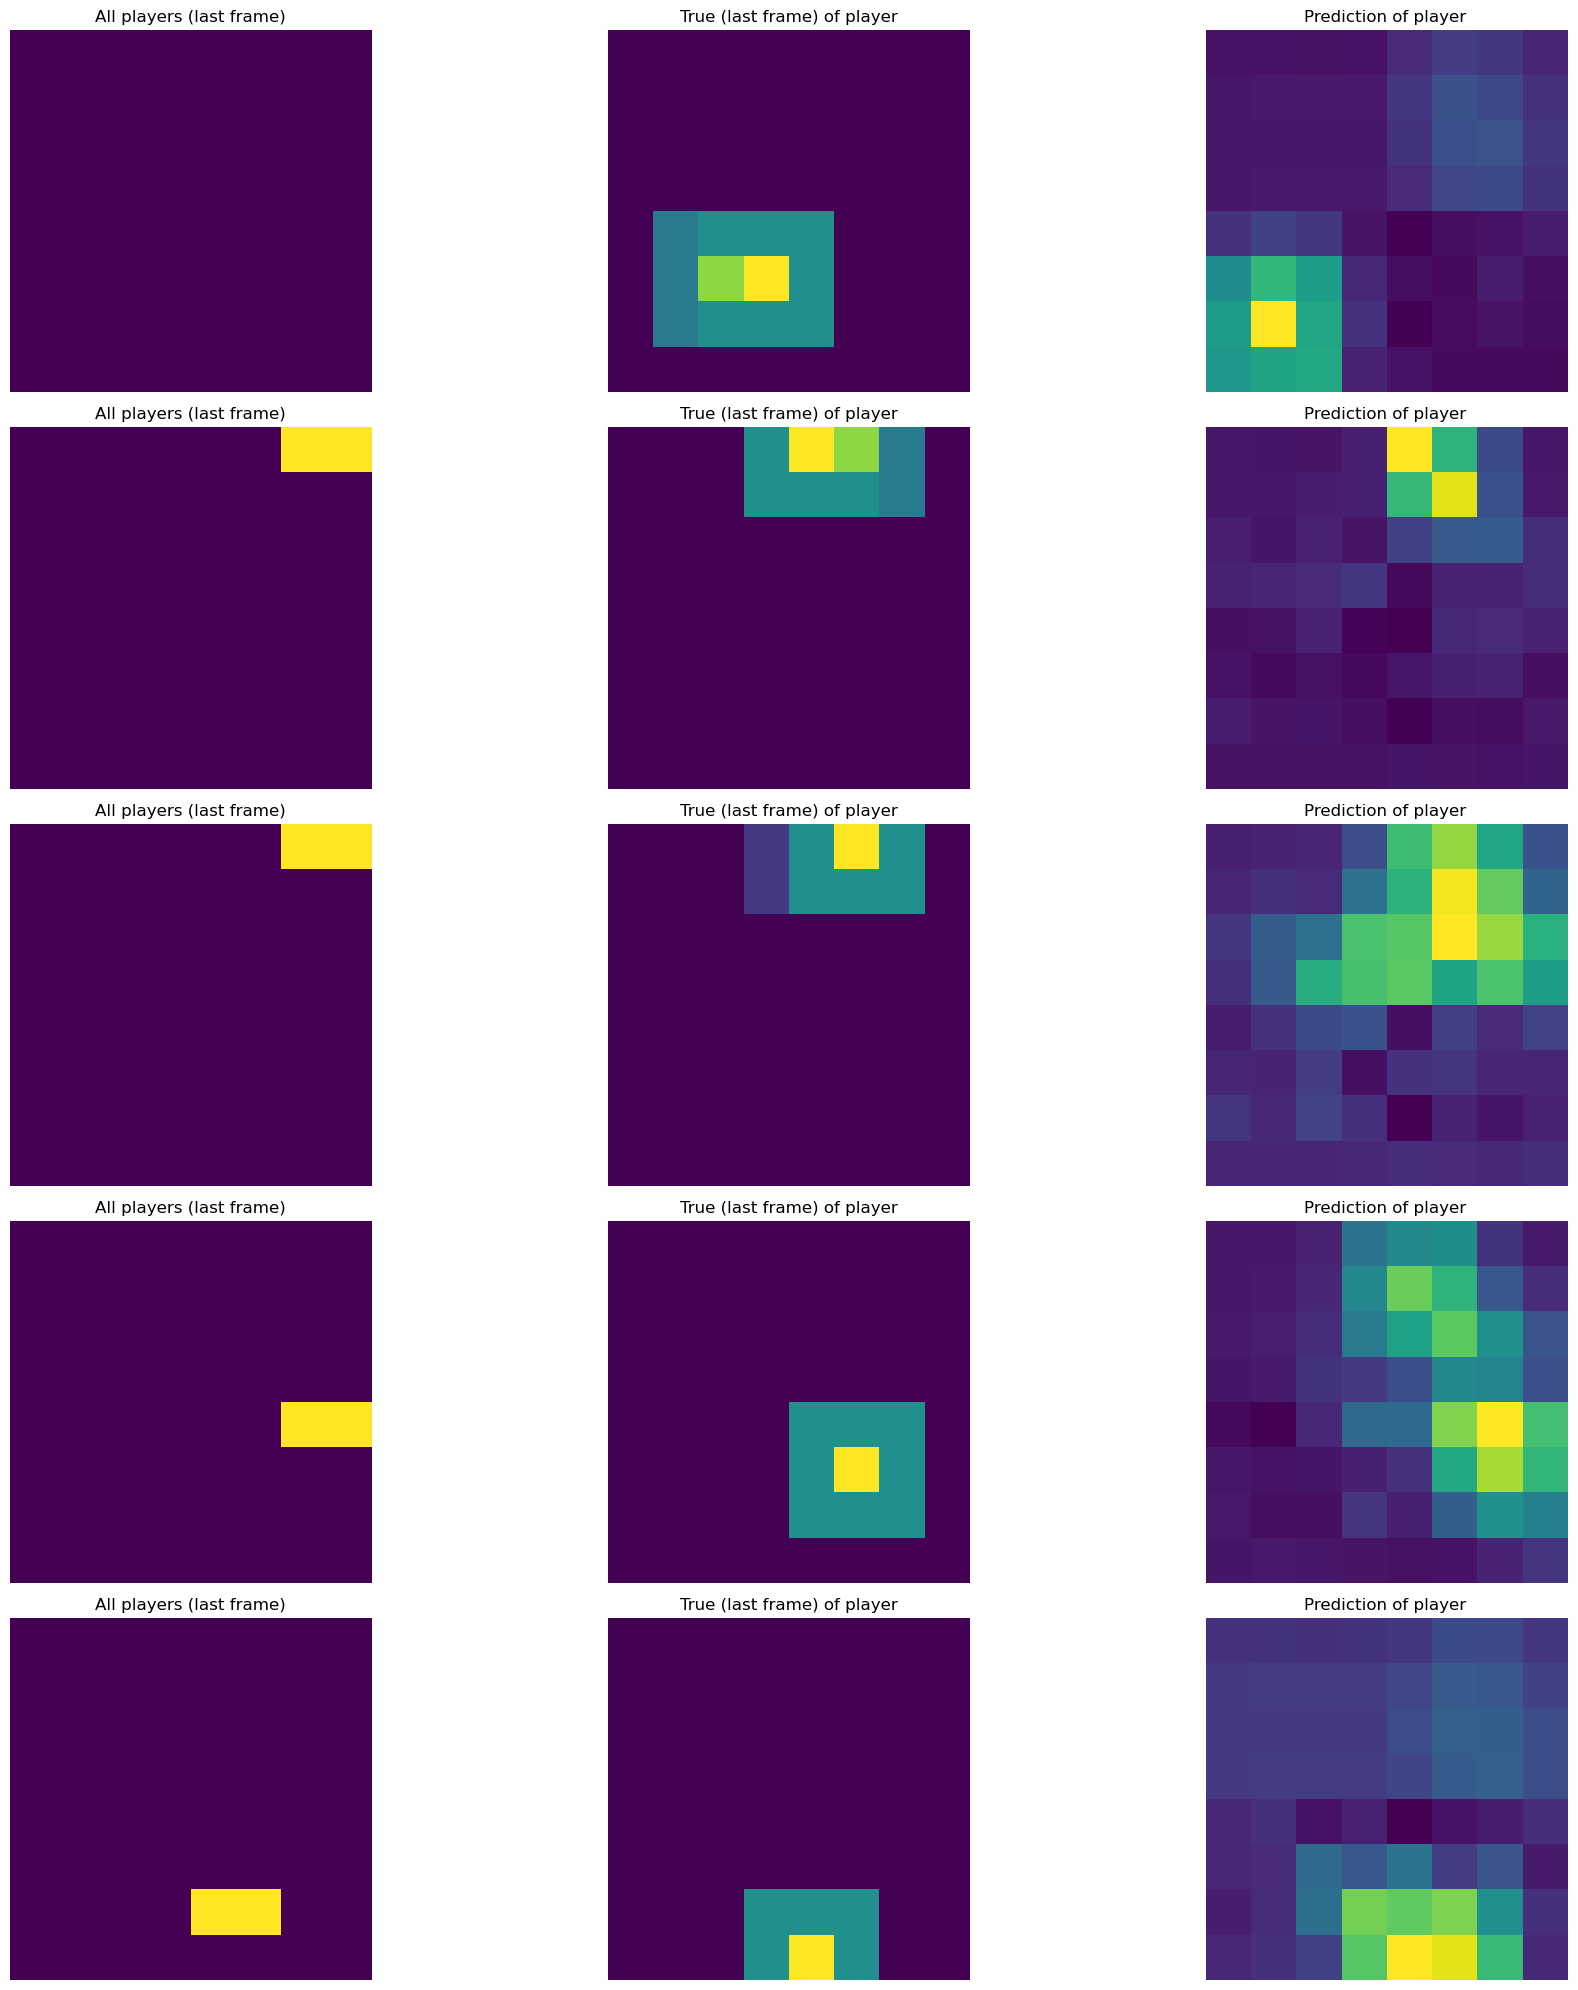

MODELO model0 - ESCENA Scene6
Epoch 1/50
35/35 [==============================] - 15s 257ms/step - loss: 0.0362 - mse: 0.0362 - mae: 0.1035 - val_loss: 0.0365 - val_mse: 0.0365 - val_mae: 0.1214
Epoch 2/50
35/35 [==============================] - 8s 229ms/step - loss: 0.0313 - mse: 0.0313 - mae: 0.1122 - val_loss: 0.0302 - val_mse: 0.0302 - val_mae: 0.1096
Epoch 3/50
35/35 [==============================] - 8s 232ms/step - loss: 0.0272 - mse: 0.0272 - mae: 0.0985 - val_loss: 0.0272 - val_mse: 0.0272 - val_mae: 0.0942
Epoch 4/50
35/35 [==============================] - 8s 231ms/step - loss: 0.0253 - mse: 0.0253 - mae: 0.0921 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.0913
Epoch 5/50
35/35 [==============================] - 8s 229ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.0889 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.0830
Epoch 6/50
35/35 [==============================] - 8s 232ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.0866 - val_loss: 0.0244 - val_mse: 0.0244 - v

4/4 [==============================] - 1s 94ms/step


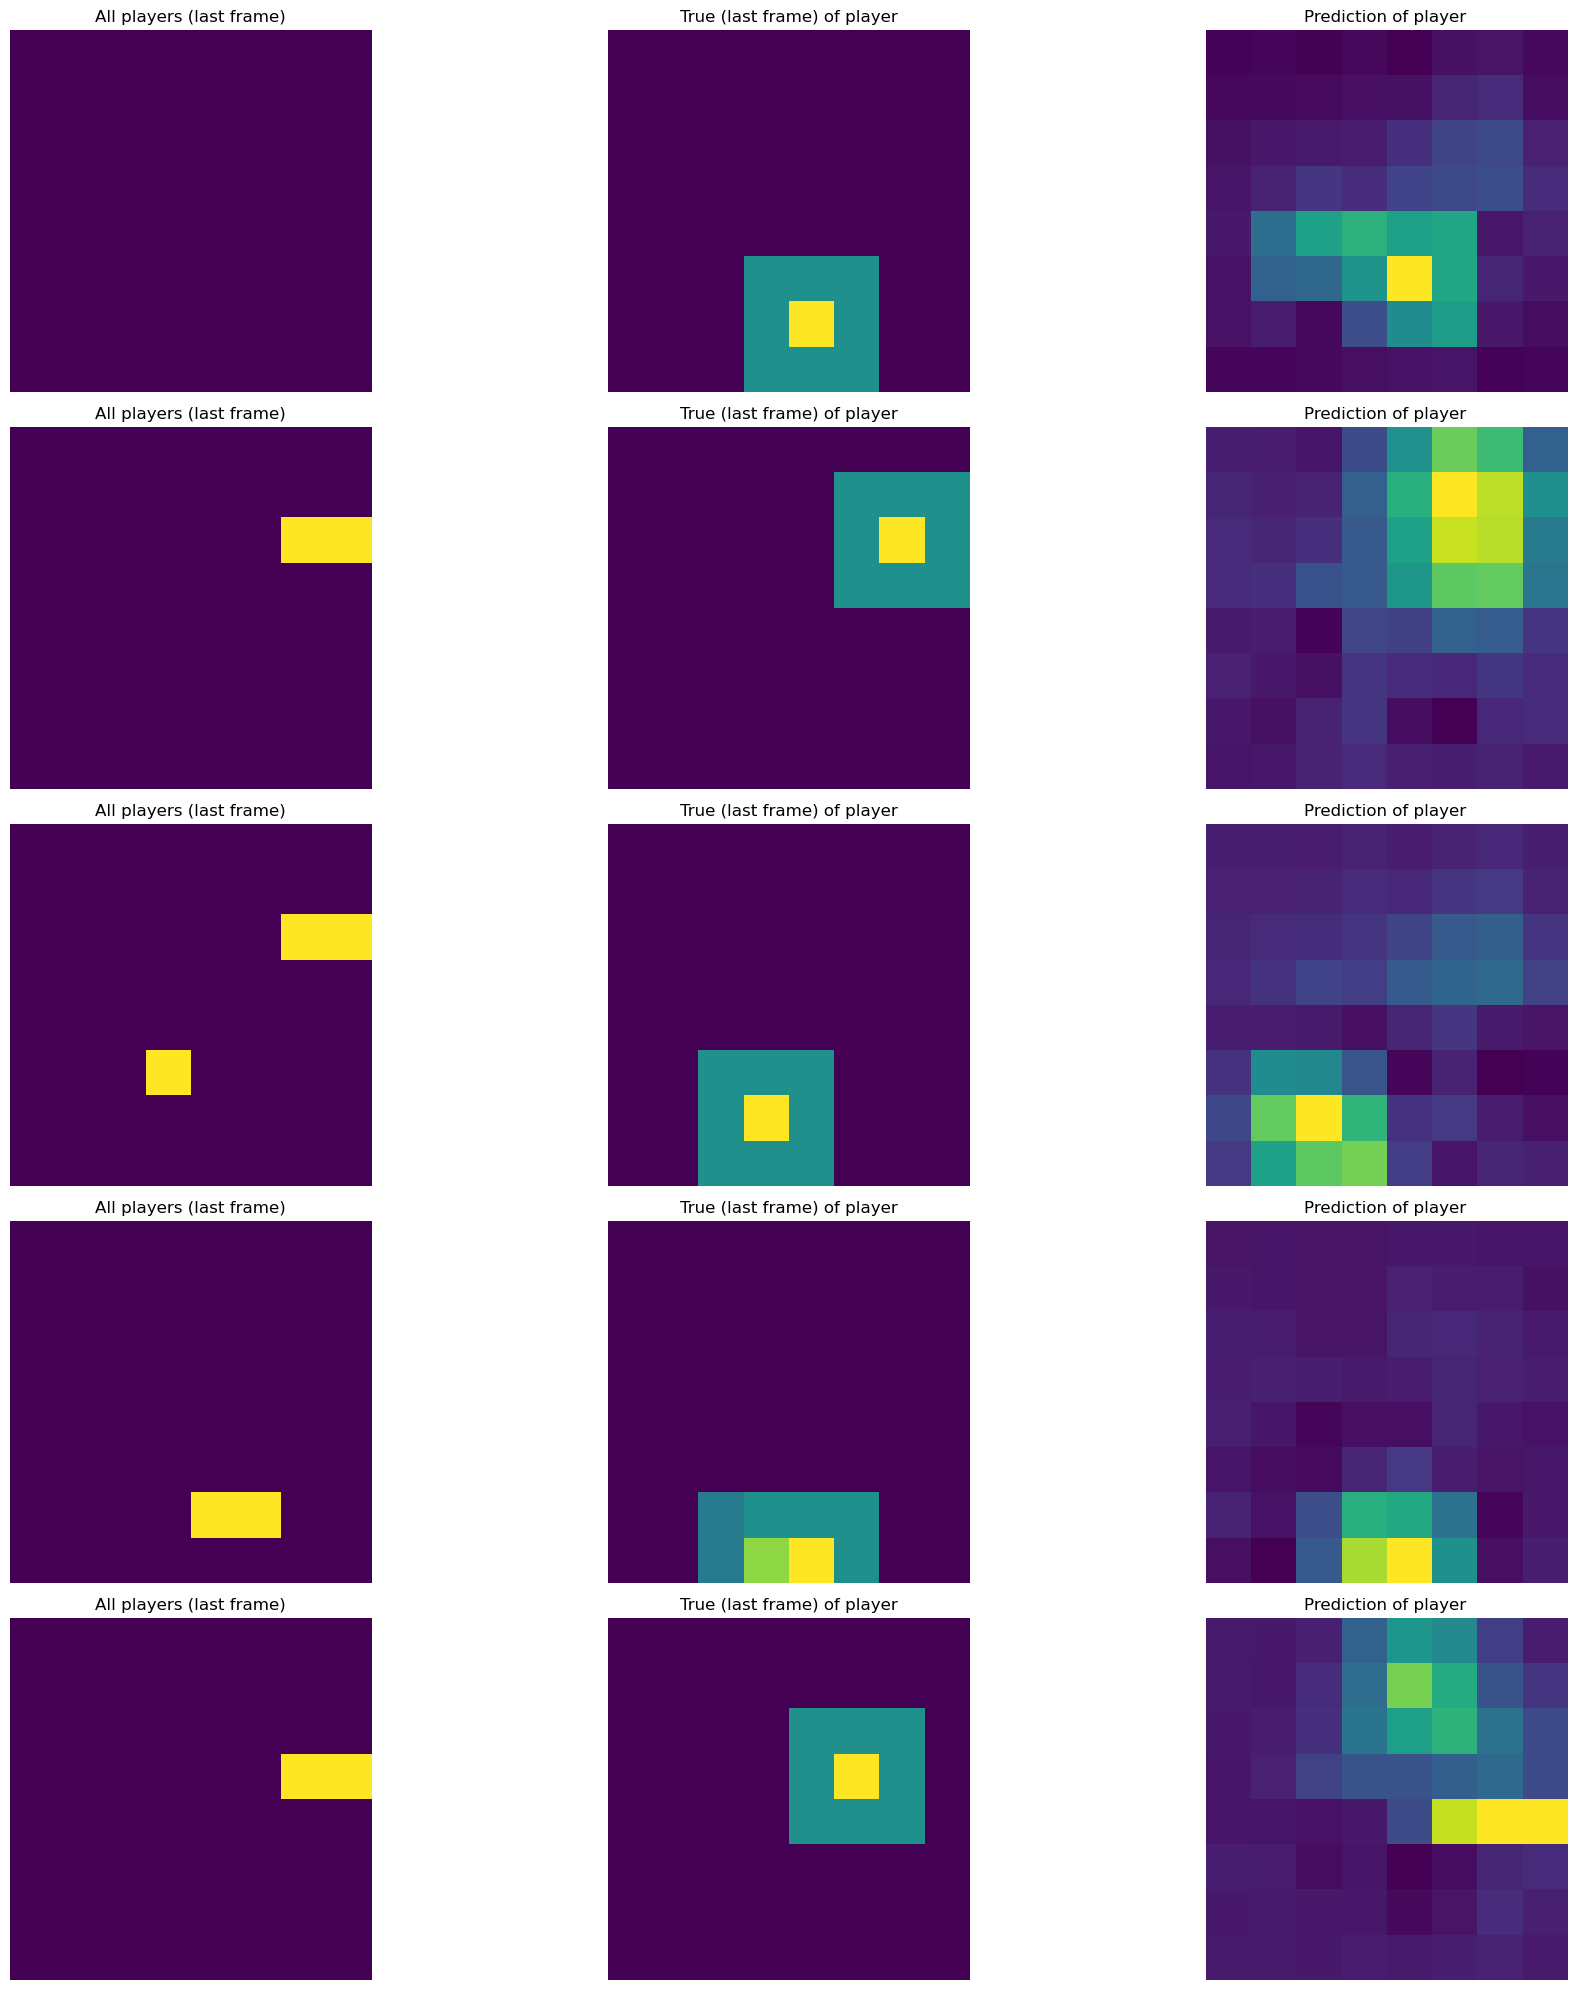

MODELO model1 - ESCENA Scene6
Epoch 1/50
35/35 [==============================] - 8s 169ms/step - loss: 0.0319 - mse: 0.0319 - mae: 0.0964 - val_loss: 0.0274 - val_mse: 0.0274 - val_mae: 0.0991
Epoch 2/50
35/35 [==============================] - 5s 150ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.0878 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.0877
Epoch 3/50
35/35 [==============================] - 5s 151ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.0836 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.0836
Epoch 4/50
35/35 [==============================] - 5s 150ms/step - loss: 0.0230 - mse: 0.0230 - mae: 0.0821 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.0837
Epoch 5/50
35/35 [==============================] - 5s 149ms/step - loss: 0.0226 - mse: 0.0226 - mae: 0.0812 - val_loss: 0.0247 - val_mse: 0.0247 - val_mae: 0.0836
Epoch 6/50
35/35 [==============================] - 5s 147ms/step - loss: 0.0223 - mse: 0.0223 - mae: 0.0806 - val_loss: 0.0247 - val_mse: 0.0247 - va

4/4 [==============================] - 1s 29ms/step


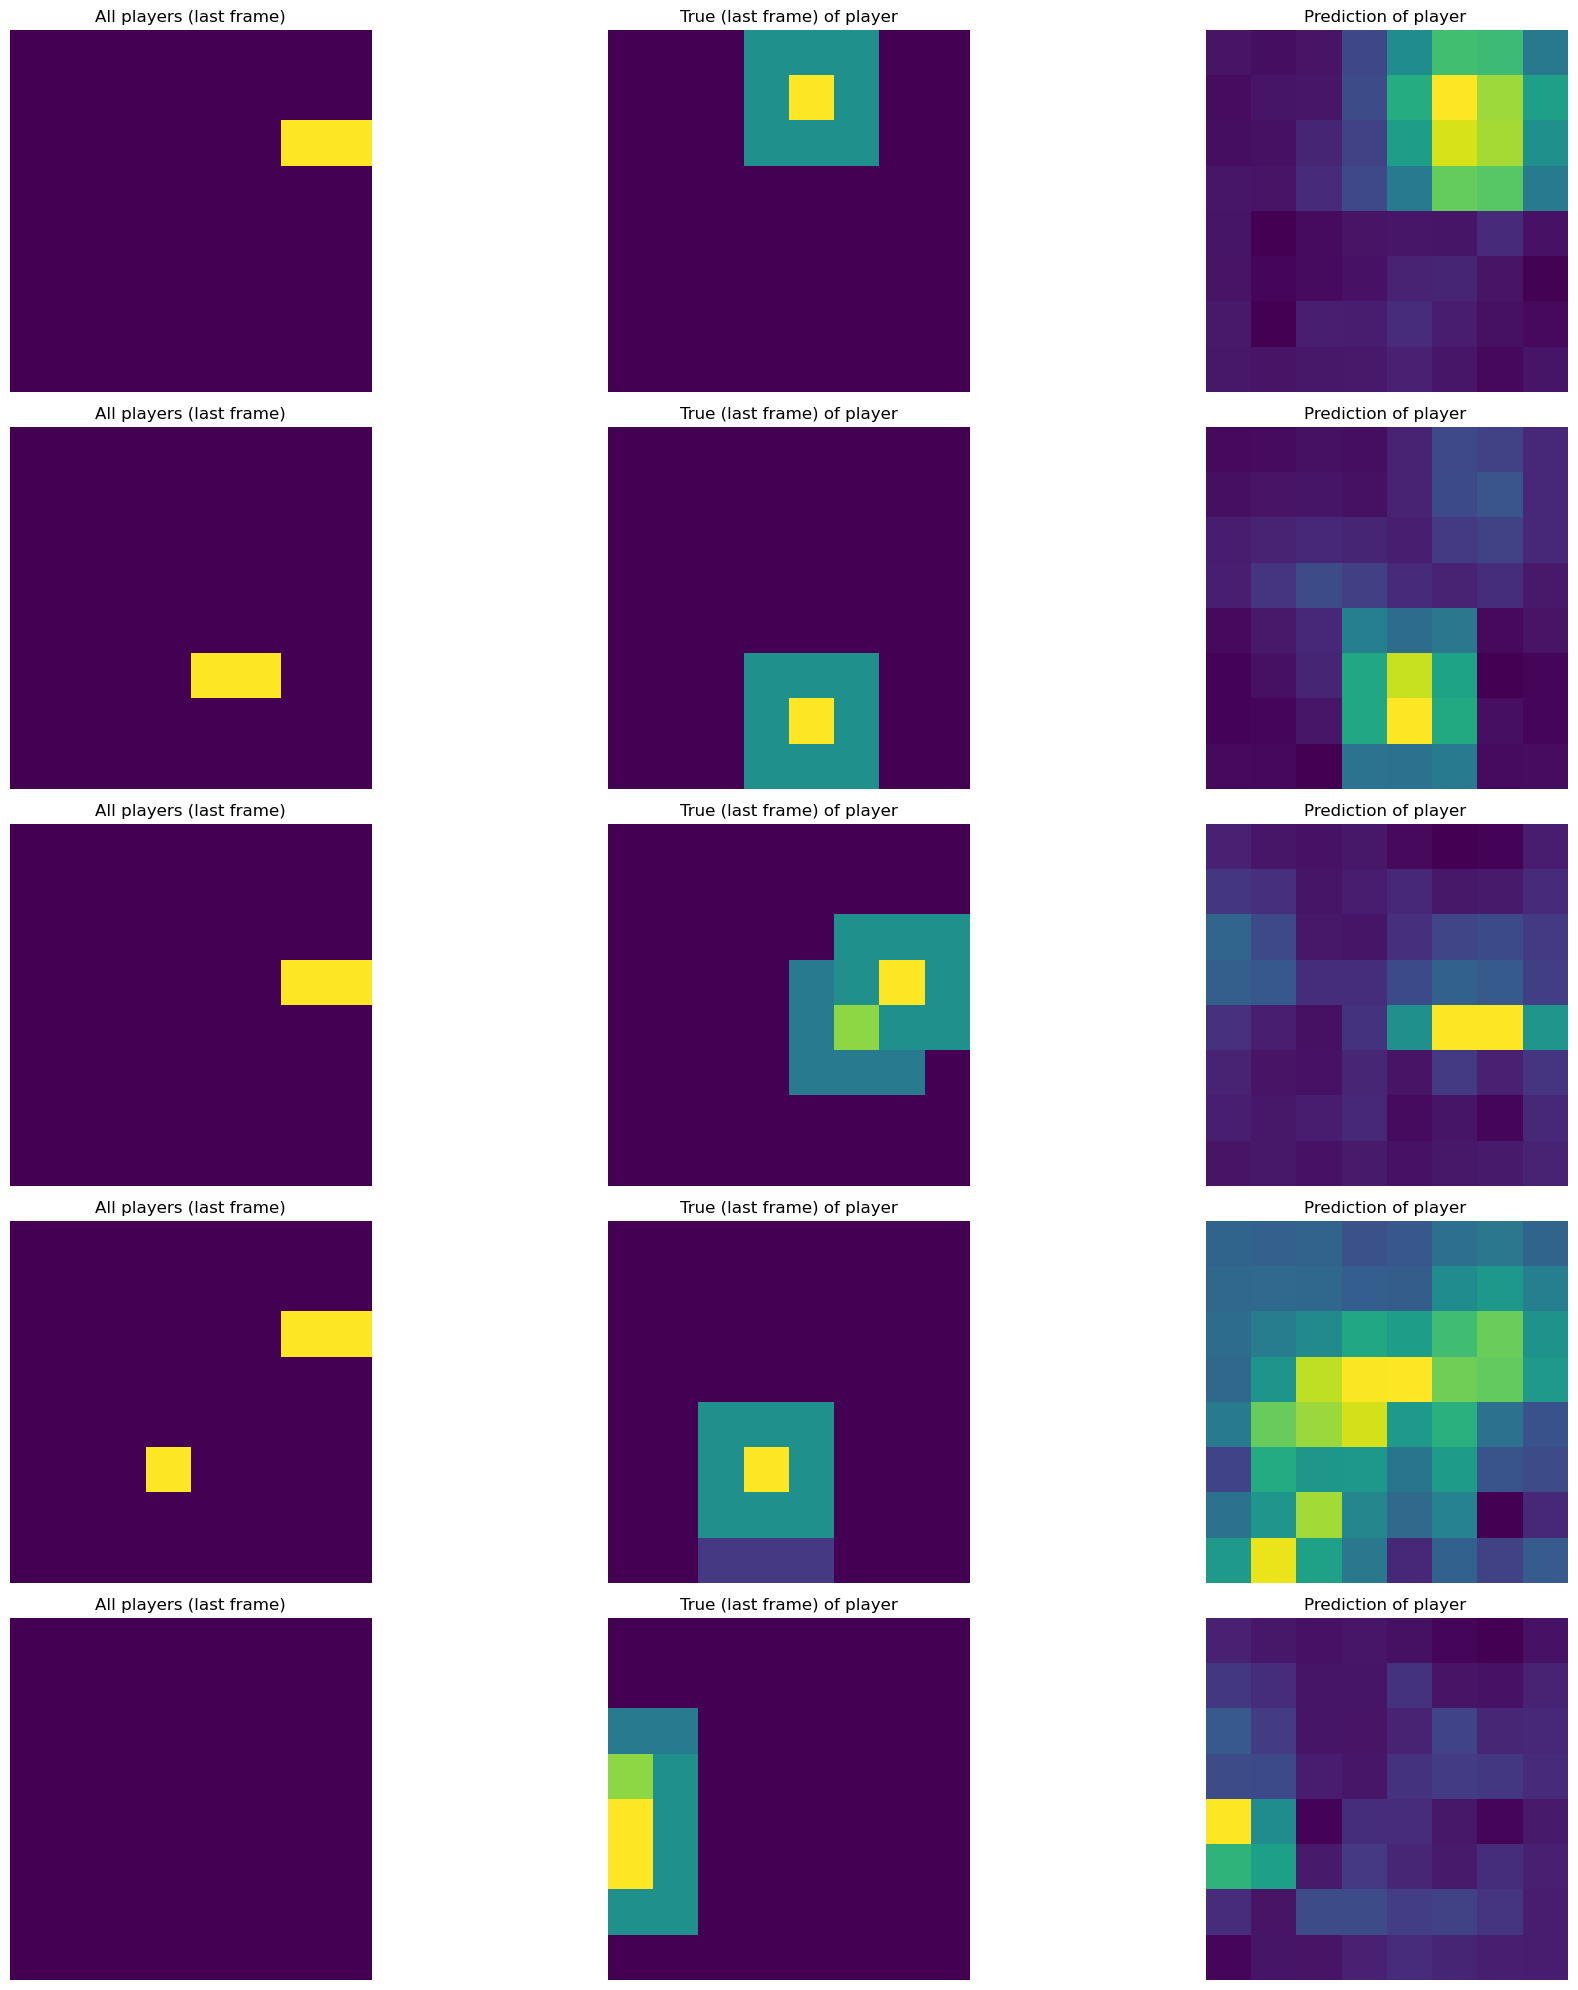

MODELO model2 - ESCENA Scene6
Epoch 1/50
35/35 [==============================] - 12s 292ms/step - loss: 0.0322 - mse: 0.0322 - mae: 0.0933 - val_loss: 0.0272 - val_mse: 0.0272 - val_mae: 0.0967
Epoch 2/50
35/35 [==============================] - 9s 268ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.0892 - val_loss: 0.0257 - val_mse: 0.0257 - val_mae: 0.0895
Epoch 3/50
35/35 [==============================] - 9s 269ms/step - loss: 0.0232 - mse: 0.0232 - mae: 0.0839 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.0842
Epoch 4/50
35/35 [==============================] - 9s 268ms/step - loss: 0.0226 - mse: 0.0226 - mae: 0.0814 - val_loss: 0.0234 - val_mse: 0.0234 - val_mae: 0.0842
Epoch 5/50
35/35 [==============================] - 9s 267ms/step - loss: 0.0225 - mse: 0.0225 - mae: 0.0814 - val_loss: 0.0235 - val_mse: 0.0235 - val_mae: 0.0823
Epoch 6/50
35/35 [==============================] - 9s 267ms/step - loss: 0.0219 - mse: 0.0219 - mae: 0.0792 - val_loss: 0.0255 - val_mse: 0.0255 - v

4/4 [==============================] - 1s 113ms/step


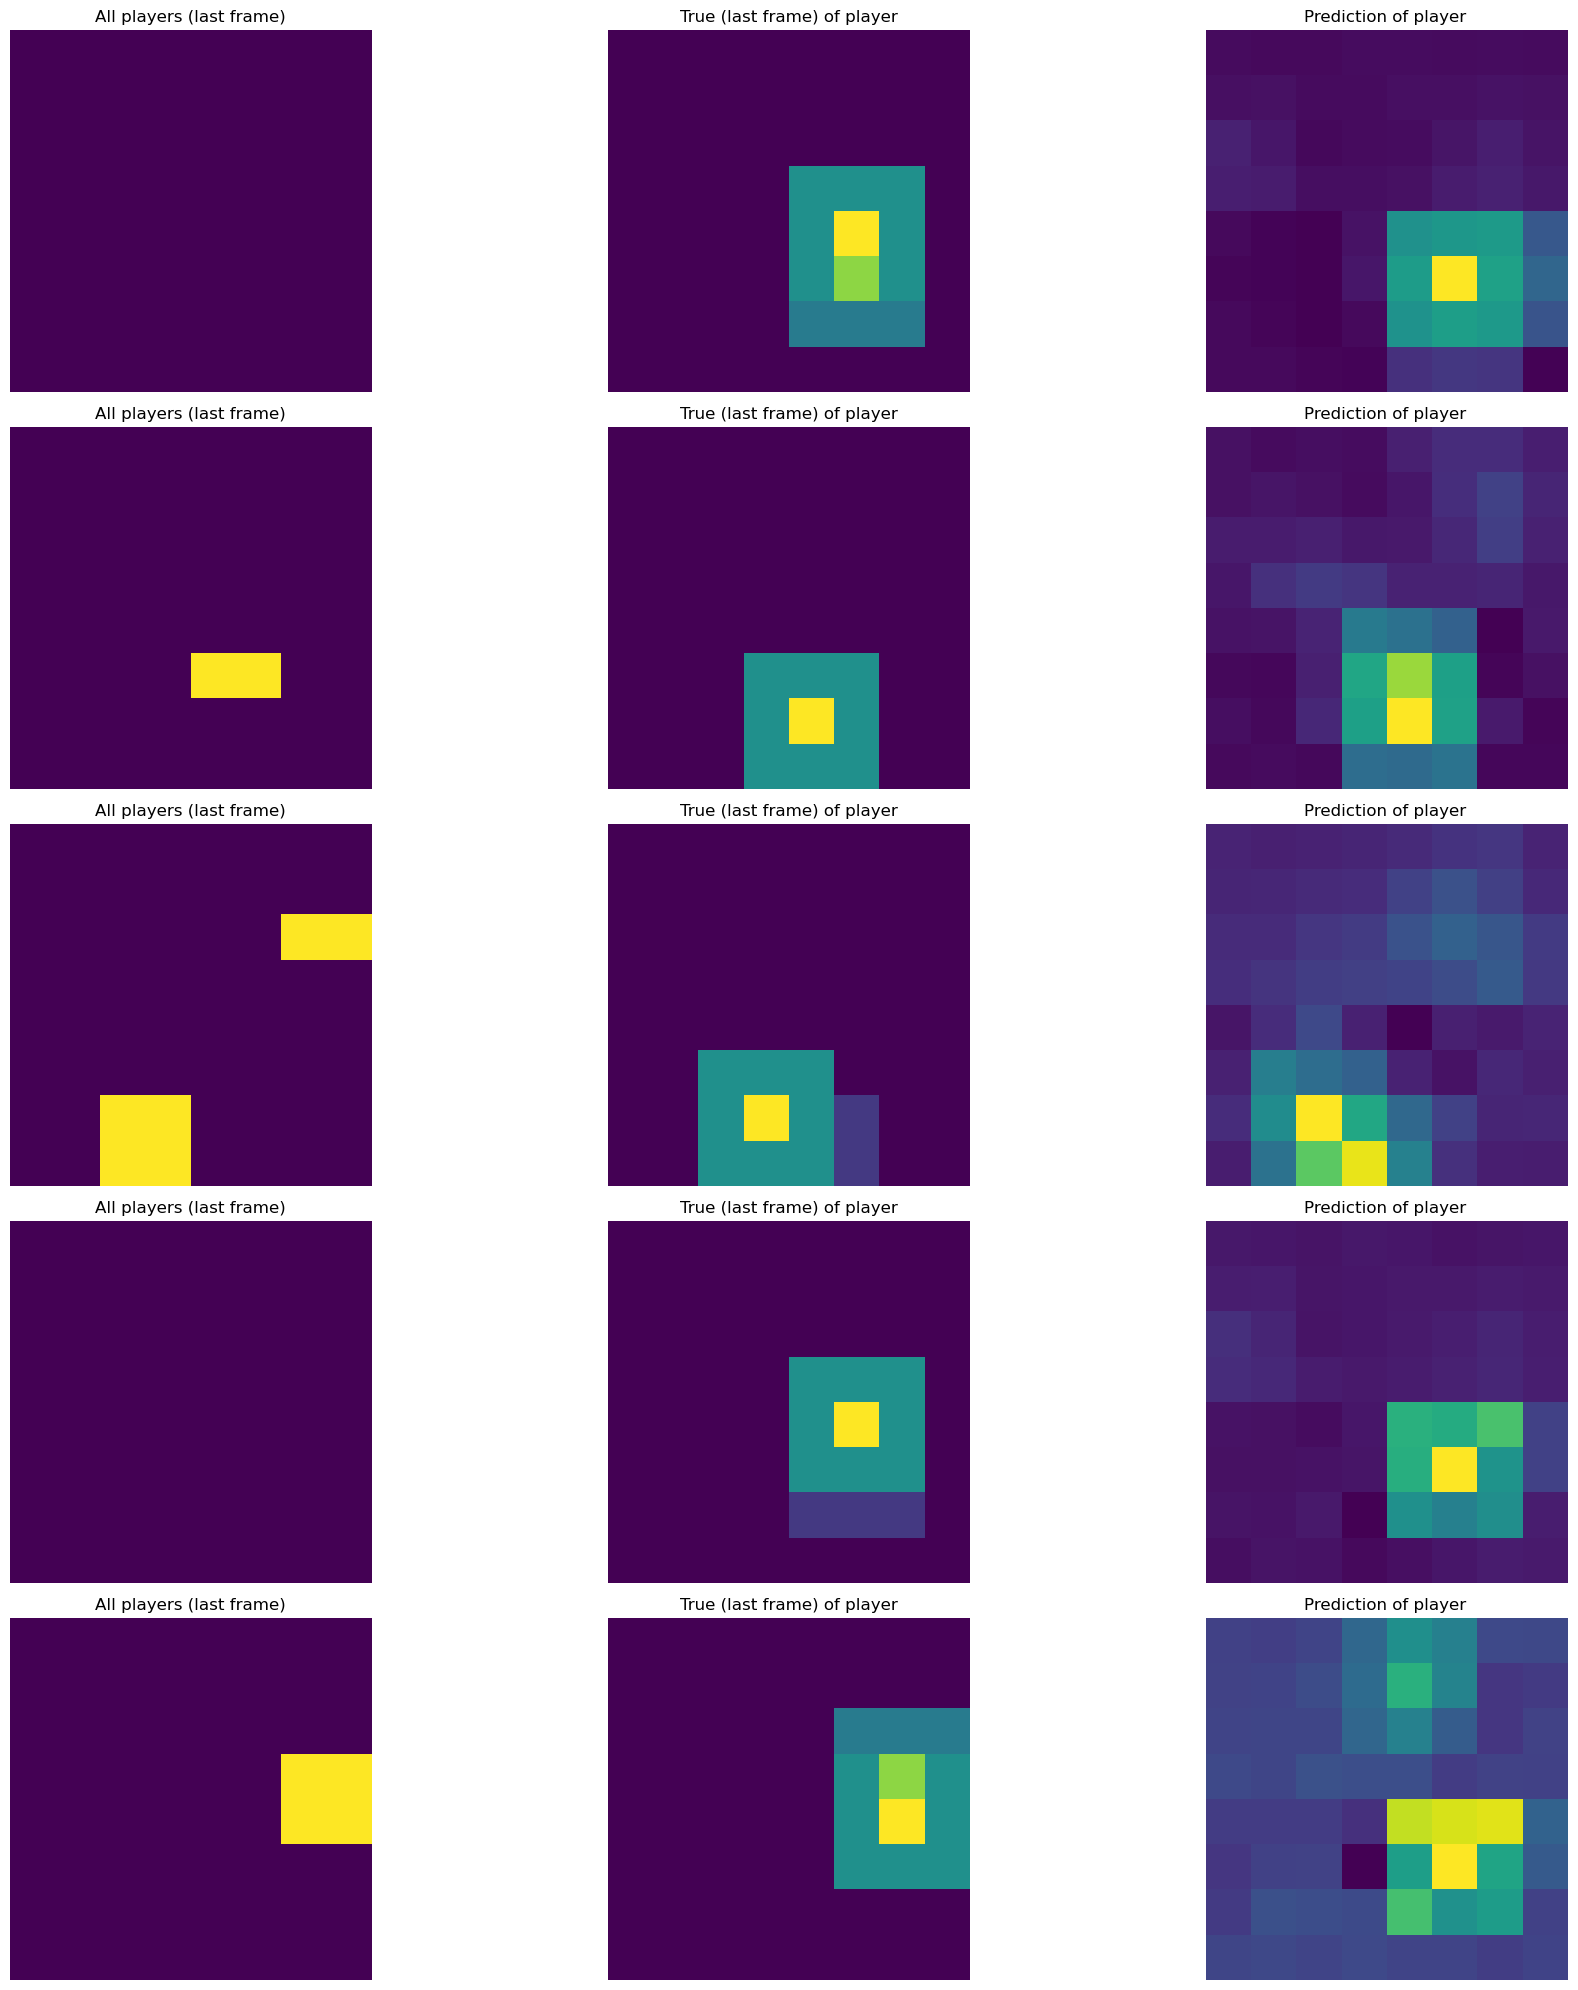

MODELO transf1 - ESCENA Scene6
Epoch 1/50
35/35 [==============================] - 90s 3s/step - loss: 0.0395 - mse: 0.0395 - mae: 0.1226 - val_loss: 0.0356 - val_mse: 0.0356 - val_mae: 0.1050
Epoch 2/50
35/35 [==============================] - 87s 2s/step - loss: 0.0302 - mse: 0.0302 - mae: 0.1049 - val_loss: 0.0295 - val_mse: 0.0295 - val_mae: 0.1033
Epoch 3/50
35/35 [==============================] - 87s 3s/step - loss: 0.0260 - mse: 0.0260 - mae: 0.0943 - val_loss: 0.0267 - val_mse: 0.0267 - val_mae: 0.0959
Epoch 4/50
35/35 [==============================] - 87s 2s/step - loss: 0.0241 - mse: 0.0241 - mae: 0.0887 - val_loss: 0.0259 - val_mse: 0.0259 - val_mae: 0.0908
Epoch 5/50
35/35 [==============================] - 87s 2s/step - loss: 0.0232 - mse: 0.0232 - mae: 0.0854 - val_loss: 0.0266 - val_mse: 0.0266 - val_mae: 0.0897
Epoch 6/50
35/35 [==============================] - 87s 2s/step - loss: 0.0224 - mse: 0.0224 - mae: 0.0832 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.08

4/4 [==============================] - 6s 1s/step


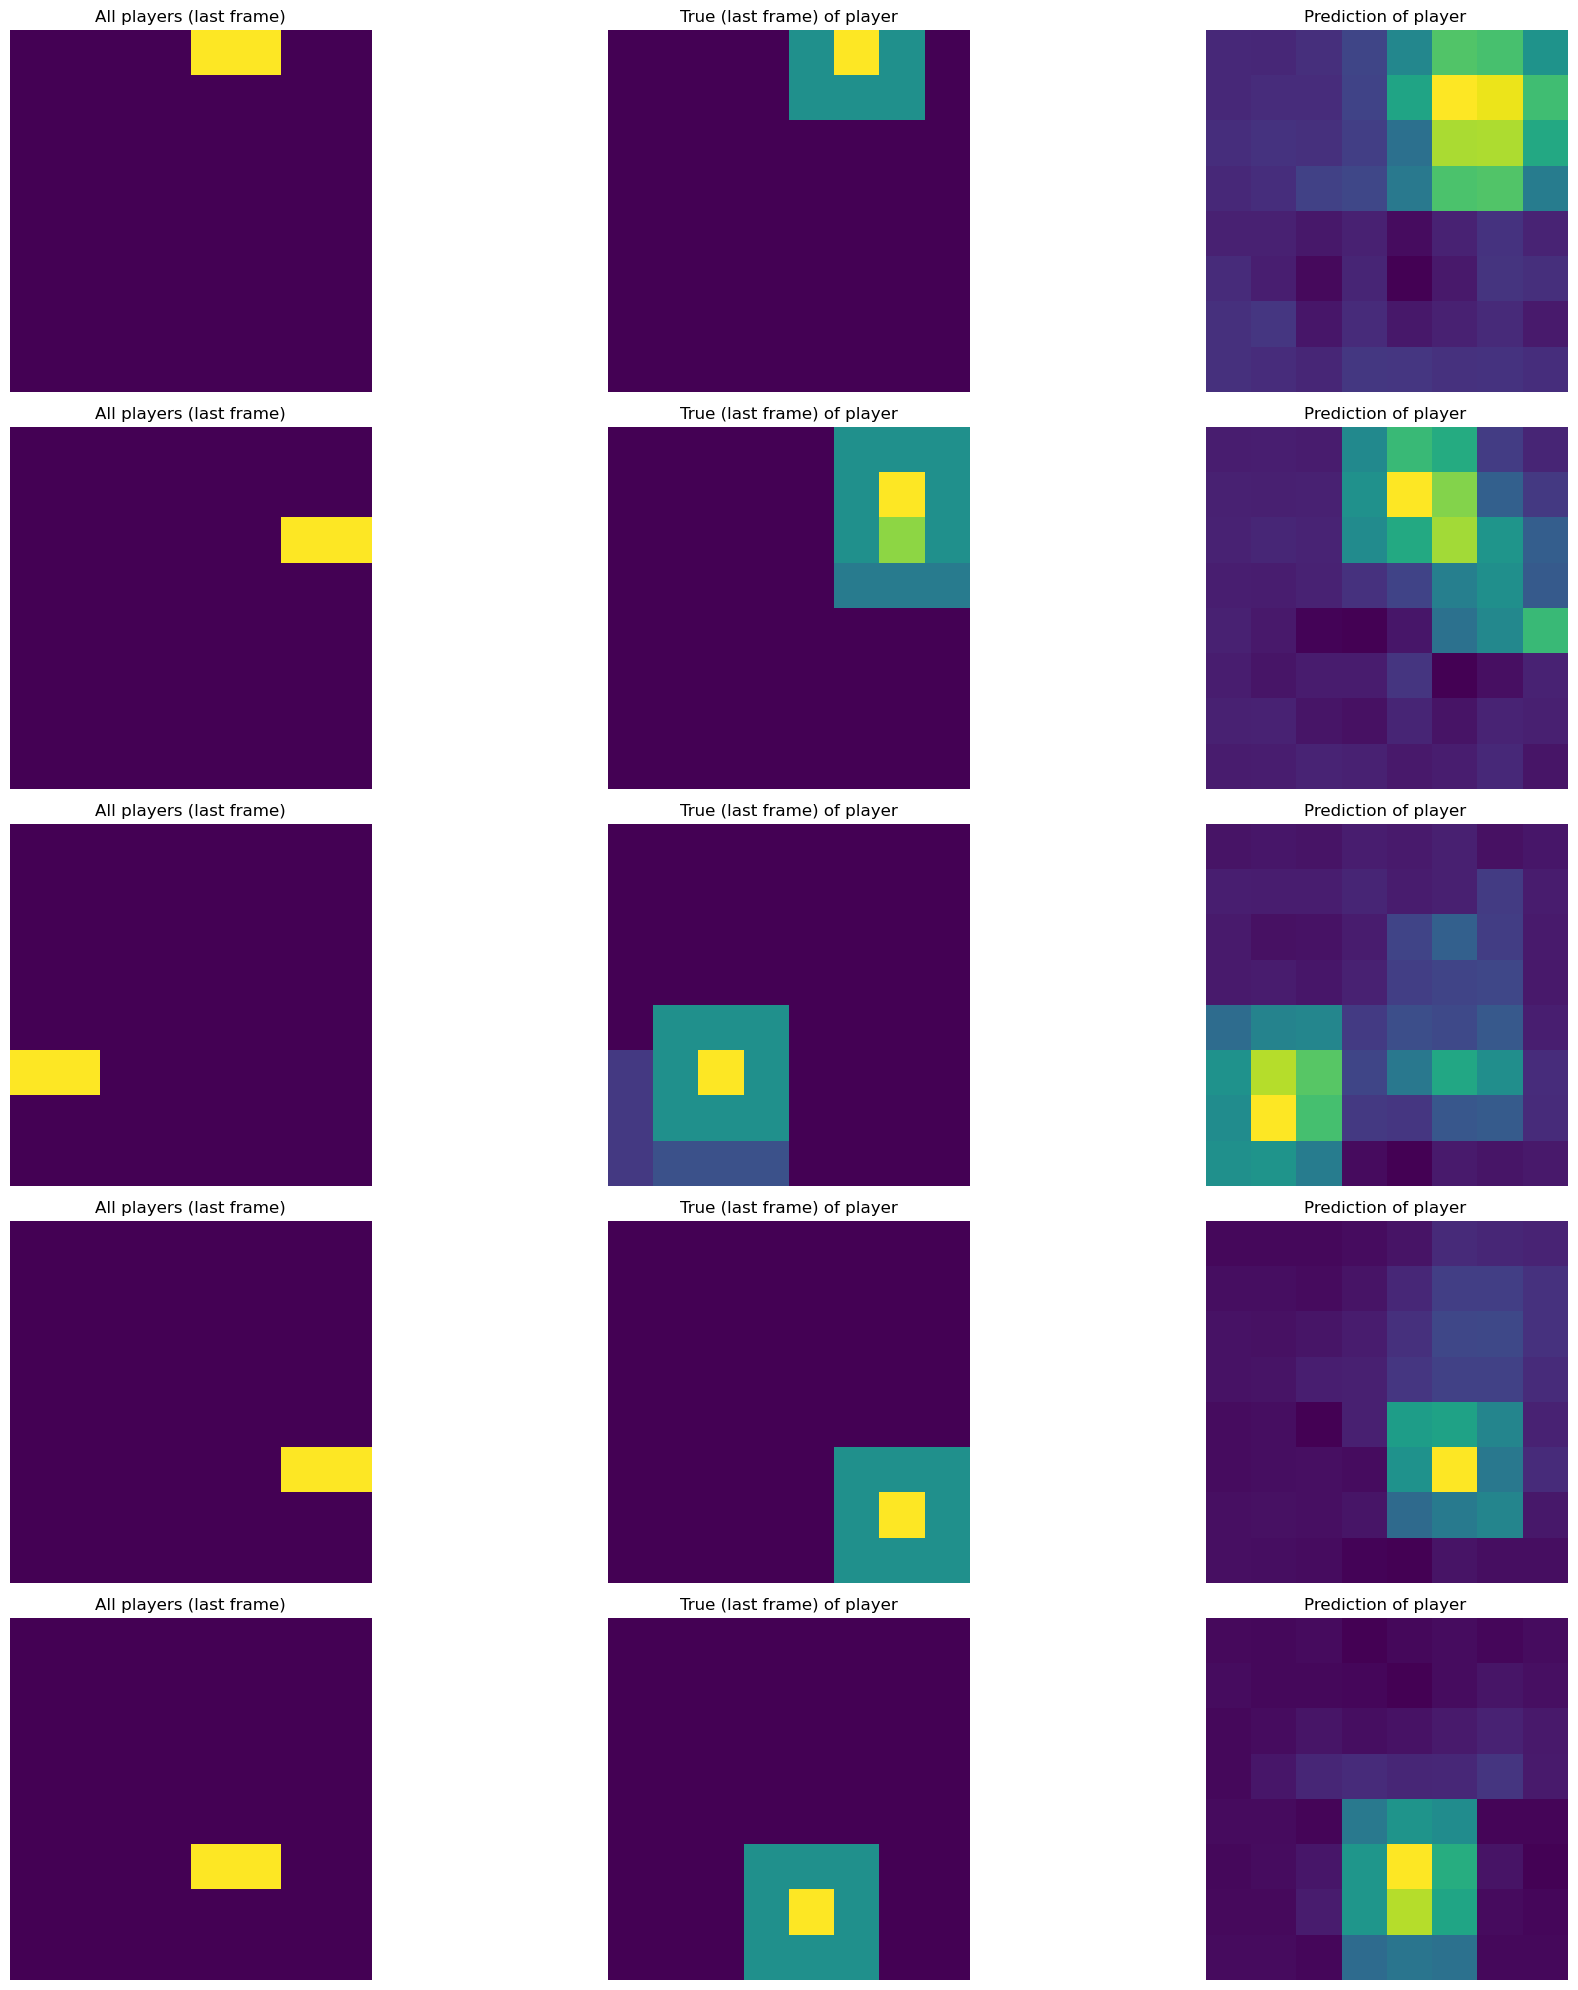

Resultados por escena:
Escena Scene1:
Modelo model0 - MSE: 0.0217, MAE: 0.0795, Tiempo: 53.96s
Modelo model1 - MSE: 0.0226, MAE: 0.0808, Tiempo: 29.26s
Modelo model2 - MSE: 0.0232, MAE: 0.0819, Tiempo: 69.79s
Modelo transf1 - MSE: 0.0236, MAE: 0.0816, Tiempo: 598.64s

Escena Scene2:
Modelo model0 - MSE: 0.0228, MAE: 0.0778, Tiempo: 244.85s
Modelo model1 - MSE: 0.0242, MAE: 0.0835, Tiempo: 132.82s
Modelo model2 - MSE: 0.0235, MAE: 0.0800, Tiempo: 225.98s
Modelo transf1 - MSE: 0.0250, MAE: 0.0865, Tiempo: 2783.49s

Escena Scene3:
Modelo model0 - MSE: 0.0284, MAE: 0.0886, Tiempo: 286.15s
Modelo model1 - MSE: 0.0298, MAE: 0.0902, Tiempo: 188.46s
Modelo model2 - MSE: 0.0291, MAE: 0.0872, Tiempo: 296.95s
Modelo transf1 - MSE: 0.0302, MAE: 0.0891, Tiempo: 2475.43s

Escena Scene4:
Modelo model0 - MSE: 0.0230, MAE: 0.0802, Tiempo: 354.32s
Modelo model1 - MSE: 0.0236, MAE: 0.0778, Tiempo: 212.58s
Modelo model2 - MSE: 0.0235, MAE: 0.0773, Tiempo: 326.85s
Modelo transf1 - MSE: 0.0241, MAE: 0.0789,

In [17]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss

# Assuming you have a function to calculate binary cross-entropy (log loss)
def binary_cross_entropy(y_true, y_pred):
    """
    Calcula la Binary Cross-Entropy (BCE) asegurando que y_true y y_pred sean válidos.
    Soporta etiquetas no binarias (soft labels).
    """
    # Asegurar que los valores de y_pred estén entre 0 y 1
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # Asegurar que los valores de y_true estén en el rango [0,1]
    y_true = np.clip(y_true, 0, 1)

    # Fórmula BCE: -(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))
    bce = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    return np.mean(bce)

np.random.seed(42)

# Lista de identificadores de modelo
model_ids = ["model0","model1","model2","transf1"] 


# Estructuras para almacenar resultados y tiempos de ejecución
mse_results = {model_id: [] for model_id in model_ids}
bce_results = {model_id: [] for model_id in model_ids} #binary cross entropy
mae_results = {model_id: [] for model_id in model_ids}
training_times = {model_id: [] for model_id in model_ids}
total_execution_time = {model_id: 0 for model_id in model_ids}

print(np.unique(S))

escenas_seleccionadas=np.unique(S)
#escenas_seleccionadas=escenas_seleccionadas[3:]
print("Para esta ejecución se han seleccionada las escenas: ")
print(escenas_seleccionadas)

for ixs, sc in enumerate(escenas_seleccionadas):
    # Índices para entrenamiento y prueba
    train_indices = np.where(S != sc)[0]
    test_indices = np.where(S == sc)[0]
    np.random.shuffle(train_indices)

    XYT_train = XYT[train_indices]
    rssiT_train = rssiT[train_indices]
    YT_train = YT[train_indices]

    XYT_test = XYT[test_indices]
    rssiT_test = rssiT[test_indices]
    YT_test = YT[test_indices]
    
    for model_id in model_ids:
        print(f"MODELO {model_id} - ESCENA {sc}")
        
        model = load_model(f"{model_id}.h5")

        start_time = time.time()

        history = model.fit([XYT_train, rssiT_train], YT_train,
                                  batch_size=16,
                                  validation_data=([XYT_test, rssiT_test], YT_test),
                                  epochs=50)
        end_time = time.time()
        training_time = end_time - start_time
        
        YT_prediction = model.predict([XYT_test, rssiT_test])

        plottingRandom(XYT_test, YT_test, YT_prediction)

        mse = mean_squared_error(YT_test.flatten(), YT_prediction.flatten())
        mae = mean_absolute_error(YT_test.flatten(), YT_prediction.flatten())
        bce = binary_cross_entropy(YT_test.flatten(), YT_prediction.flatten())

        mse_results[model_id].append(mse)
        mae_results[model_id].append(mae)
        bce_results[model_id].append(bce)
        
       
        training_times[model_id].append(training_time)
        total_execution_time[model_id] += training_time

# Calculando promedios y mostrando resultados

print("Resultados por escena:")
for i, sc in enumerate(escenas_seleccionadas):
    print(f"Escena {sc}:")
    for model_id in model_ids:
        print(f"Modelo {model_id} - MSE: {mse_results[model_id][i]:.4f}, MAE: {mae_results[model_id][i]:.4f}, Tiempo: {training_times[model_id][i]:.2f}s")
    print("")
    
print("RESUMEN RESULTADOS:")
for model_id in model_ids:
    average_mse = np.mean(mse_results[model_id])
    average_mae = np.mean(mae_results[model_id])
    average_bce = np.mean(bce_results[model_id])
    print(f"Modelo {model_id}:")
    print(f"Tiempo de ejecución total: {total_execution_time[model_id]:.2f} segundos")
    print(f"MSE promedio: {average_mse:.4f}")
    print(f"MAE promedio: {average_mae:.4f}\n")
    print(f"BCE promedio: {average_bce:.4f}\n")


In [18]:
ts.sort()
print(ts)

[1710593157, 1710593158, 1710593159, 1710593160, 1710593161, 1710593162, 1710593163, 1710593164, 1710593165, 1710593166, 1710593167, 1710593168, 1710593169, 1710593170, 1710593171, 1710593172, 1710593173, 1710593174, 1710593175, 1710593176, 1710593177, 1710593178, 1710593179, 1710593180, 1710593181, 1710593182, 1710593183, 1710593184, 1710593185, 1710593186, 1710593187, 1710593188, 1710593189, 1710593190, 1710593191, 1710593192, 1710593193, 1710593194, 1710593195, 1710593196, 1710593197, 1710593198, 1710593199, 1710593200, 1710593201, 1710593202, 1710593203, 1710593204, 1710593205, 1710593206, 1710593207, 1710593208, 1710593209, 1710593210, 1710593211, 1710593212, 1710593213, 1710593214, 1710593215, 1710593216, 1710593217, 1710593218, 1710593219, 1710593220, 1710593221, 1710593222, 1710593223, 1710593224, 1710593225, 1710593226, 1710593227, 1710593228, 1710593229, 1710593230, 1710593231, 1710593232, 1710593233, 1710593234, 1710593235, 1710593236, 1710593237, 1710593238, 1710593239, 171